<a href="https://colab.research.google.com/github/Praveen76/Loan_Approval_Classifier_Advanced_Techniques/blob/main/End_to_end_Loan_Approval_Classifier_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# !git clone https://github.com/Praveen76/Loan_Approval_Classifier_Advanced_Techniques.git


In [230]:
# %cd Loan_Approval_Classifier_Advanced_Techniques

In [13]:
# %pip install shap xgboost plotly scikit-plot seaborn statsmodels tabulate matplotlib imblearn nbformat>=4.2.0


# Step 0: Import libraries and data

In [14]:
import sys

# Print Python version
print("Python version")
print(sys.version)
print("")

# Print installed package versions
print("Installed package versions")
for module in sys.modules:
    try:
        version = sys.modules[module].__version__
        print(f"{module}: {version}")
    except AttributeError:
        pass


Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

Installed package versions
re: 2.2.1
ipykernel._version: 5.5.6
json: 2.0.9
IPython.core.release: 7.34.0
logging: 0.5.1.2
zlib: 1.0
traitlets._version: 5.7.1
traitlets: 5.7.1
socketserver: 0.4
argparse: 1.1
platform: 1.0.8
pygments: 2.16.1
ptyprocess: 0.7.0
pexpect: 4.9.0
decorator: 4.4.2
pickleshare: 0.7.5
backcall: 0.2.0
wcwidth: 0.2.13
prompt_toolkit: 3.0.43
parso: 0.8.3
jedi: 0.19.1
urllib.request: 3.10
IPython: 7.34.0
ipython_genutils._version: 0.2.0
ipython_genutils: 0.2.0
jupyter_client._version: 6.1.12
_ctypes: 1.1.0
ctypes: 1.1.0
zmq.sugar.version: 23.2.1
zmq.sugar: 23.2.1
zmq: 23.2.1
jupyter_core.version: 5.7.1
jupyter_core: 5.7.1
platformdirs.version: 4.2.0
platformdirs: 4.2.0
jupyter_client: 6.1.12
ipykernel: 5.5.6
_curses: b'2.2'
dateutil: 2.8.2
six: 1.16.0
_decimal: 1.70
decimal: 1.70
setuptools._distutils: 3.10.12
_csv: 1.0
csv: 1.0
setuptools.version: 67.7.2
setuptools._vendor.packaging: 23.0
setuptools.e

In [15]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate

import warnings

warnings.filterwarnings("ignore")

In [16]:
!git clone https://github.com/Praveen76/Loan_Approval_Classifier_Advanced_Techniques.git
%cd Loan_Approval_Classifier_Advanced_Techniques

Cloning into 'Loan_Approval_Classifier_Advanced_Techniques'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 11.44 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/Loan_Approval_Classifier_Advanced_Techniques


In [17]:
%cd Loan_Approval_Classifier_Advanced_Techniques
%pwd

[Errno 2] No such file or directory: 'Loan_Approval_Classifier_Advanced_Techniques'
/content/Loan_Approval_Classifier_Advanced_Techniques


'/content/Loan_Approval_Classifier_Advanced_Techniques'

In [18]:
loan_original=pd.read_csv('./data.csv',parse_dates=['DateAdded','ApprovalDate'])
loan_original=loan_original.infer_objects()

loan_original.head()

LeadID           DateAdded LeadSourceGroup        LoanOfficer  \
0   13067 2013-05-01 18:54:00             NaN   Narmour, Derrick   
1   14396 2013-05-07 16:53:00              TV  Johnson, Adrienne   
2   14855 2013-05-09 12:53:00             NaN     Frank, Michael   
3   26269 2013-07-01 17:25:00              TV     Benitez, Bryan   
4   37010 2013-08-30 09:58:00              TV         Nguyen, Tu   

                   Group  ZipCode   LoanNumber ApprovalDate  BranchCode  \
0  Refinance Team - 4103  75078.0  41032026021          NaT      4103.0   
1  Refinance Team - 4103  76064.0   4103198104   2019-07-21      4103.0   
2  Refinance Team - 4103  76017.0   4102192789   2019-03-26      4102.0   
3  Refinance Team - 4102  75238.0   4102193097   2019-04-05      4102.0   
4  Refinance Team - 4102  77450.0   4102190764   2019-02-01      4102.0   

                                         LoanPurpose  ... BorrowerAge  \
0  Refinance                                     ...  ...          36   
1  Refinance Cash-out                            ...  ...          52   
2  Refinance Cash-out                            ...  ...          60   
3  Refinance Cash-out                            ...  ...          54   
4  Refinance Cash-out                            ...  ...          49   

   BorrowerYearsInSchool  BorrowerTotalMonthlyIncome  BorrowerOwnRent  \
0                     18                     6083.00              NaN   
1                     16                     8883.71              Own   
2                     12                    17538.30              Own   
3                     16                    13299.09              Own   
4                     16                     6254.91              Own   

   BorrowerCity  BorrowerState  IsCoBorrowerower  CoBorrowerYearsInSchool  \
0       Prosper             TX              True                        0   
1      Maypearl             TX              True                       12   
2     Arlington             TX              True                        0   
3        Dallas             TX              True                        0   
4          Katy             TX              True                        0   

  CoBorrowerAge CoBorrowerTotalMonthlyIncome  
0             0                          0.0  
1            55                          0.0  
2             0                          0.0  
3             0                          0.0  
4             0                          0.0  

[5 rows x 25 columns]

# Step 1: Data Sanity checks

In [19]:
loan_original.describe(include = "all")


LeadID            DateAdded LeadSourceGroup  \
count    13451.000000                13451           13439   
unique            NaN                13178              10   
top               NaN  2020-03-02 10:22:00        Internet   
freq              NaN                    4            6739   
first             NaN  2013-01-15 09:51:00             NaN   
last              NaN  2020-12-26 09:14:00             NaN   
mean    507695.303472                  NaN             NaN   
std      83250.012748                  NaN             NaN   
min        581.000000                  NaN             NaN   
25%     461287.500000                  NaN             NaN   
50%     519016.000000                  NaN             NaN   
75%     575237.500000                  NaN             NaN   
max     607345.000000                  NaN             NaN   

                 LoanOfficer                  Group       ZipCode  \
count                  13447                  13447  1.310400e+04   
unique                    47                      8           NaN   
top     Vander Plaats, Brian  Refinance Team - 4102           NaN   
freq                     911                   3787           NaN   
first                    NaN                    NaN           NaN   
last                     NaN                    NaN           NaN   
mean                     NaN                    NaN  1.033255e+07   
std                      NaN                    NaN  9.333828e+07   
min                      NaN                    NaN  2.155000e+03   
25%                      NaN                    NaN  7.509300e+04   
50%                      NaN                    NaN  7.603400e+04   
75%                      NaN                    NaN  7.702300e+04   
max                      NaN                    NaN  4.102197e+09   

          LoanNumber         ApprovalDate    BranchCode  \
count   1.345100e+04                 9582  13449.000000   
unique           NaN                  651           NaN   
top              NaN  2020-12-08 00:00:00           NaN   
freq             NaN                   49           NaN   
first            NaN  2018-11-16 00:00:00           NaN   
last             NaN  2020-12-26 00:00:00           NaN   
mean    2.686898e+10                  NaN   4102.771433   
std     1.795491e+10                  NaN      1.849711   
min     4.101200e+09                  NaN   4101.000000   
25%     4.103202e+09                  NaN   4102.000000   
50%     4.101202e+10                  NaN   4102.000000   
75%     4.103192e+10                  NaN   4103.000000   
max     4.112203e+10                  NaN   4112.000000   

                                              LoanPurpose  ...   BorrowerAge  \
count                                               13451  ...  13451.000000   
unique                                                  5  ...           NaN   
top     Refinance Cash-out                            ...  ...           NaN   
freq                                                 6479  ...           NaN   
first                                                 NaN  ...           NaN   
last                                                  NaN  ...           NaN   
mean                                                  NaN  ...     50.221024   
std                                                   NaN  ...     11.974663   
min                                                   NaN  ...      0.000000   
25%                                                   NaN  ...     41.000000   
50%                                                   NaN  ...     50.000000   
75%                                                   NaN  ...     58.000000   
max                                                   NaN  ...     92.000000   

        BorrowerYearsInSchool  BorrowerTotalMonthlyIncome  BorrowerOwnRent  \
count            13451.000000                13451.000000            13372   
unique                    NaN                         NaN                3 

In [20]:
#Check for duplicate values
loan_original[loan_original['LeadID'].duplicated(keep = False) == True].sort_values(['LeadID'])

Empty DataFrame
Columns: [LeadID, DateAdded, LeadSourceGroup, LoanOfficer, Group, ZipCode, LoanNumber, ApprovalDate, BranchCode, LoanPurpose, LoanType, TotalLoanAmount, CreditScore, CLTV, DTI, BorrowerAge, BorrowerYearsInSchool, BorrowerTotalMonthlyIncome, BorrowerOwnRent, BorrowerCity, BorrowerState, IsCoBorrowerower, CoBorrowerYearsInSchool, CoBorrowerAge, CoBorrowerTotalMonthlyIncome]
Index: []

[0 rows x 25 columns]

In [21]:
#Check for duplicate values
duplicate_records = loan_original[loan_original['LoanNumber'].duplicated(keep = False) == True].sort_values(['LoanNumber'])
duplicate_records.to_csv("duplicate_records.csv")

# Duplicate records found. Hence,
loan_original.drop_duplicates(subset='LoanNumber', keep='first', inplace=True)


In [22]:
loan_original[loan_original['LoanNumber'].duplicated(keep = False) == True].sort_values(['LoanNumber'])
loan_original.reset_index(drop=True, inplace=True)

In [23]:
loan_original.columns


Index(['LeadID', 'DateAdded', 'LeadSourceGroup', 'LoanOfficer', 'Group',
       'ZipCode', 'LoanNumber', 'ApprovalDate', 'BranchCode', 'LoanPurpose',
       'LoanType', 'TotalLoanAmount', 'CreditScore', 'CLTV', 'DTI',
       'BorrowerAge', 'BorrowerYearsInSchool', 'BorrowerTotalMonthlyIncome',
       'BorrowerOwnRent', 'BorrowerCity', 'BorrowerState', 'IsCoBorrowerower',
       'CoBorrowerYearsInSchool', 'CoBorrowerAge',
       'CoBorrowerTotalMonthlyIncome'],
      dtype='object')

In [24]:
loan_original.columns = loan_original.columns.str.replace(' ', '')


In [25]:
loan_original.columns


Index(['LeadID', 'DateAdded', 'LeadSourceGroup', 'LoanOfficer', 'Group',
       'ZipCode', 'LoanNumber', 'ApprovalDate', 'BranchCode', 'LoanPurpose',
       'LoanType', 'TotalLoanAmount', 'CreditScore', 'CLTV', 'DTI',
       'BorrowerAge', 'BorrowerYearsInSchool', 'BorrowerTotalMonthlyIncome',
       'BorrowerOwnRent', 'BorrowerCity', 'BorrowerState', 'IsCoBorrowerower',
       'CoBorrowerYearsInSchool', 'CoBorrowerAge',
       'CoBorrowerTotalMonthlyIncome'],
      dtype='object')

In [26]:
loan_original = loan_original.drop(['LoanNumber'], axis=1)


In [27]:
loan_original.head(2)

LeadID           DateAdded LeadSourceGroup        LoanOfficer  \
0   13067 2013-05-01 18:54:00             NaN   Narmour, Derrick   
1   14396 2013-05-07 16:53:00              TV  Johnson, Adrienne   

                   Group  ZipCode ApprovalDate  BranchCode  \
0  Refinance Team - 4103  75078.0          NaT      4103.0   
1  Refinance Team - 4103  76064.0   2019-07-21      4103.0   

                                         LoanPurpose  \
0  Refinance                                     ...   
1  Refinance Cash-out                            ...   

                                            LoanType  ...  BorrowerAge  \
0  Conventional                                  ...  ...           36   
1  Conventional                                  ...  ...           52   

   BorrowerYearsInSchool  BorrowerTotalMonthlyIncome  BorrowerOwnRent  \
0                     18                     6083.00              NaN   
1                     16                     8883.71              Own   

   BorrowerCity  BorrowerState  IsCoBorrowerower CoBorrowerYearsInSchool  \
0       Prosper             TX              True                       0   
1      Maypearl             TX              True                      12   

  CoBorrowerAge CoBorrowerTotalMonthlyIncome  
0             0                          0.0  
1            55                          0.0  

[2 rows x 24 columns]

In [28]:
loan_original.tail()

LeadID           DateAdded LeadSourceGroup        LoanOfficer  \
13357  606972 2020-12-23 16:13:00        Internet       Messer, Paul   
13358  606998 2020-12-23 17:50:00        Referral     Russell, Brett   
13359  607032 2020-12-23 20:25:00        Internet         Nguyen, Tu   
13360  607088 2020-12-24 09:41:00        Internet         Boldt, Bob   
13361  607091 2020-12-24 09:47:00        Internet  Johnson, Adrienne   

                       Group  ZipCode ApprovalDate  BranchCode  \
13357  Refinance Team - 4103  78633.0          NaT      4103.0   
13358  Refinance Team - 4101  77346.0          NaT      4101.0   
13359  Refinance Team - 4102  76126.0          NaT      4102.0   
13360  Refinance Team - 4101  75240.0          NaT      4101.0   
13361  Refinance Team - 4103  75078.0          NaT      4103.0   

                                             LoanPurpose  \
13357  Refinance                                     ...   
13358  Refinance Cash-out                            ...   
13359  Refinance Cash-out                            ...   
13360  Refinance Cash-out                            ...   
13361  Refinance                                     ...   

                                                LoanType  ...  BorrowerAge  \
13357  Conventional                                  ...  ...           76   
13358  Conventional                                  ...  ...           55   
13359  Conventional                                  ...  ...           36   
13360  Conventional                                  ...  ...           61   
13361  Conventional                                  ...  ...           73   

       BorrowerYearsInSchool  BorrowerTotalMonthlyIncome  BorrowerOwnRent  \
13357                     16                     3200.00              Own   
13358                     12                    26050.00              Own   
13359                     16                     5583.33              Own   
13360                     16                    11250.00              Own   
13361                     16                     7547.00              Own   

       BorrowerCity  BorrowerState  IsCoBorrowerower CoBorrowerYearsInSchool  \
13357    GEORGETOWN             TX              True                      12   
13358        Humble             TX              True                       0   
13359      Benbrook             TX              True                      16   
13360        Dallas             TX              True                      16   
13361       Prosper             TX              True                      16   

      CoBorrowerAge CoBorrowerTotalMonthlyIncome  
13357            74                       1250.0  
13358             0                          0.0  
13359            34                          0.0  
13360            61                       5850.0  
13361            70                          0.0  

[5 rows x 24 columns]

In [29]:

#Create Approved Date column
loan_original['Approved']='Yes'
loan_original['Approved'][loan_original.ApprovalDate.isna()]='No'

In [30]:
################################## Data Sanity checks  ##################################

# data abnormality check

clms=['DTI','BorrowerYearsInSchool','BorrowerTotalMonthlyIncome','CoBorrowerTotalMonthlyIncome','TotalLoanAmount']

for col in clms:
    print('Negative values for column ',col,' :',loan_original[loan_original[col]<0].shape[0])


Negative values for column  DTI  : 3
Negative values for column  BorrowerYearsInSchool  : 1
Negative values for column  BorrowerTotalMonthlyIncome  : 8
Negative values for column  CoBorrowerTotalMonthlyIncome  : 10
Negative values for column  TotalLoanAmount  : 0


In [31]:
#Check loan_original range on dates
loan_original.DateAdded.min(),loan_original.DateAdded.max()


(Timestamp('2013-01-15 09:51:00'), Timestamp('2020-12-26 09:14:00'))

In [32]:
loan_original[loan_original.DateAdded>='2017-01-01'].sort_values(by=['DateAdded'])['DateAdded'].shape

(13197,)

In [33]:
loan_original.shape

(13362, 25)

In [34]:
#Check data range on dates
loan_original.DateAdded.min(),loan_original.DateAdded.max()
loan_original[loan_original.DateAdded>='2017-01-01'].sort_values(by=['DateAdded'])['DateAdded'].shape

(13197,)

In [35]:
#Check if both loan applicants' monthly income is 0
cols=['BorrowerTotalMonthlyIncome','CoBorrowerTotalMonthlyIncome']
print(loan_original[(loan_original[cols] <= 0).all(1)].shape)

(227, 25)


In [36]:

print('Loan Approved :',loan_original[((loan_original[cols] <= 0).all(1)) & (loan_original['Approved']=='Yes')].shape)


Loan Approved : (126, 25)


In [37]:
loan_original[(loan_original[cols] <= 0).all(1)]


LeadID           DateAdded LeadSourceGroup           LoanOfficer  \
169    248504 2017-04-10 14:59:00           Radio  Vander Plaats, Brian   
580    389451 2018-12-28 08:54:00        Internet          Sharp, James   
726    401684 2019-02-21 21:56:00           Radio        Frank, Michael   
813    395533 2019-01-26 16:36:00        Internet        Swaney, Daniel   
922    403312 2019-03-07 09:03:00   Repeat Client          Sharp, James   
...       ...                 ...             ...                   ...   
13254  604574 2020-12-15 10:58:00        Internet          Flores, Lupe   
13307  605669 2020-12-18 13:58:00        Internet            Nguyen, Tu   
13308  605670 2020-12-18 14:02:00        Internet         Cobb, William   
13319  606607 2020-12-22 11:15:00           Radio          Flores, Lupe   
13353  606894 2020-12-23 12:04:00        Referral            Nguyen, Tu   

                       Group  ZipCode ApprovalDate  BranchCode  \
169    Refinance Team - 4102  76177.0          NaT      4102.0   
580                    Admin  76179.0   2019-04-18      4111.0   
726    Refinance Team - 4103  76126.0   2019-03-20      4102.0   
813     Purchase Team - 4105  75246.0   2019-05-03      4105.0   
922                    Admin  75009.0   2019-04-24      4104.0   
...                      ...      ...          ...         ...   
13254  Refinance Team - 4101  75142.0          NaT      4101.0   
13307  Refinance Team - 4102  78260.0          NaT      4102.0   
13308   Purchase Team - 4105  78501.0          NaT      4105.0   
13319  Refinance Team - 4101  76259.0          NaT      4101.0   
13353  Refinance Team - 4102  76244.0          NaT      4102.0   

                                             LoanPurpose  \
169    VA IRRRL                                      ...   
580    Refinance                                     ...   
726    VA IRRRL                                      ...   
813    Purchase                                      ...   
922    Refinance                                     ...   
...                                                  ...   
13254  VA IRRRL                                      ...   
13307  VA IRRRL                                      ...   
13308  VA IRRRL                                      ...   
13319  FHA Streamlined Refinance                     ...   
13353  VA IRRRL                                      ...   

                                                LoanType  ...  \
169    VA                                            ...  ...   
580    Conventional                                  ...  ...   
726    VA                                            ...  ...   
813    FHA                                           ...  ...   
922    Conventional                                  ...  ...   
...                                                  ...  ...   
13254  VA                                            ...  ...   
13307  VA                                            ...  ...   
13308  VA                                            ...  ...   
13319  FHA                                           ...  ...   
13353  VA                                            ...  ...   

       BorrowerYearsInSchool  BorrowerTotalMonthlyIncome  BorrowerOwnRent  \
169                       16                         0.0              Own   
580                       12                         0.0              Own   
726                       20                         0.0              Own   
813                       12                         0.0             Rent   
922                       16                         0.0              Own   
...                      ...                         ...              ...   
13254                     17                         0.0              Own   
13307                     16                         0.0              Own   
13308                     16                         0.0              Own   
13319                     16             

In [38]:

#Check if BorrowerAge age is 18
print(loan_original[loan_original['BorrowerAge'] <= 18].shape)

(2, 25)


In [39]:
loan_original=loan_original[~(loan_original['BorrowerAge'] <= 18)] #Chuck these records
loan_original[loan_original['BorrowerAge'] <= 18]

Empty DataFrame
Columns: [LeadID, DateAdded, LeadSourceGroup, LoanOfficer, Group, ZipCode, ApprovalDate, BranchCode, LoanPurpose, LoanType, TotalLoanAmount, CreditScore, CLTV, DTI, BorrowerAge, BorrowerYearsInSchool, BorrowerTotalMonthlyIncome, BorrowerOwnRent, BorrowerCity, BorrowerState, IsCoBorrowerower, CoBorrowerYearsInSchool, CoBorrowerAge, CoBorrowerTotalMonthlyIncome, Approved]
Index: []

[0 rows x 25 columns]

# Step 2 : EDA (Exploratory Data Analysis):

## Step 2.1:  Data Transformation

In [40]:
##############################  EDA : Data Transformation  ##############################

#Strip off white space
loan_original.LoanPurpose=[entry.strip() for entry in loan_original.LoanPurpose]
loan_original.LoanType=[entry.strip() for entry in loan_original.LoanType]

In [41]:
#Missing values Imputation
loan_original['LeadSourceGroup'][loan_original['LeadSourceGroup'].isna()]=loan_original['LeadSourceGroup'].mode().values
# loan_original['LoanOfficer'][loan_original['LoanOfficer'].isna()]=loan_original['LoanOfficer'].mode().values


In [42]:
# Find the mode of the 'ZipCode' column
zip_mode = loan_original['ZipCode'].mode().values[0]
BranchCode = loan_original['BranchCode'].mode().values[0]
BorrowerOwnRent = loan_original['BorrowerOwnRent'].mode().values[0]
BorrowerState = loan_original['BorrowerState'].mode().values[0]
BorrowerYearsInSchool = loan_original['BorrowerYearsInSchool'].mode().values[0]
DTI = loan_original['DTI'].mode().values[0]




# Replace NaN values with the mode
loan_original['ZipCode'].fillna(zip_mode, inplace=True)
loan_original['BranchCode'].fillna(BranchCode, inplace=True)
loan_original['BorrowerOwnRent'].fillna(BorrowerOwnRent, inplace=True)
loan_original['BorrowerState'].fillna(BorrowerState, inplace=True)
loan_original['BorrowerYearsInSchool'].fillna(BorrowerYearsInSchool, inplace=True)
loan_original['DTI'].fillna(DTI, inplace=True)


# #Impute negative value & missing values with mode
# loan_original['BorrowerYearsInSchool'][loan_original.BorrowerYearsInSchool<=0]=loan_original.BorrowerYearsInSchool.mode()
# loan_original['BorrowerYearsInSchool'][loan_original.BorrowerYearsInSchool.isna()]=loan_original.BorrowerYearsInSchool.mode().values

loan_original['BorrowerAge'][loan_original.BorrowerAge.isna()]=int(loan_original.BorrowerAge.mean())


In [43]:


#Recategorize Loan Purpose column
LP = ['Refinance','Purchase']
loan_original['LoanPurpose']= [v if v in LP else 'Refinance' for v in loan_original.LoanPurpose]

#Calculate difference between current date and DateAdded in days
loan_original['Diff']=pd.Timestamp.now().normalize()-loan_original['DateAdded'][loan_original.ApprovalDate.isna()]
loan_original['Diff']=[entry.days for entry in loan_original['Diff']]

loan_original['Approved']=['No' if ((x>=90) & (y=='Purchase')) else 'Yes' for (x,y) in zip(loan_original.Diff, loan_original.LoanPurpose)]
loan_original['Approved']=['No' if ((x>=45) & (y=='Refinance')) else 'Yes' for (x,y) in zip(loan_original.Diff, loan_original.LoanPurpose)]

#
loan_original['Approved']=loan_original['Approved'].astype('category')
loan_original['BranchCode']=loan_original['BranchCode'].astype('category')
loan_original['IsCoBorrowerower']=loan_original['IsCoBorrowerower'].astype('category')

In [44]:
LP = ['Own','Rent']
loan_original['BorrowerOwnRent']= [v if v in LP else 'Own' for v in loan_original.BorrowerOwnRent]
loan_original['BorrowerOwnRent'][loan_original['BorrowerOwnRent'].isna()]=loan_original['BorrowerOwnRent'].mode().values

In [45]:
loan_original.drop('Diff', axis=1, inplace=True)

In [46]:
loan_original['BorrowerOwnRent'].value_counts()

Own     12545
Rent      815
Name: BorrowerOwnRent, dtype: int64

In [47]:
loan_original.Approved.value_counts(normalize=True)

Yes    0.729416
No     0.270584
Name: Approved, dtype: float64

# We see that almost 73% loan applications were approved

# Hypothesis
1. Applicants with high incomes should have more chances of loan approval
2. Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

In [48]:
#Add Borrower & Co-Borrower's income
loan_original['TotalIncome']=loan_original.BorrowerTotalMonthlyIncome + loan_original.CoBorrowerTotalMonthlyIncome
# loan_original.drop(['BorrowerTotalMonthlyIncome','CoBorrowerTotalMonthlyIncome'],axis=1,inplace=True)

#Checck if Total income is 0

loan_original[((loan_original['TotalIncome']<0))]

#Regroup LeadSourceGroup
LSR = ['Internet', 'TV','Radio','Repeat Client' ]
loan_original['LeadSourceGroup'] = [v if v in LSR else 'Other' for v in loan_original.LeadSourceGroup]

zips = ['75', '76', '77', '78', '79']
loan_original['ZipCode'] = [str(zp)[:2] for zp in loan_original['ZipCode']]
loan_original['ZipCode'] = [v if v in zips else 'Other' for v in loan_original.ZipCode]






In [49]:
nums_feats = ['TotalLoanAmount', 'CreditScore', 'CLTV', 'DTI','BorrowerAge', 'BorrowerYearsInSchool',
              'BorrowerTotalMonthlyIncome', 'CoBorrowerYearsInSchool', 'CoBorrowerAge','CoBorrowerTotalMonthlyIncome']

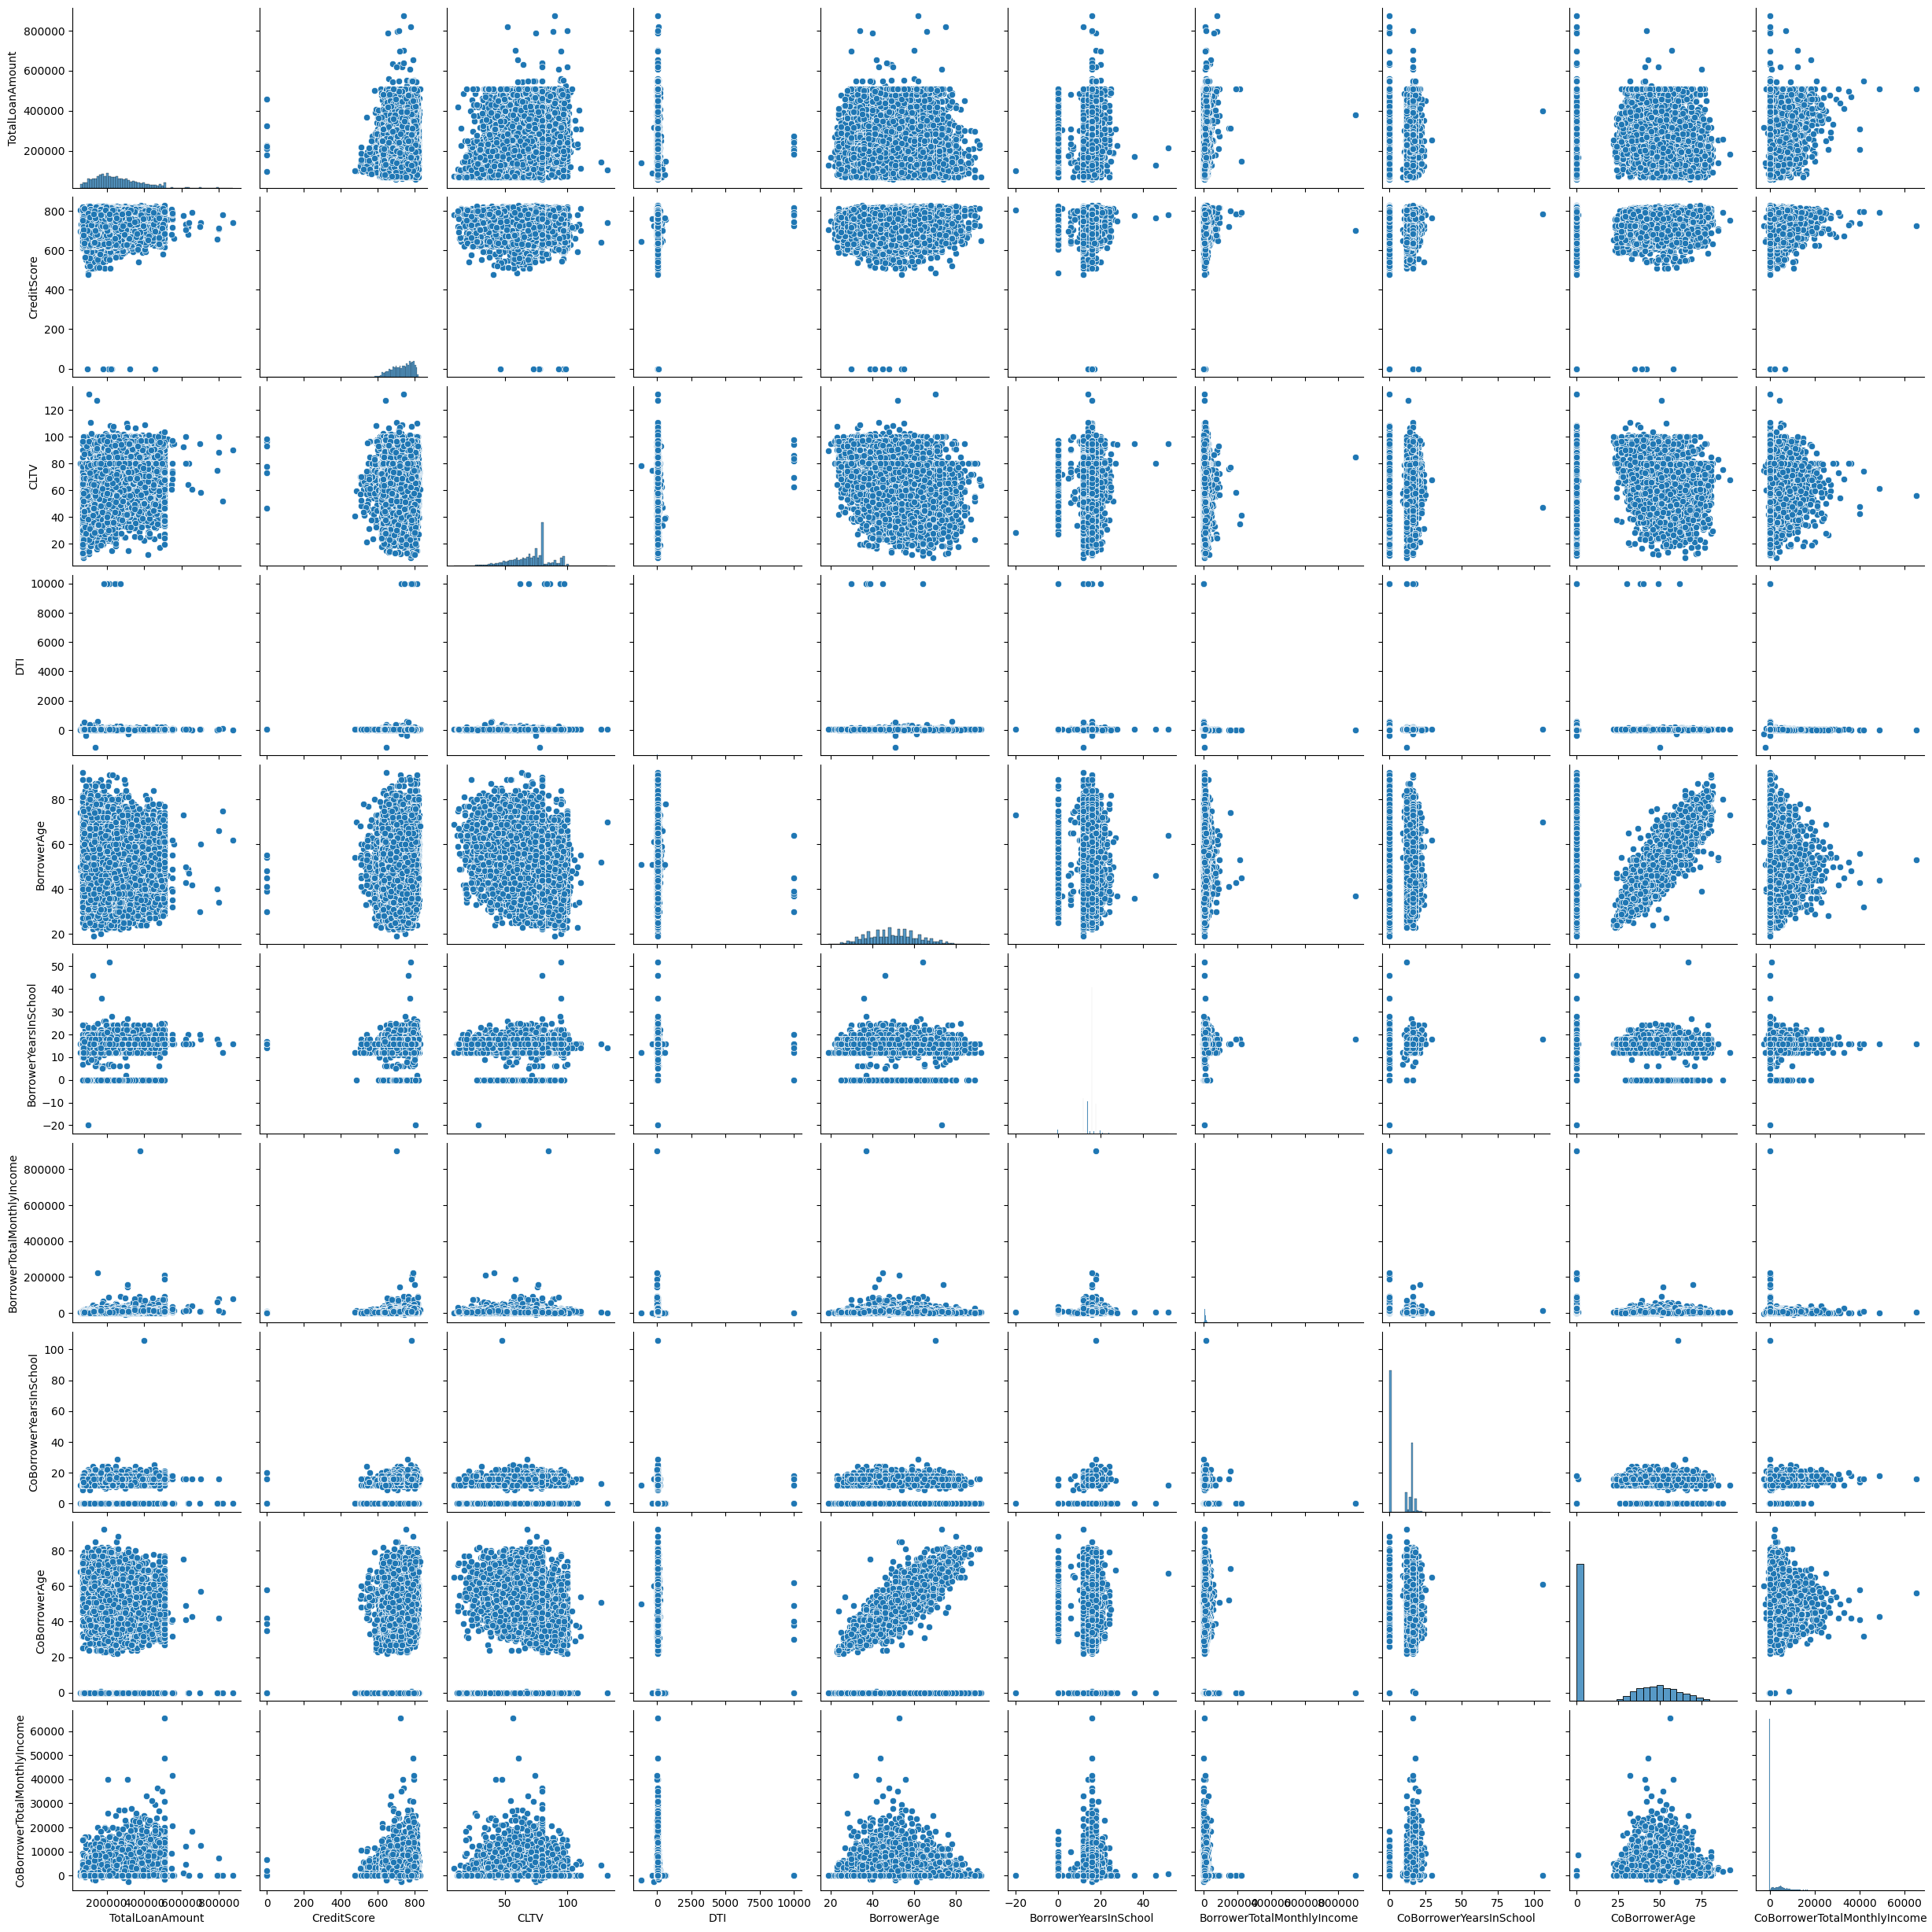

In [50]:
sns.pairplot(loan_original[nums_feats])


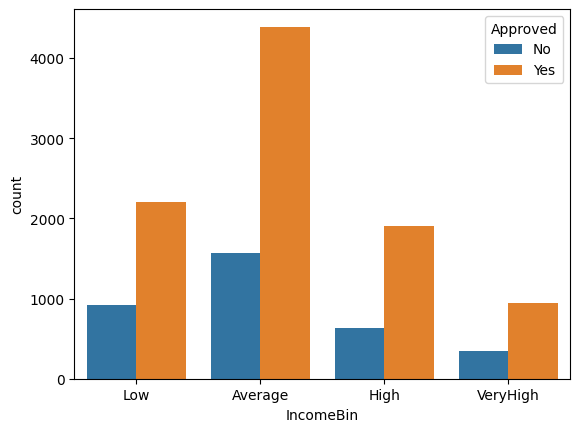

In [51]:
# Create bins
bins = [0, 5000, 10000, 15000, loan_original['BorrowerTotalMonthlyIncome'].max()]
group = ['Low', 'Average', 'High', 'VeryHigh']
loan_original['IncomeBin'] = pd.cut(loan_original['BorrowerTotalMonthlyIncome'], bins, labels=group)

# Use seaborn countplot
sns.countplot(x='IncomeBin', data=loan_original, hue='Approved')

# Show the plot
plt.show()


<Axes: xlabel='BorrowerAge', ylabel='Density'>

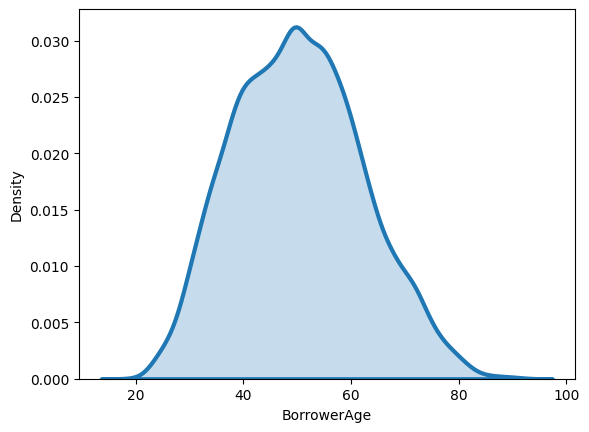

In [52]:

sns.distplot(loan_original['BorrowerAge'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})



<Axes: xlabel='BorrowerYearsInSchool', ylabel='Density'>

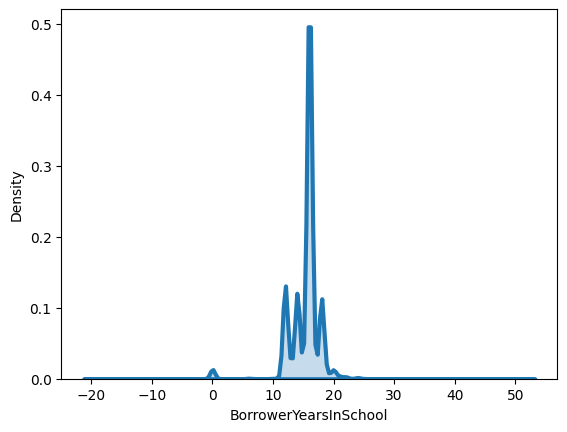

In [53]:

sns.distplot(loan_original['BorrowerYearsInSchool'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

<Axes: xlabel='Education', ylabel='count'>

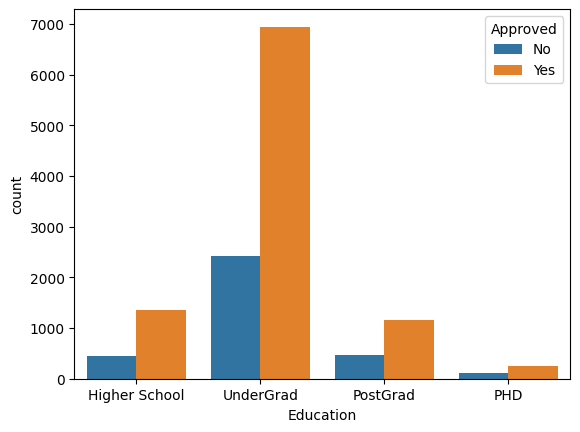

In [54]:
#Create bins for Education
bins=[0,12,16,18,loan_original.BorrowerYearsInSchool.max()]
group=['Higher School','UnderGrad','PostGrad','PHD']
loan_original['Education']=pd.cut(loan_original['BorrowerYearsInSchool'],bins,labels=group)
sns.countplot(x='Education',data=loan_original,hue='Approved')

# Step 3: Univariate Analysis

3.1 Categorical variables Analysis

In [55]:

catVars=['LeadSourceGroup','LoanType','LoanPurpose', 'Education','BorrowerOwnRent','ZipCode','BranchCode','LoanOfficer']
numVars=['TotalLoanAmount','CreditScore','CLTV', 'DTI','BorrowerAge',
       'TotalIncome']

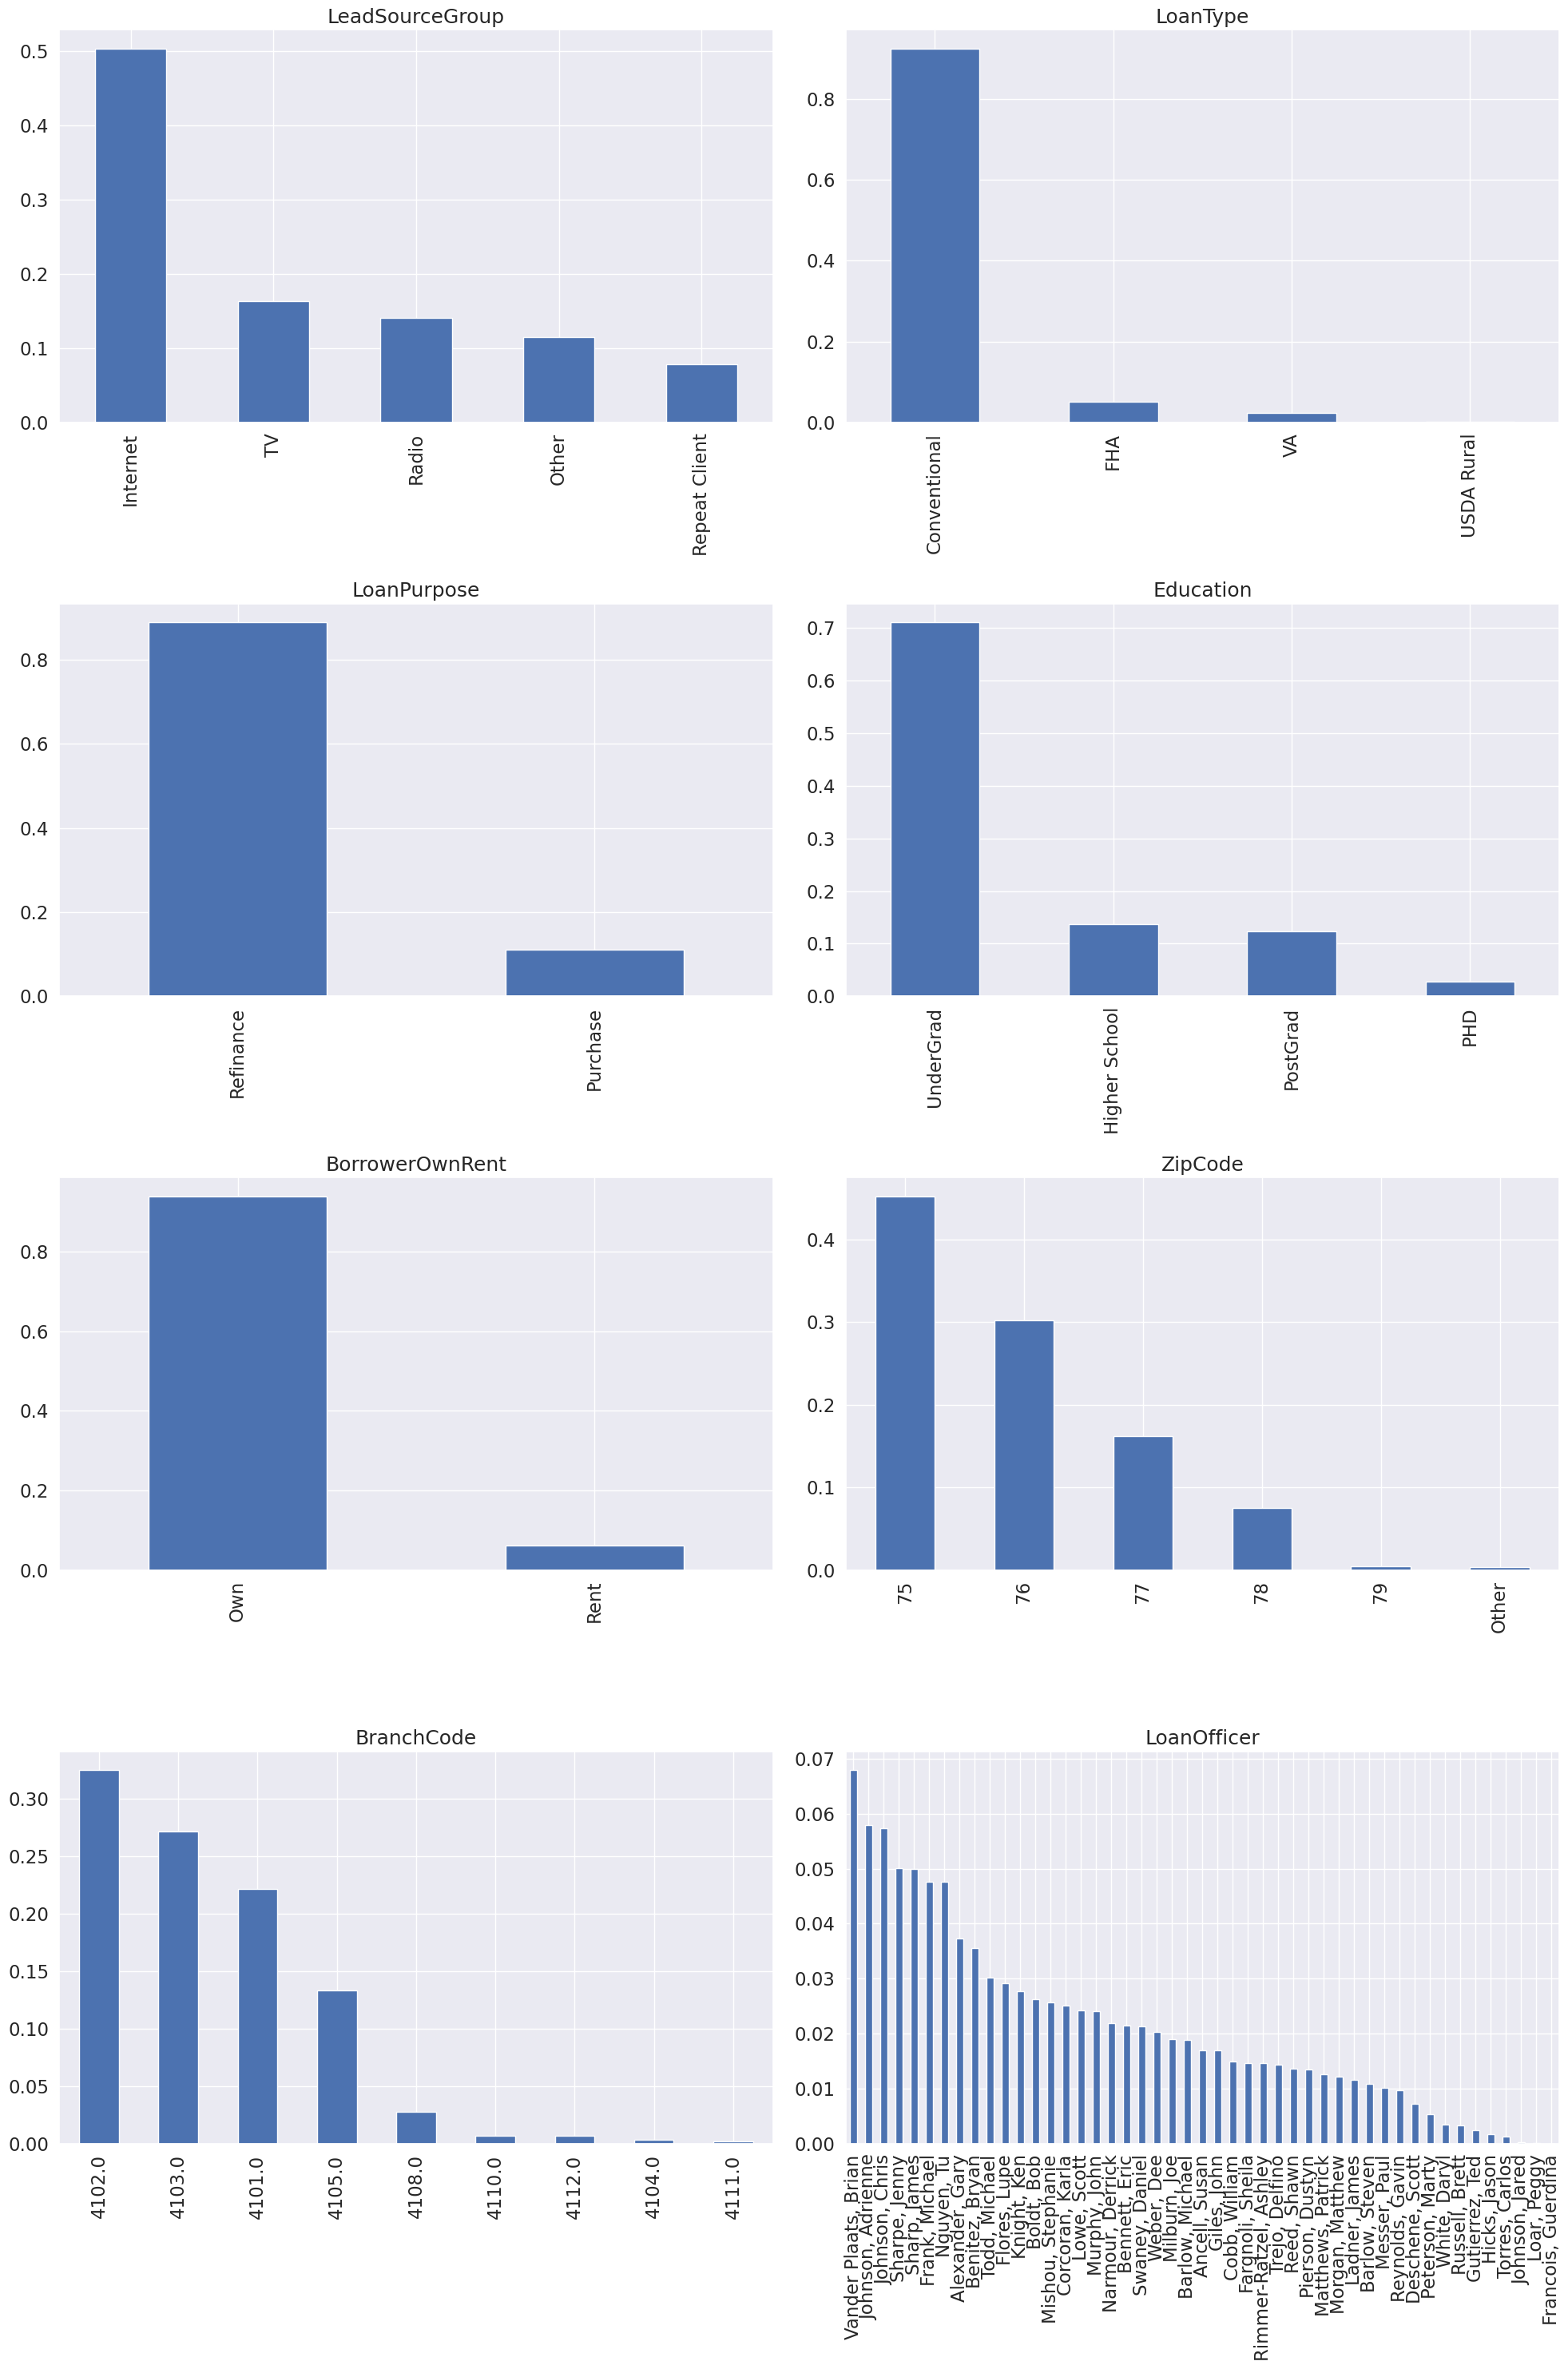

In [56]:
#Check distribution of all categorical variables
sns.set(font_scale=1.5)
### Check distribution of all features
plt.figure(figsize=(20,30), facecolor='white')
# plot numbering starts at 1, not 0
plot_number = 1
for  col in catVars:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(4, 2, plot_number)
    loan_original[col].value_counts(normalize=True).plot(kind='bar')
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

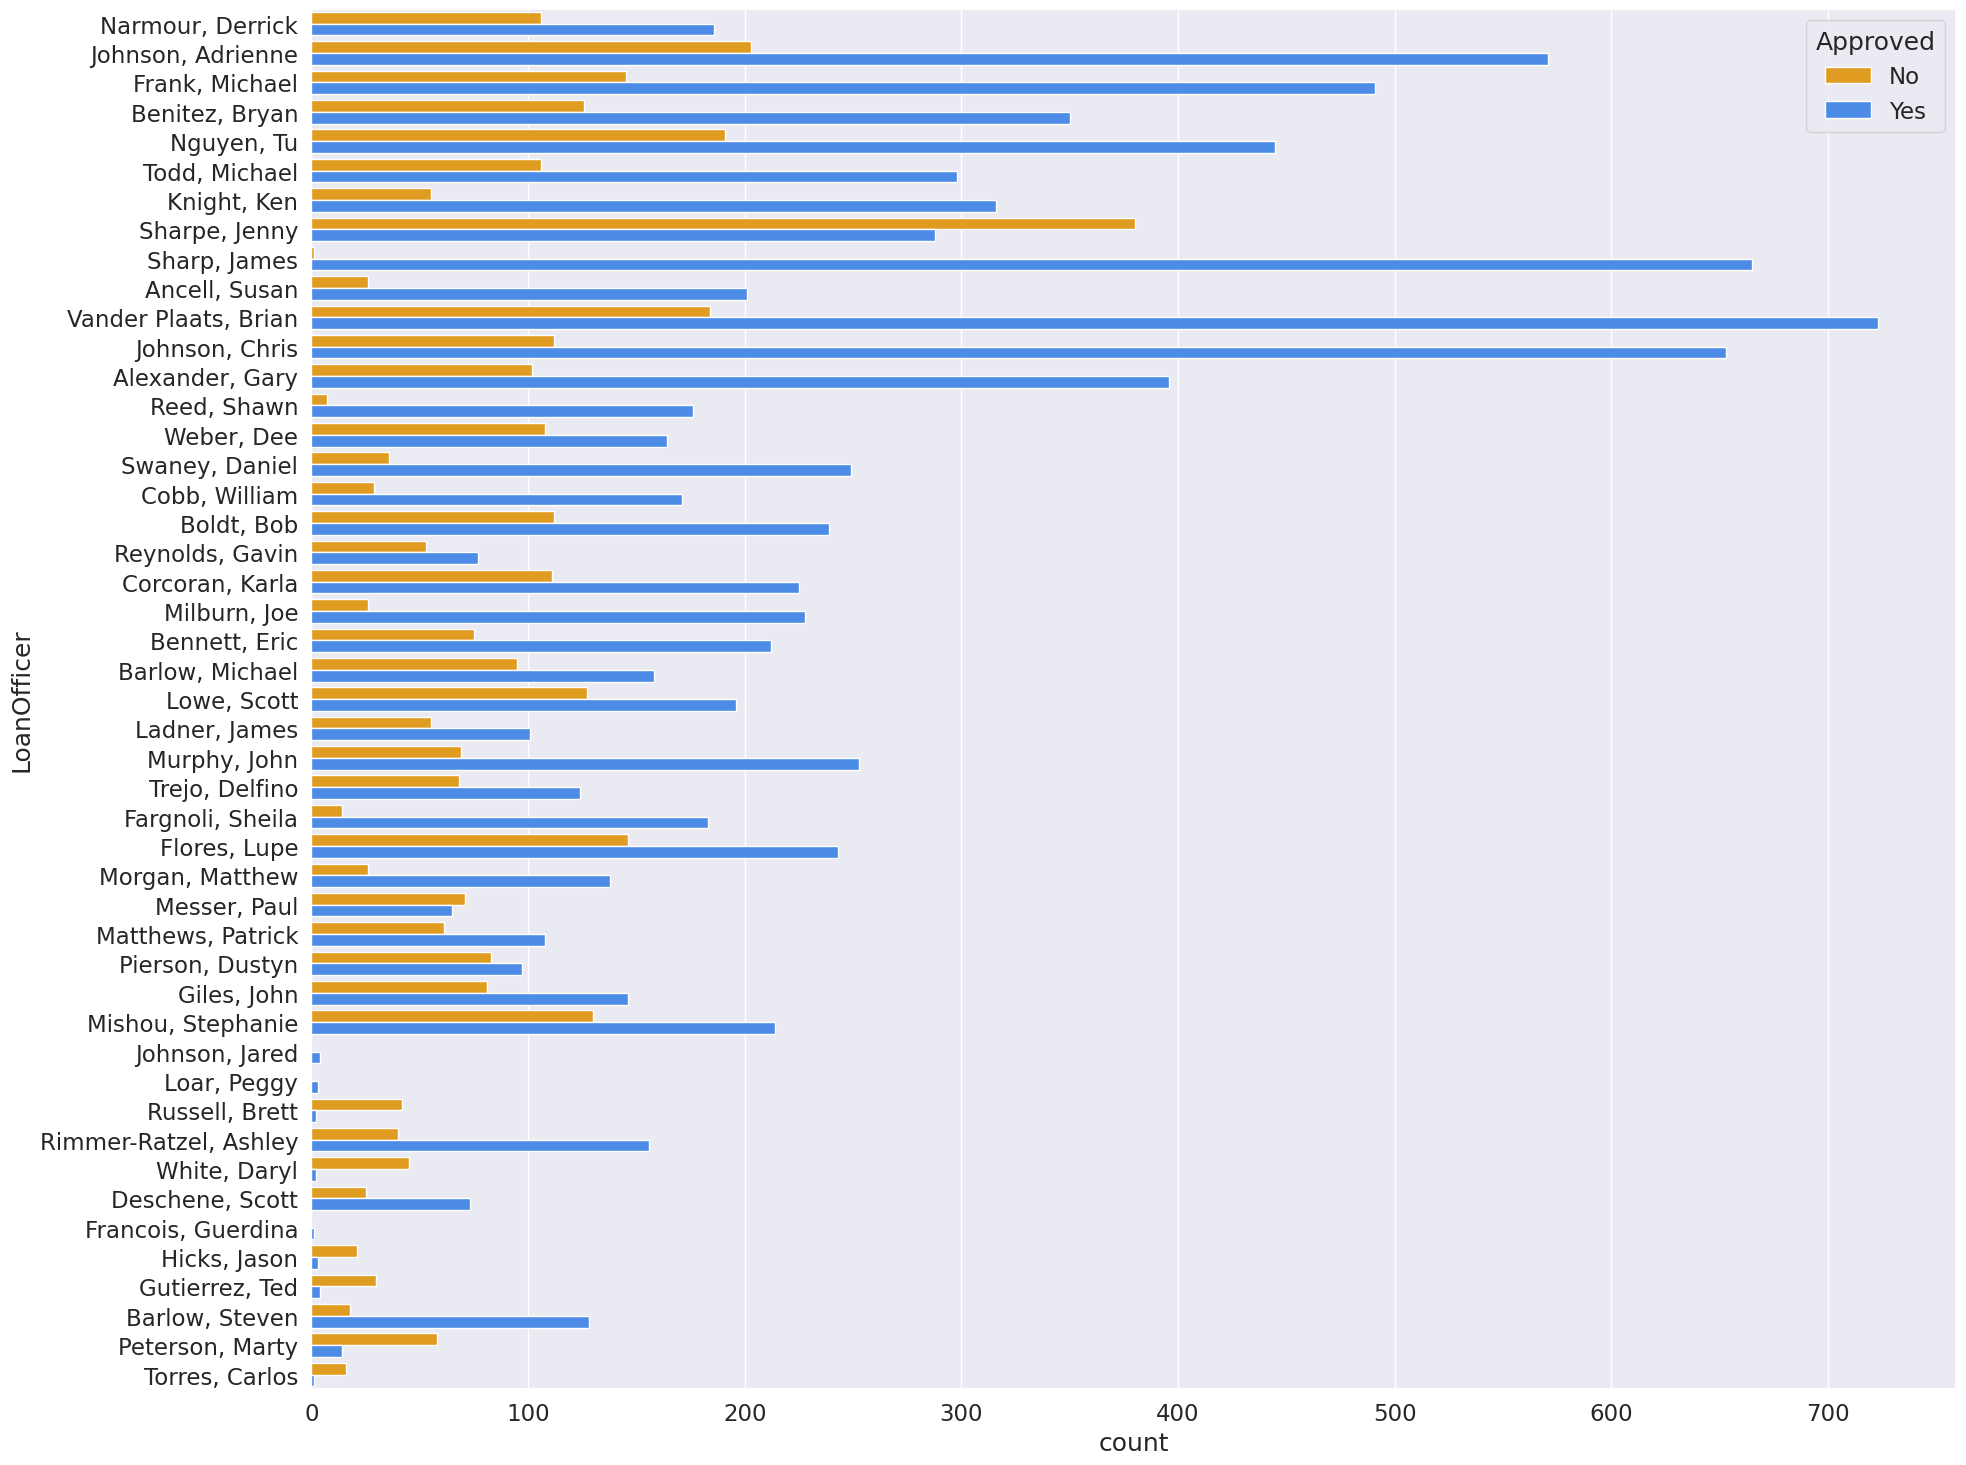

In [57]:

#Check distruibution for loan officer
plt.figure(figsize=(20,15), facecolor='white')
sns.countplot(y='LoanOfficer',data=loan_original,hue='Approved',palette=['#FFA500','#3388FF'])
plt.tight_layout()

##3.2 Numerical variables Analysis

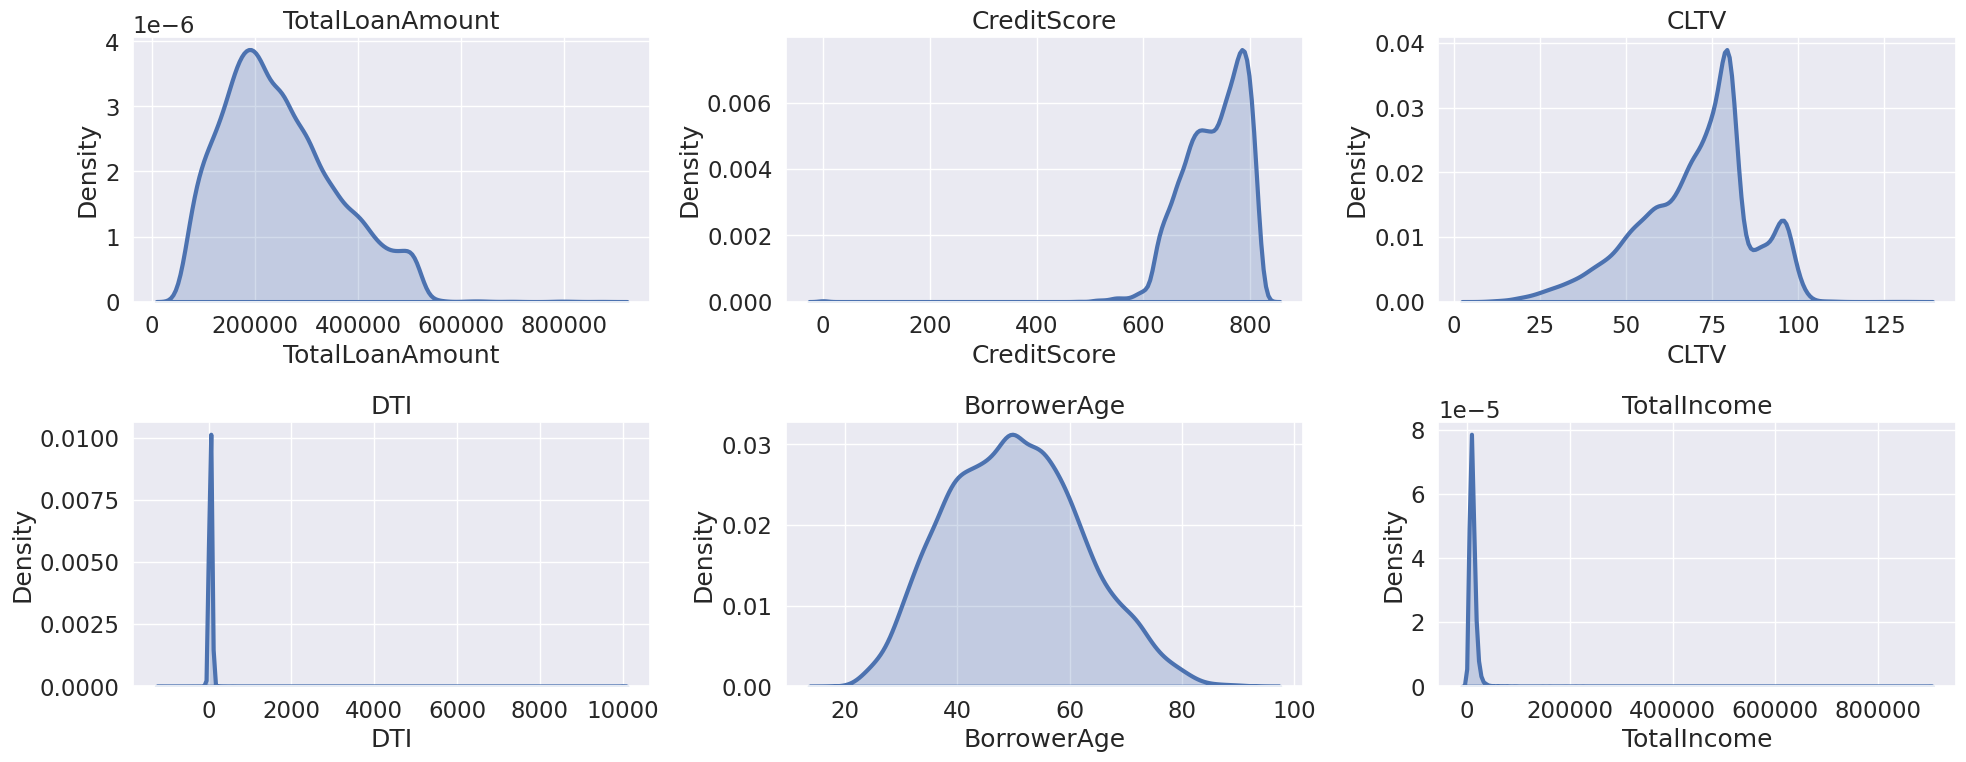

In [58]:

### Check distribution of all numerical features
plt.figure(figsize=(20,15), facecolor='white')
# plot numbering starts at 1, not 0
plot_number = 1
for  col in numVars:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(4, 3, plot_number)
    sns.distplot(loan_original[col], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()


# Inference:-
TotalLoanAmount & BorrowerAge have good distribution in comparison with other features.
Most of the applicants are in the age of 50.
CoBorrowerAge has got bimodal distribution ,one is centered around 0 and another is centered around 50. There seems to some problem with this feature.
CoBorrowerYearsInSchool has got bimodal distribution ,one is centered around 0 and another is centered around 14. There seems to some problem with this feature.




# Analysis:
**A. Total Loan Amount:**
  If the distribution of loan amounts is right-skewed, it means that the majority of loan amounts are concentrated on the lower end, and there are fewer instances of higher loan amounts. Here are some inferences you can draw:


1. **Most Loans are Small:** The peak of the distribution (mode) is likely to be on the left side, indicating that most loans have relatively smaller amounts. This could suggest that a significant proportion of the loans granted are for lower amounts.

2. **Fewer Large Loans:** The right tail of the distribution is longer, indicating that there are fewer instances of larger loan amounts. This might suggest that there are fewer borrowers or instances where substantial loan amounts are requested or approved.

3. **Potential Outliers:** Right-skewness often implies the presence of outliers on the higher end. Outliers could be instances where the loan amount is significantly larger than the majority of the loans. These outliers might be worth investigating further, as they could represent unique or special cases.

4. **Income Disparities:** A right-skewed distribution might reflect income disparities among the borrowers. It could indicate that a large proportion of borrowers have lower incomes and are requesting smaller loan amounts, while a smaller group of borrowers may have higher incomes and are eligible for larger loan amounts.

5. **Risk Assessment:** From a lending perspective, a right-skewed distribution might influence risk assessment. It suggests that the majority of borrowers are seeking smaller loans, which could be less risky. However, the presence of outliers implies that there might be higher-risk loans that need closer scrutiny.

In any data analysis, it's important to consider the context of the data and the specific characteristics of the population being studied. Exploring the reasons behind the observed distribution and understanding the implications for decision-making are crucial steps in drawing meaningful inferences.



**B. Credit Score:**
If the distribution of Credit Scores is left-skewed with a long left tail, several inferences can be made about the data:

1. **Majority of Scores are Higher:**
   - The peak of the distribution is on the right side, indicating that the majority of credit scores are higher. This could mean that a significant portion of the population has relatively good credit.

2. **Fewer Instances of Low Credit Scores:**
   - The long left tail suggests that there are fewer instances of very low credit scores. This could indicate that a smaller proportion of individuals in the dataset have poor credit.

3. **Potential Outliers on the Low End:**
   - The left tail also suggests the presence of outliers or extreme values on the lower end of the credit score spectrum. These outliers could represent individuals with exceptionally low credit scores.

4. **Skewed Distribution:**
   - The skewness to the left indicates that the distribution is not symmetrical. This might be due to factors such as economic conditions, lending practices, or other external influences that cause a concentration of higher credit scores.

5. **Positive Skewness:**
   - The left skewness implies a positive skewness, indicating that the mean is likely greater than the median. In other words, the average credit score might be higher than the middle point of the distribution.

6. **Potential Need for Transformation:**
   - Depending on the analysis and modeling techniques, the left-skewed distribution may benefit from transformation (e.g., logarithmic or square root) to make it more symmetrical and meet the assumptions of certain statistical methods.

7. **Creditworthiness of the Population:**
   - The distribution suggests that a significant portion of the population has good creditworthiness, but there are still individuals with lower credit scores. This information could be valuable for financial institutions or businesses that use credit scores for decision-making.

It's essential to consider the context of the data and the specific goals of the analysis when interpreting the characteristics of the distribution. Additionally, further exploration and analysis may be needed to understand the factors contributing to the observed credit score distribution.


**C. CLTV:**
If the distribution of Customer Lifetime Value (CLTV) is left-skewed when visualized using `sns.distplot` (a seaborn function for plotting distributions), it implies that the majority of customers have lower CLTV values, with a tail extending towards higher values. Here are some potential inferences you can draw:

1. **Majority of Customers have Lower CLTV:**
   - The peak of the distribution is towards the lower end of CLTV values, indicating that most customers have relatively lower lifetime values.

2. **Potential Outliers with High CLTV:**
   - The left skewness suggests the presence of a few customers with significantly higher CLTV values, appearing as outliers. These customers contribute to the tail on the higher end of the distribution.

3. **Varied Customer Segments:**
   - The distribution might indicate the existence of distinct segments within the customer base. The majority of customers may fall into one segment with lower CLTV, while a smaller segment may exhibit higher CLTV.

4. **Potential for Targeted Marketing:**
   - Businesses may consider targeting marketing efforts towards the segment with lower CLTV to improve customer retention and increase their lifetime value.

5. **Opportunity for Improvement:**
   - If the goal is to increase overall CLTV, businesses may need to explore strategies to enhance customer loyalty, engagement, and satisfaction, particularly within the segment showing lower CLTV.

6. **Understanding Customer Behavior:**
   - Left-skewed distributions might indicate that customers tend to make a few high-value transactions but are less likely to remain engaged over an extended period.

7. **Consideration for Business Strategy:**
   - The left-skewed CLTV distribution may influence strategic decisions related to resource allocation, marketing budgeting, and customer relationship management.

It's important to note that the interpretation of the distribution should be done in the context of the specific business and its goals. Additionally, examining the underlying factors contributing to the distribution and considering external variables can provide a more comprehensive understanding of customer behavior and CLTV patterns.

**D. DTI:**
If the Seaborn `sns.distplot` for Debt-to-Income Ratio (DTI) is right-skewed with a long tail on the right side, several inferences can be made about the distribution of the data. Here are some interpretations:

1. **Positive Skewness:**
   - The distribution is positively skewed, meaning that the majority of the data points have lower DTI values, but there is a long tail towards higher DTI values.
   - This suggests that a significant portion of the population has lower debt-to-income ratios, which is generally considered favorable.

2. **Outliers:**
   - The long tail on the right side indicates the presence of outliers with higher DTI values. These outliers might represent individuals or cases with exceptionally high debt relative to their income.

3. **Potential Financial Risk:**
   - High DTI values are often associated with financial risk, as they indicate a larger proportion of income being used to cover debt obligations. The presence of a long tail on the right side may suggest that there is a subset of the population facing higher financial risk.

4. **Income Disparities:**
   - The skewness in the distribution may also suggest income disparities, with a significant portion of the population having lower incomes and consequently lower DTI values, while a smaller group has higher incomes and higher DTI values.

5. **Possible Need for Financial Education or Assistance:**
   - The distribution could indicate a need for financial education or assistance for those with higher DTI values, as they may be at a higher risk of financial strain or difficulty in managing their debt.

6. **Lending and Credit Risk:**
   - For financial institutions, a right-skewed distribution may imply that a majority of their clients have manageable DTI ratios, but there is a smaller subset with higher DTI values that could pose a higher credit risk.

7. **Policy Implications:**
   - Policymakers might consider addressing income disparities or implementing targeted interventions to assist individuals with high DTI values, especially if there is a substantial portion of the population affected.

It's important to note that these inferences are based on the assumption that DTI follows a right-skewed distribution. The interpretation may vary depending on the context of the data and the specific characteristics of the population under consideration.

**E. Total Income:**
If the distribution of Total Income is right-skewed with a long tail on the right side, there are several inferences you can draw:

1. **Positive Skewness:** The fact that the distribution is right-skewed indicates that there is a tail on the right side of the distribution. This implies that there are a few high-income individuals or cases that contribute to the skewness. The majority of the data points are likely clustered towards the lower end of the income scale.

2. **Outliers or High-Income Individuals:** The long tail on the right side suggests the presence of outliers or individuals with significantly higher incomes than the rest of the population. These outliers can have a substantial impact on the mean of the distribution, pulling it towards higher values.

3. **Income Inequality:** The right-skewed distribution implies income inequality, where a small proportion of the population has much higher incomes than the majority. This could be an indication of a wealth gap within the studied population.

4. **Log Transformation Consideration:** In cases where the distribution is highly right-skewed, it might be beneficial to consider log-transforming the data. This can help in reducing the impact of extreme values and make the distribution more symmetric.

5. **Median vs. Mean:** Due to the skewness, the mean (average) income may be higher than the median income. The median is a more robust measure of central tendency in skewed distributions as it is less affected by extreme values.

6. **Financial Planning Considerations:** Understanding the skewness of income distribution is important for financial planning and policy-making. It helps identify the income levels of the majority of the population as well as the potential challenges associated with high-income individuals.

7. **Tail Analysis:** Examining the long tail on the right side can provide insights into the extent of the income disparities. It might be interesting to investigate the specific characteristics of individuals in the high-income bracket and understand the factors contributing to their outlier status.

In summary, a right-skewed distribution with a long tail on the right side indicates income inequality, the presence of outliers, and suggests a need for careful analysis when using the mean as a measure of central tendency.

In [59]:
## Filter out outliers

loan_original=loan_original[loan_original.CLTV<110]
loan_original=loan_original[loan_original.TotalLoanAmount<600000]
loan_original=loan_original[loan_original.CreditScore>550]
loan_original=loan_original[loan_original.TotalIncome<=30000]


# 4. Bivariate Analysis
4.1 Categorical Independent Variables vs Target Variable

<Axes: xlabel='Education', ylabel='count'>

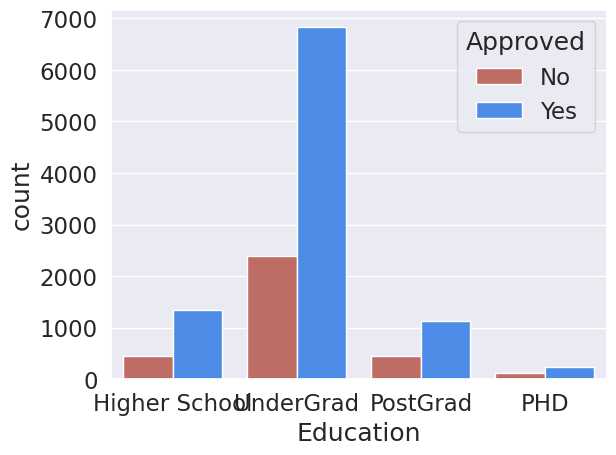

In [60]:
sns.countplot(x='Education',data=loan_original,hue='Approved',palette=['#CD6155','#3388FF'])


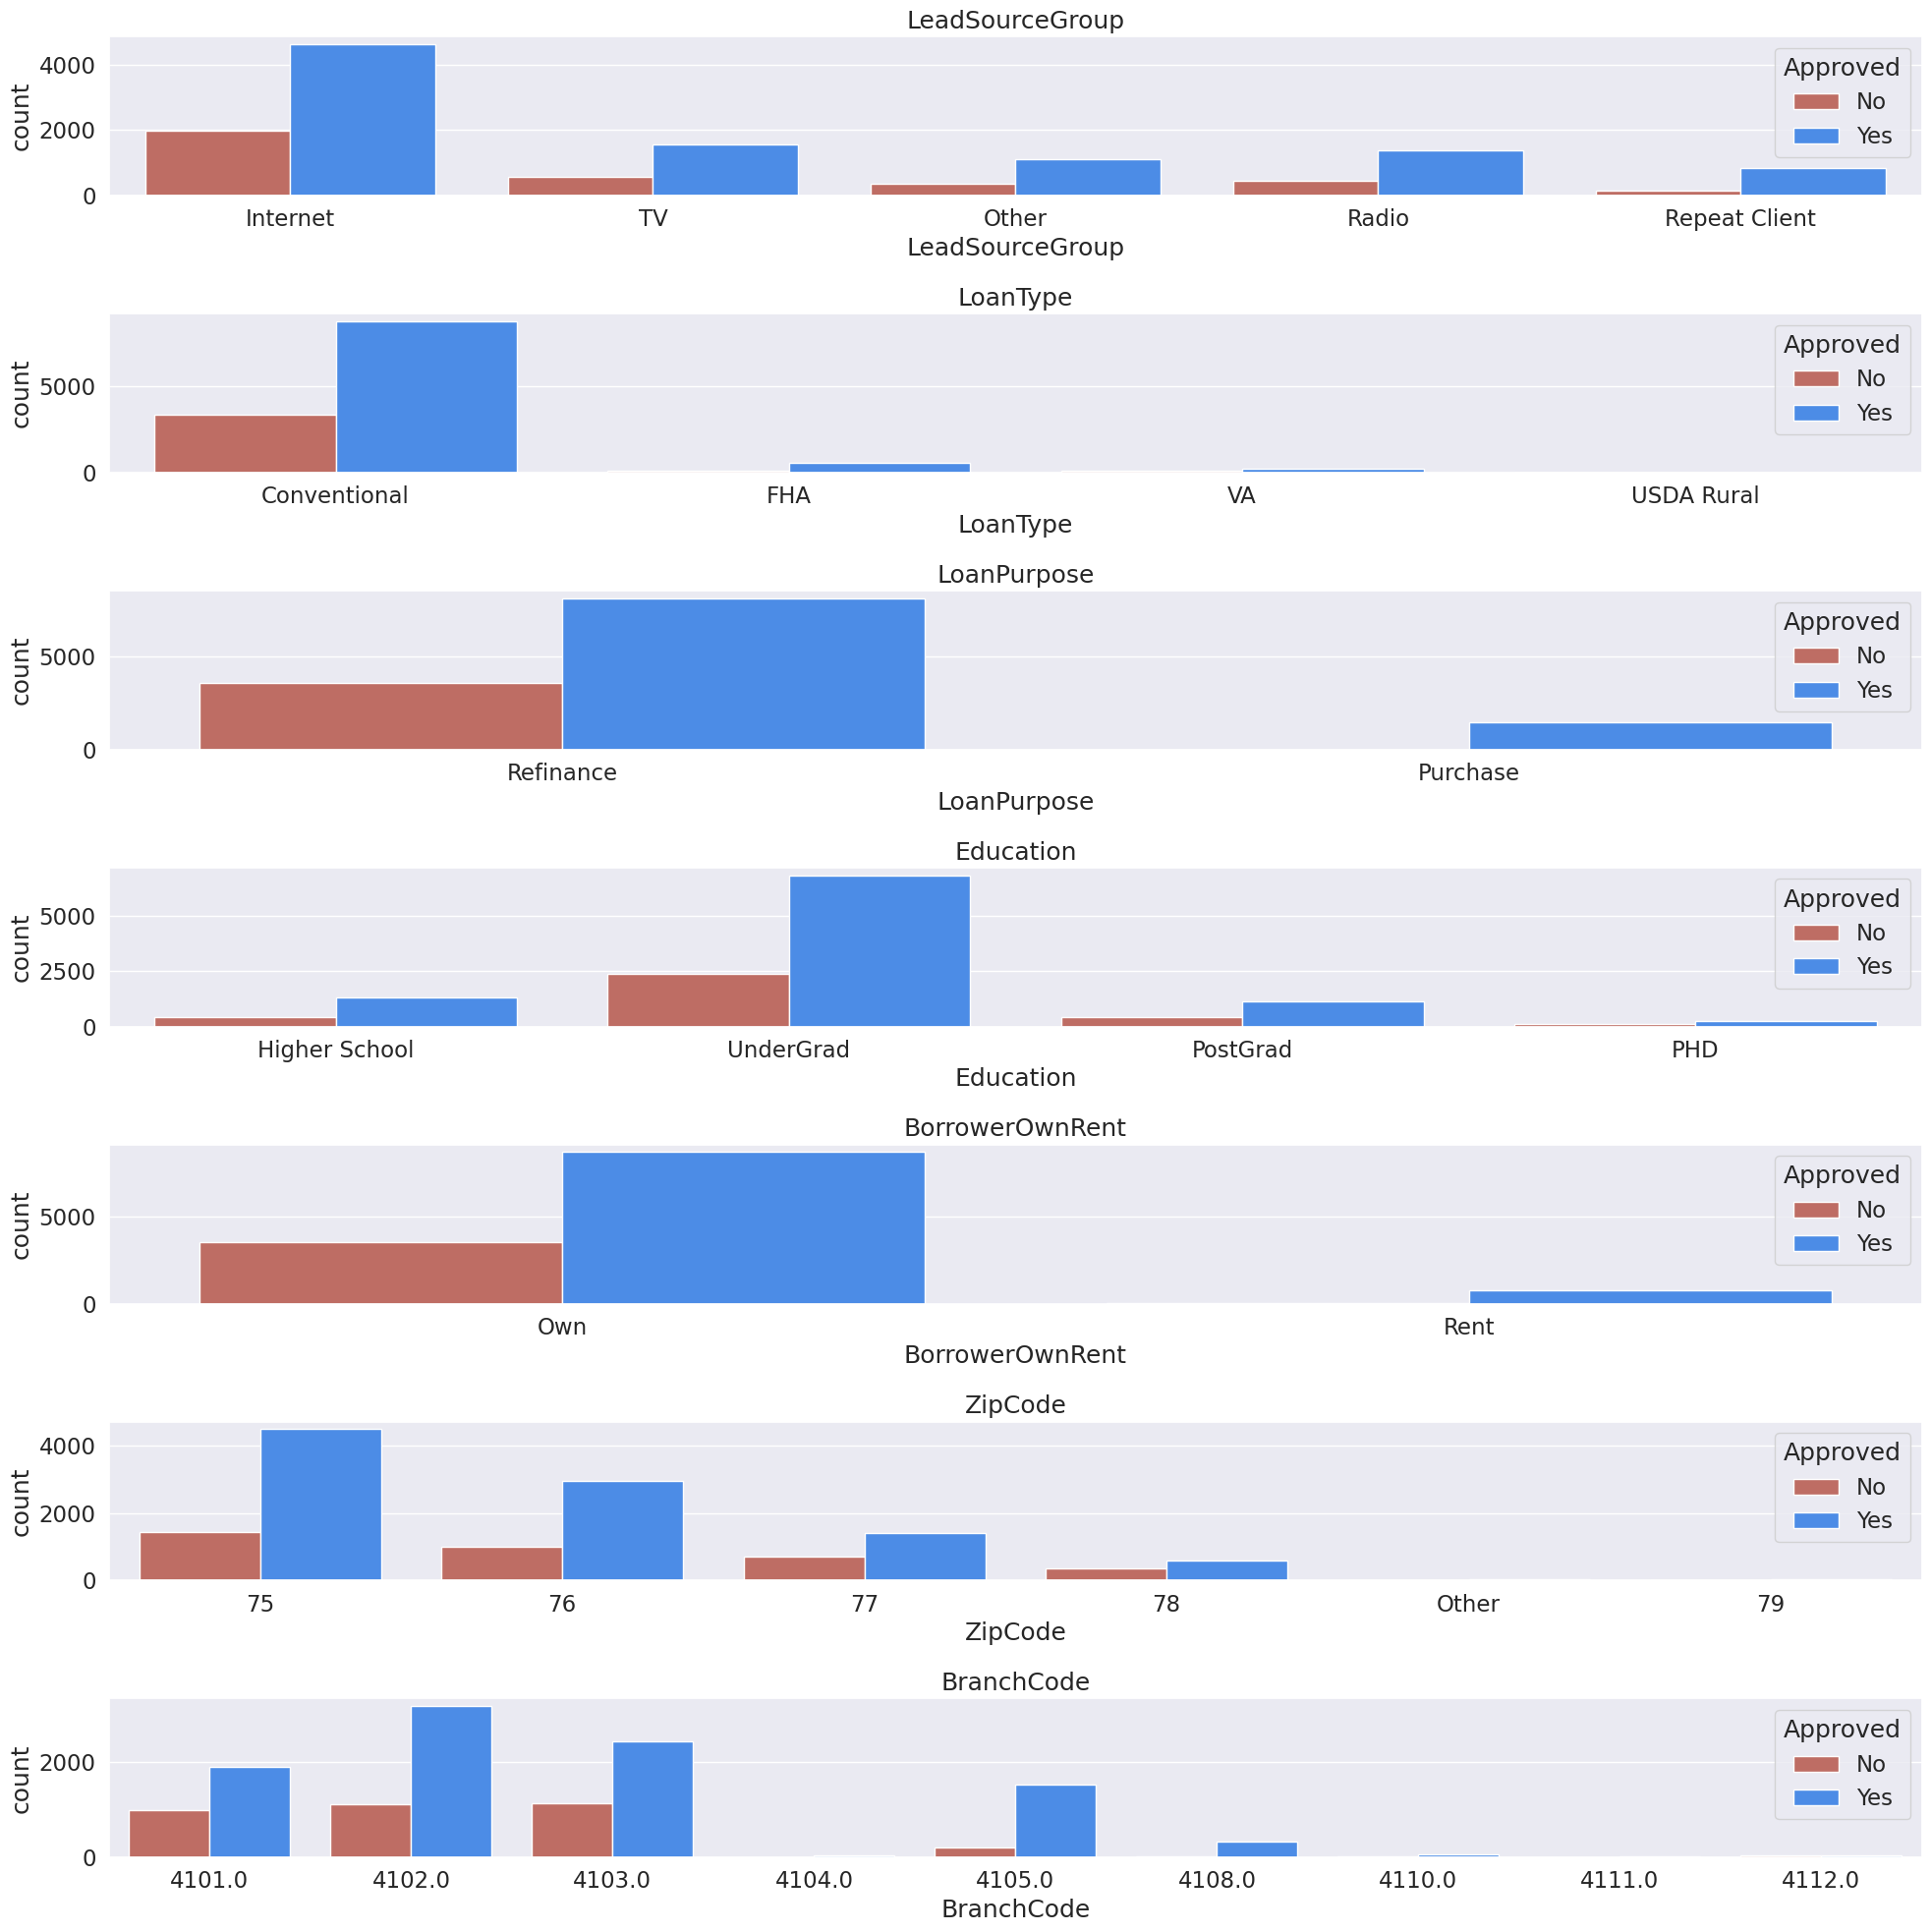

In [61]:

### Check distribution of all Categorical features
plt.figure(figsize=(20,20), facecolor='white')
# plot numbering starts at 1, not 0`
plot_number = 1
for  col in catVars[:-1]:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(len(catVars[:-1]), 1, plot_number)
    sns.countplot(x=col,data=loan_original,hue='Approved',palette=['#CD6155','#3388FF'])
    ax.set_title(col)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

# Inference :-
Loan Approval rate is high for leads coming through Internet , TV & Radio channel in comparision with other channels. Internet is contributing highest in it.
Loan Approval rate is high for Refinance-Cash-out & Refinance .
Loan Approval rate is high for conventional loan types.
Loan Approval rate is high for loan applicants ,who've their own home.
Loan Approval rate is high for loan applicants,who're are from ZipCode 75 & 76.


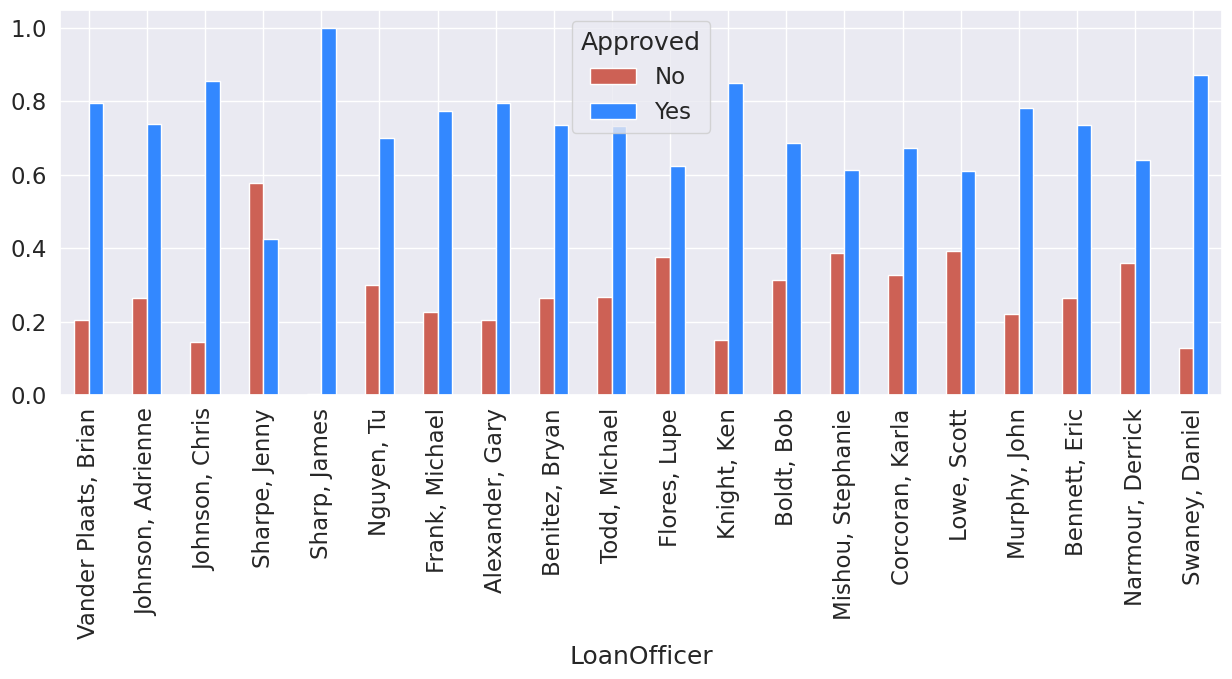

In [62]:
#Check Loan Approval rate for loan officers
newDf=pd.crosstab(loan_original.LoanOfficer,loan_original.Approved).rename(columns={0:'No',1:'Yes'})
newDf['Total']=newDf['Yes']+newDf['No']
newDf.sort_values(by='Total',ascending=False,inplace=True)
newDf.drop(['Total'],axis=1,inplace=True)
newDf[0:20]


top=20
newDf[0:top].div(newDf[0:top].sum(1).astype(float), axis=0).plot(kind="bar",stacked=False,figsize=(15,5),color=['#CD6155','#3388FF'])
plt.show()

# Inference :-
Loan refusal rate is high for Sharp,James
Whereas Loan Approval rate is high for Sharp James ,Johnson Chris,Swaney Daniel & Vander Plaats,Brian in comparison with other officers.
4.2 Numerical Independent Variables vs Target Variable
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved



<Axes: xlabel='Approved'>

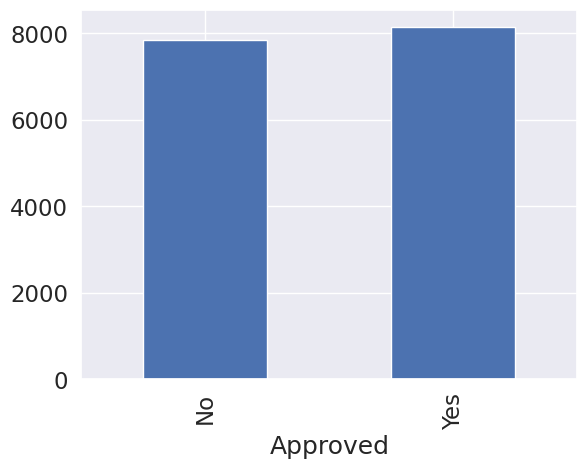

In [63]:

#Check loan Approval status based on total income
loan_original.groupby('Approved')['BorrowerTotalMonthlyIncome'].mean().plot.bar()

Difference in mean income based on Loan Approval status is quite marginal. Let's create bins for applicants's total income and analyze with respect to Loan Approval Status

<Axes: xlabel='IncomeBin', ylabel='count'>

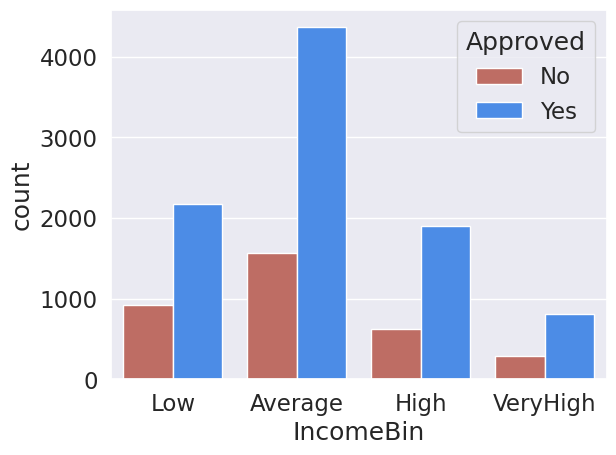

In [64]:
#Create bins
bins=[0,5000,10000,15000,loan_original.BorrowerTotalMonthlyIncome.max()]
group=['Low','Average','High','VeryHigh']
loan_original['IncomeBin']=pd.cut(loan_original['BorrowerTotalMonthlyIncome'],bins,labels=group)
sns.countplot(x='IncomeBin',data=loan_original,hue='Approved',palette=['#CD6155','#3388FF'])

We can clearly see that It supports out hypothesis that applicants with higher income would have higher chance of loan being approved


<Axes: xlabel='Approved'>

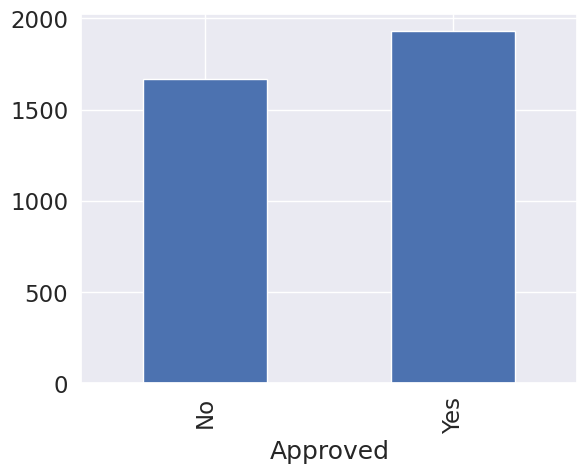

In [65]:
#We will analyze the co-applicant income
#Check loan Approval status based on total income
loan_original.groupby('Approved')['CoBorrowerTotalMonthlyIncome'].mean().plot.bar()

There's significant difference between mean income of coapplicants with respect to Loan Approval status. We've already seen that CoBorrowerTotalMonthlyIncome hass bimodal distribution


<Axes: xlabel='IncomeBin', ylabel='count'>

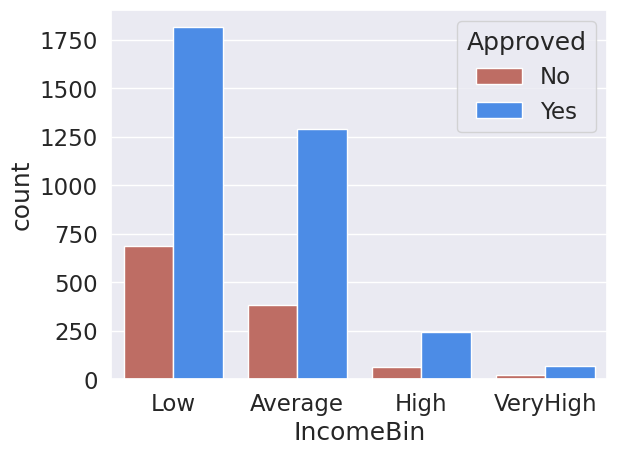

In [66]:

#Create bins
bins=[0,5000,10000,15000,loan_original.CoBorrowerTotalMonthlyIncome.max()]
group=['Low','Average','High','VeryHigh']
loan_original['IncomeBin']=pd.cut(loan_original['CoBorrowerTotalMonthlyIncome'],bins,labels=group)
sns.countplot(x='IncomeBin',data=loan_original,hue='Approved',palette=['#CD6155','#3388FF'])

We can clearly see that It supports out hypothesis that applicants with higher income would have higher chance of loan being approved. Let's combine both applicant's income and analyze

<Axes: xlabel='Approved'>

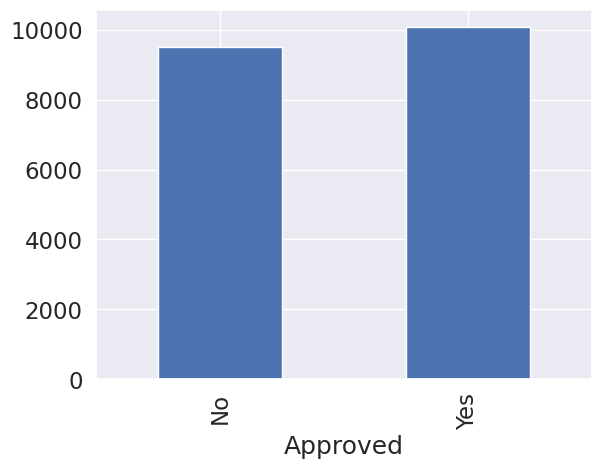

In [67]:



#Check loan Approval status based on total income
loan_original.groupby('Approved')['TotalIncome'].mean().plot.bar()


We can see that proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.


<Axes: xlabel='Approved'>

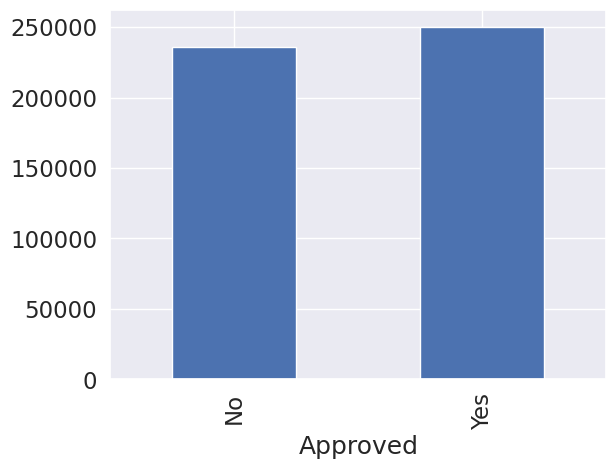

In [68]:


#Let’s visualize the Loan Amount variable.
loan_original.groupby('Approved')['TotalLoanAmount'].mean().plot.bar()

~ ( It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.)
Let’s drop the bins which we created for the exploration part.
We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.


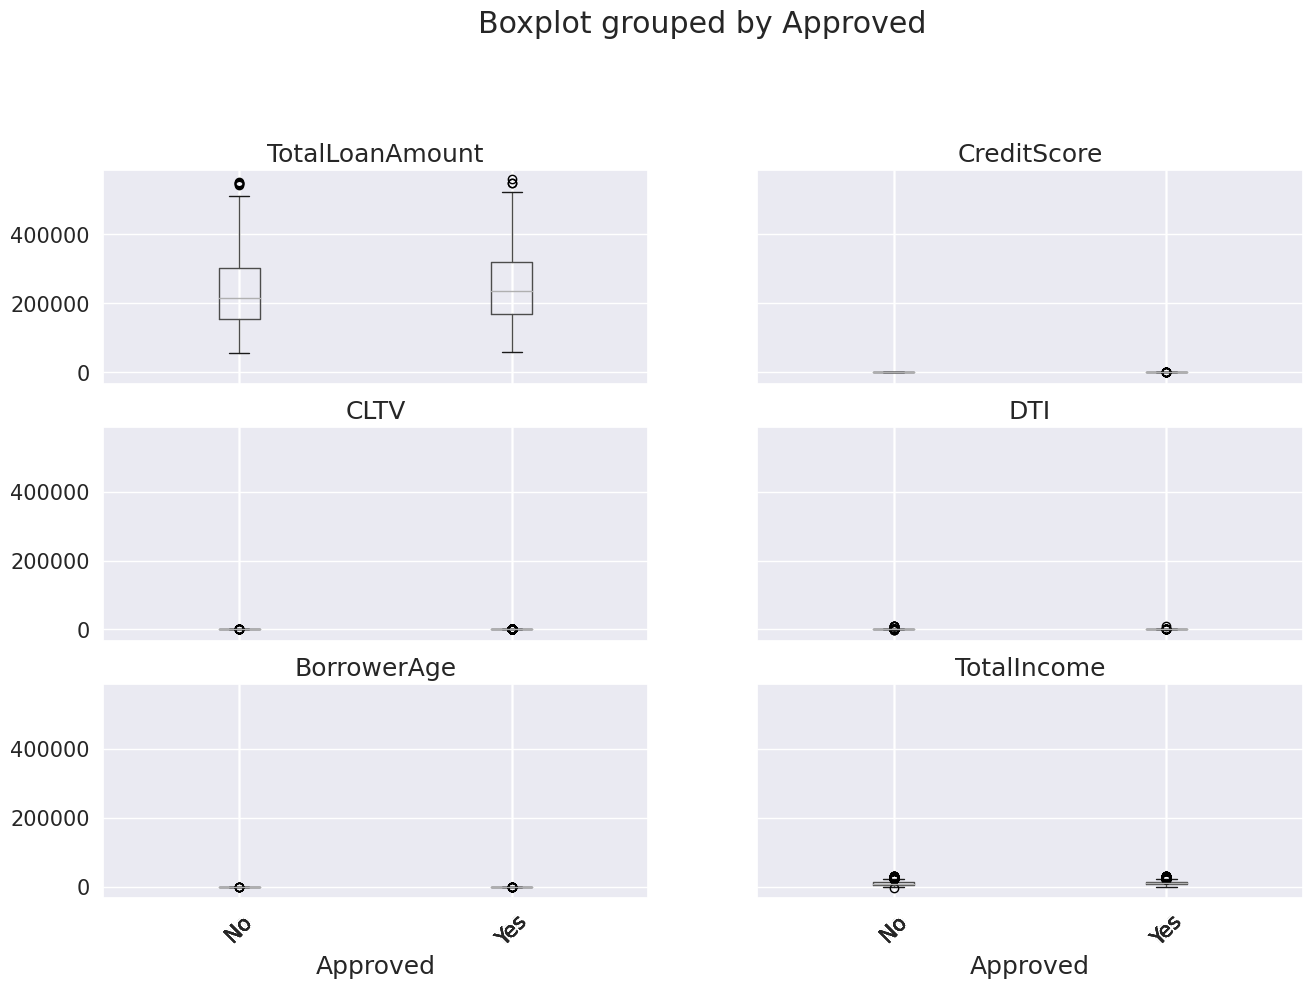

In [69]:

#Box plot by Target Variable
boxplot = loan_original.boxplot(column=numVars,by='Approved',figsize=(15,20) ,layout=(6, 2),grid=True, rot=45, fontsize=15)


# Relationship with Target variable

In [70]:
Education = loan_original['Education'].mode().values[0]
IncomeBin = loan_original['IncomeBin'].mode().values[0]




# Replace NaN values with the mode
loan_original['Education'].fillna(Education, inplace=True)
loan_original['IncomeBin'].fillna(IncomeBin, inplace=True)


# Convert 'LoanType' to category
loan_original['LoanType'] = loan_original['LoanType'].astype('category')


In [71]:
from scipy.stats import chi2_contingency

#Check Loan Approval rate for loan officers
chiTestVel=pd.crosstab(loan_original.LoanOfficer,loan_original.Approved).rename(columns={0:'No',1:'Yes'})


chi2_stat, p_val, dof, expected = chi2_contingency(chiTestVel)
print("===Chi2 Stat===")
print('chi2_stat :',chi2_stat ,'dof :',dof ,'p_val :',p_val )


===Chi2 Stat===
chi2_stat : 1591.5841768834075 dof : 46 p_val : 1.4820800135534497e-303


Inference:

The Chi-Square statistic is a measure of the independence between the two categorical variables. In this case, a larger Chi-Square value indicates a stronger association between the variables.

The degrees of freedom (dof) is the number of categories minus 1. In this context, it is 46, which is the number of categories in "LoanOfficer" minus 1.

The p-value is extremely close to zero (3.6774653051515025e-212), which is well below conventional significance levels (e.g., 0.05). A very low p-value suggests that there is a significant association between the "LoanOfficer" and "Approved" variables.

Conclusion: Based on the Chi-Square test results, there appears to be a statistically significant association between the loan approval status ("Approved") and the loan officers ("LoanOfficer"). This indicates that the loan approval rate may vary significantly among different loan officers, and there may be a relationship between the loan officer and the likelihood of loan approval.


In [72]:
from scipy.stats import chi2_contingency

#Check Loan Approval rate for loan officers
chiTestVel=pd.crosstab(loan_original.IncomeBin,loan_original.Approved).rename(columns={0:'No',1:'Yes'})


chi2_stat, p_val, dof, expected = chi2_contingency(chiTestVel)
print("===Chi2 Stat===")
print('chi2_stat :',chi2_stat ,'dof :',dof ,'p_val :',p_val )


===Chi2 Stat===
chi2_stat : 26.49389325894926 dof : 3 p_val : 7.516027448040274e-06


Here's the interpretation of the chi-squared test results:

- **Chi2 Stat (Chi-square Statistic):** 26.49
- **Degrees of Freedom (dof):** 3
- **p-value (p_val):** 7.52e-06 (or 0.00000752)

**Interpretation:**
- The chi-square statistic (26.49) is a measure of how much the observed counts differ from the expected counts under the assumption of independence between 'IncomeBin' and 'Approved'.
- Degrees of freedom (dof) represent the number of categories minus 1. In this case, there are 4 categories (IncomeBin), so dof = 3.
- The very low p-value (7.52e-06) suggests that there is a significant association between 'IncomeBin' and 'Approved'. In other words, it indicates that the distribution of 'Approved' is not independent of 'IncomeBin'.

**Conclusion:**
- Based on the p-value being extremely small, you have evidence to reject the null hypothesis that 'IncomeBin' and 'Approved' are independent. There is a significant association between the income level and the approval status.

In practical terms, it suggests that the income level might be a relevant factor in predicting the loan approval status. Borrowers in different income categories may have different loan approval rates.

In [73]:

from scipy.stats import chi2_contingency

#Check Loan Approval rate for loan officers
chiTestVel=pd.crosstab(loan_original.LoanType,loan_original.Approved).rename(columns={0:'No',1:'Yes'})


chi2_stat, p_val, dof, expected = chi2_contingency(chiTestVel)
print("===Chi2 Stat===")
print('chi2_stat :',chi2_stat ,'dof :',dof ,'p_val :',p_val )



===Chi2 Stat===
chi2_stat : 61.86956809707216 dof : 3 p_val : 2.342768303584979e-13


The chi-squared test is a statistical test used to determine if there is a significant association between two categorical variables. In your case, you're testing the association between the 'LoanType' variable and the 'Approved' variable.

Here's the interpretation of the chi-squared test results:

- **Chi2 Stat (Chi-square Statistic):** 26.49
- **Degrees of Freedom (dof):** 3
- **p-value (p_val):** 7.52e-06 (or 0.00000752)

**Interpretation:**
- The chi-square statistic (26.49) is a measure of how much the observed counts differ from the expected counts under the assumption of independence between 'LoanType' and 'Approved'.
- Degrees of freedom (dof) represent the number of categories minus 1. In this case, there are 4 categories (LoanType), so dof = 3.
- The very low p-value (7.52e-06) suggests that there is a significant association between 'LoanType' and 'Approved'. In other words, it indicates that the distribution of 'Approved' is not independent of 'LoanType'.

**Conclusion:**
- Based on the p-value being extremely small, you have evidence to reject the null hypothesis that 'LoanType' and 'Approved' are independent. There is a significant association between the type of loan and the approval status.

In practical terms, it suggests that the type of loan might be a relevant factor in predicting the loan approval status.

In [74]:
from scipy.stats import chi2_contingency

#Check Loan Approval rate for loan officers
chiTestVel=pd.crosstab(loan_original.Education,loan_original.Approved).rename(columns={0:'No',1:'Yes'})


chi2_stat, p_val, dof, expected = chi2_contingency(chiTestVel)
print("===Chi2 Stat===")
print('chi2_stat :',chi2_stat ,'dof :',dof ,'p_val :',p_val )


===Chi2 Stat===
chi2_stat : 9.782638772458569 dof : 3 p_val : 0.020507087754608


Here's the interpretation of the chi-squared test results:

- **Chi2 Stat (Chi-square Statistic):** 9.78
- **Degrees of Freedom (dof):** 3
- **p-value (p_val):** 0.0205

**Interpretation:**
- The chi-square statistic (9.78) is a measure of how much the observed counts differ from the expected counts under the assumption of independence between 'Education' and 'Approved'.
- Degrees of freedom (dof) represent the number of categories minus 1. In this case, there are 4 categories (Education), so dof = 3.
- The p-value (0.0205) suggests that there is a significant association between 'Education' and 'Approved'. In other words, it indicates that the distribution of 'Approved' is not independent of 'Education'.

**Conclusion:**
- Based on the p-value being less than the common significance level of 0.05, you have evidence to reject the null hypothesis that 'Education' and 'Approved' are independent. There is a significant association between the level of education and the approval status.

In practical terms, it suggests that the level of education might be a relevant factor in predicting the loan approval status.

# ANOVA Test:

In [75]:
loan_original.head(3)

LeadID           DateAdded LeadSourceGroup        LoanOfficer  \
0   13067 2013-05-01 18:54:00        Internet   Narmour, Derrick   
1   14396 2013-05-07 16:53:00              TV  Johnson, Adrienne   
2   14855 2013-05-09 12:53:00        Internet     Frank, Michael   

                   Group ZipCode ApprovalDate BranchCode LoanPurpose  \
0  Refinance Team - 4103      75          NaT     4103.0   Refinance   
1  Refinance Team - 4103      76   2019-07-21     4103.0   Refinance   
2  Refinance Team - 4103      76   2019-03-26     4102.0   Refinance   

       LoanType  ...  BorrowerCity  BorrowerState  IsCoBorrowerower  \
0  Conventional  ...       Prosper             TX              True   
1  Conventional  ...      Maypearl             TX              True   
2  Conventional  ...     Arlington             TX              True   

   CoBorrowerYearsInSchool  CoBorrowerAge  CoBorrowerTotalMonthlyIncome  \
0                        0              0                           0.0   
1                       12             55                           0.0   
2                        0              0                           0.0   

   Approved TotalIncome IncomeBin      Education  
0        No     6083.00       Low       PostGrad  
1       Yes     8883.71       Low      UnderGrad  
2       Yes    17538.30       Low  Higher School  

[3 rows x 28 columns]

In [76]:
loan_original.columns

Index(['LeadID', 'DateAdded', 'LeadSourceGroup', 'LoanOfficer', 'Group',
       'ZipCode', 'ApprovalDate', 'BranchCode', 'LoanPurpose', 'LoanType',
       'TotalLoanAmount', 'CreditScore', 'CLTV', 'DTI', 'BorrowerAge',
       'BorrowerYearsInSchool', 'BorrowerTotalMonthlyIncome',
       'BorrowerOwnRent', 'BorrowerCity', 'BorrowerState', 'IsCoBorrowerower',
       'CoBorrowerYearsInSchool', 'CoBorrowerAge',
       'CoBorrowerTotalMonthlyIncome', 'Approved', 'TotalIncome', 'IncomeBin',
       'Education'],
      dtype='object')

In [77]:
# Create subset
ols_data = loan_original[['TotalLoanAmount','LoanType','Education','IsCoBorrowerower','IncomeBin']]

ols_formula = "TotalLoanAmount ~ C(LoanType) + C(Education) + C(IsCoBorrowerower) + C(IncomeBin)"


In [78]:
OLS = ols(formula = ols_formula, data = ols_data)
ols_model = OLS.fit()

### 1. Normality

In [79]:
X_ols = ols_data[['TotalLoanAmount','LoanType','Education','IsCoBorrowerower','IncomeBin']]
fitted_values = ols_model.predict(X_ols)
residuals = ols_model.resid


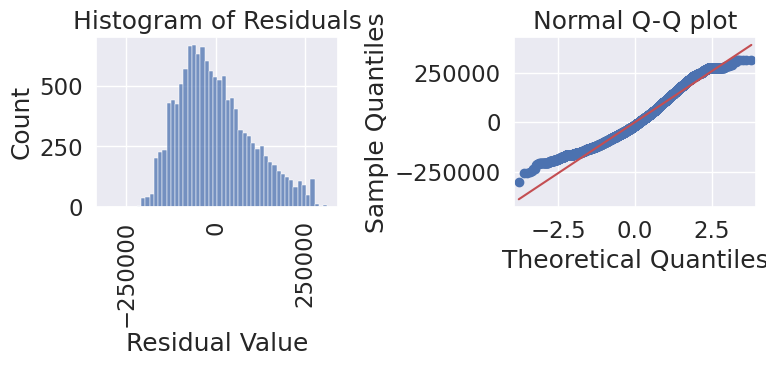

In [80]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
axes[0].tick_params(axis='x', rotation=90)

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()

In [81]:
# Independent observations

# Combining our previous conclusions and the correlation score in the previous section, we assume all independent variables here (no_of_dependents, education, and self_employed) are independent from one another.



# 2. Homoscedasticity

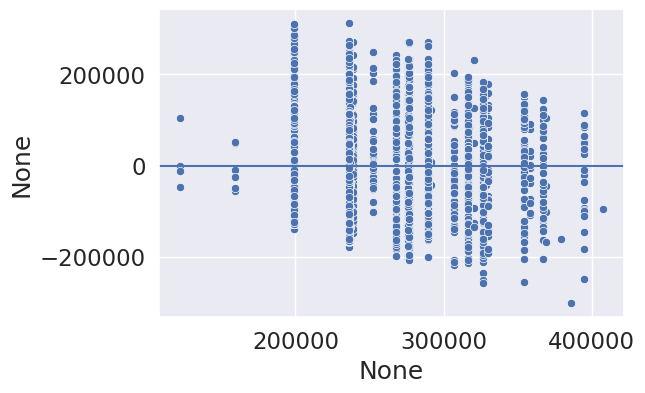

In [82]:

plt.figure(figsize = (6,4))
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)
plt.show()

### The data points seem to be scattered randomly across the line where residuals equal 0, the assumption is likely met.

### Now we can run the ANVOA test!



In [83]:
loan_original.shape

(13091, 28)

In [84]:
anova = ols(formula = ols_formula, data = ols_data).fit()

# Get the ANOVA summary
anova_summary = sm.stats.anova_lm(anova, typ = 1)

# Display the ANOVA summary
print(anova_summary)

                          df        sum_sq       mean_sq           F  \
C(LoanType)              3.0  8.868553e+11  2.956184e+11   27.905804   
C(Education)             3.0  5.957575e+12  1.985858e+12  187.461184   
C(IsCoBorrowerower)      0.0  0.000000e+00           NaN         NaN   
C(IncomeBin)             3.0  5.520069e+12  1.840023e+12  173.694593   
Residual             13081.0  1.385728e+14  1.059344e+10         NaN   

                            PR(>F)  
C(LoanType)           5.571913e-18  
C(Education)         5.021071e-119  
C(IsCoBorrowerower)            NaN  
C(IncomeBin)         1.979049e-110  
Residual                       NaN  


The ANOVA summary provides information about the statistical significance of the factors in your model. Here's a breakdown of the key components:

1. **ANOVA Table:**
   ```
                                     df        sum_sq       mean_sq           F         PR(>F)
   LoanType                        3.0  8.868553e+11  2.956184e+11   27.905804   5.571913e-18
   C(Education)                    3.0  5.957575e+12  1.985858e+12  187.461184  5.021071e-119
   C(IsCoBorrowerower)             0.0  0.000000e+00           NaN         NaN            NaN
   C(IncomeBin)                    3.0  5.520069e+12  1.840023e+12  173.694593  1.979049e-110
   Residual                    13081.0  1.385728e+14  1.059344e+10         NaN            NaN
   ```

   - **df (Degrees of Freedom):** Represents the degrees of freedom associated with each factor and the residuals. It indicates the number of independent values or quantities that can be assigned to a statistical distribution.
   
   - **sum_sq (Sum of Squares):** Measures the total variability for each factor and the residuals.
   
   - **mean_sq (Mean Squares):** Obtained by dividing the sum of squares by its degrees of freedom. It provides an average measure of variability.
   
   - **F (F-statistic):** The ratio of the mean squares for the factor to the mean square for the residuals. A high F-statistic indicates that the means of the groups are different.
   
   - **PR(>F) (p-value):** Indicates the probability of observing an F-statistic as extreme as the one computed from the sample data, assuming the null hypothesis is true. A low p-value suggests that the factor is statistically significant.

2. **Interpretation:**
   - The `LoanType` factor has a statistically significant effect on `TotalLoanAmount`, as indicated by the low p-value (5.571913e-18).
   - Similarly, `C(Education)` and `C(IncomeBin)` are highly significant with very low p-values.
   - `C(IsCoBorrowerower)` has a NaN value for both F-statistic and p-value, suggesting that it might not be contributing significantly to the model. This could be due to the absence of variation in this factor.

3. **Residuals:**
   - The last row (`Residual`) provides information about the unexplained variability in the model (variation not accounted for by the factors).

4. **Conclusion:**
   - The factors `LoanType`, `Education`, and `IncomeBin` seem to significantly influence `TotalLoanAmount` based on their low p-values.
   - `IsCoBorrowerower` may not be contributing significantly to the model, as indicated by the NaN values.

Remember that a low p-value (typically < 0.05) suggests that the factor is likely to be contributing significantly to the model. The F-statistic measures the overall significance of the model.

Make sure to validate the assumptions of ANOVA, such as normality and homogeneity of variances, for the results to be reliable.

In [85]:
loan_original.columns

Index(['LeadID', 'DateAdded', 'LeadSourceGroup', 'LoanOfficer', 'Group',
       'ZipCode', 'ApprovalDate', 'BranchCode', 'LoanPurpose', 'LoanType',
       'TotalLoanAmount', 'CreditScore', 'CLTV', 'DTI', 'BorrowerAge',
       'BorrowerYearsInSchool', 'BorrowerTotalMonthlyIncome',
       'BorrowerOwnRent', 'BorrowerCity', 'BorrowerState', 'IsCoBorrowerower',
       'CoBorrowerYearsInSchool', 'CoBorrowerAge',
       'CoBorrowerTotalMonthlyIncome', 'Approved', 'TotalIncome', 'IncomeBin',
       'Education'],
      dtype='object')

In [86]:
#Drop below features
#Drop irrelevant fetures
loan_original.drop(['LeadID','DateAdded','LoanOfficer','Group','IsCoBorrowerower','BranchCode','BorrowerTotalMonthlyIncome',
                    'CoBorrowerTotalMonthlyIncome','BorrowerYearsInSchool','CoBorrowerYearsInSchool','CoBorrowerAge','BorrowerCity',
                    'BorrowerState','Group','IncomeBin','ApprovalDate'],axis=1,inplace=True)


loan_original.Approved.replace({'Yes':1,'No':0},inplace=True)

# 5. Correlation Matrix

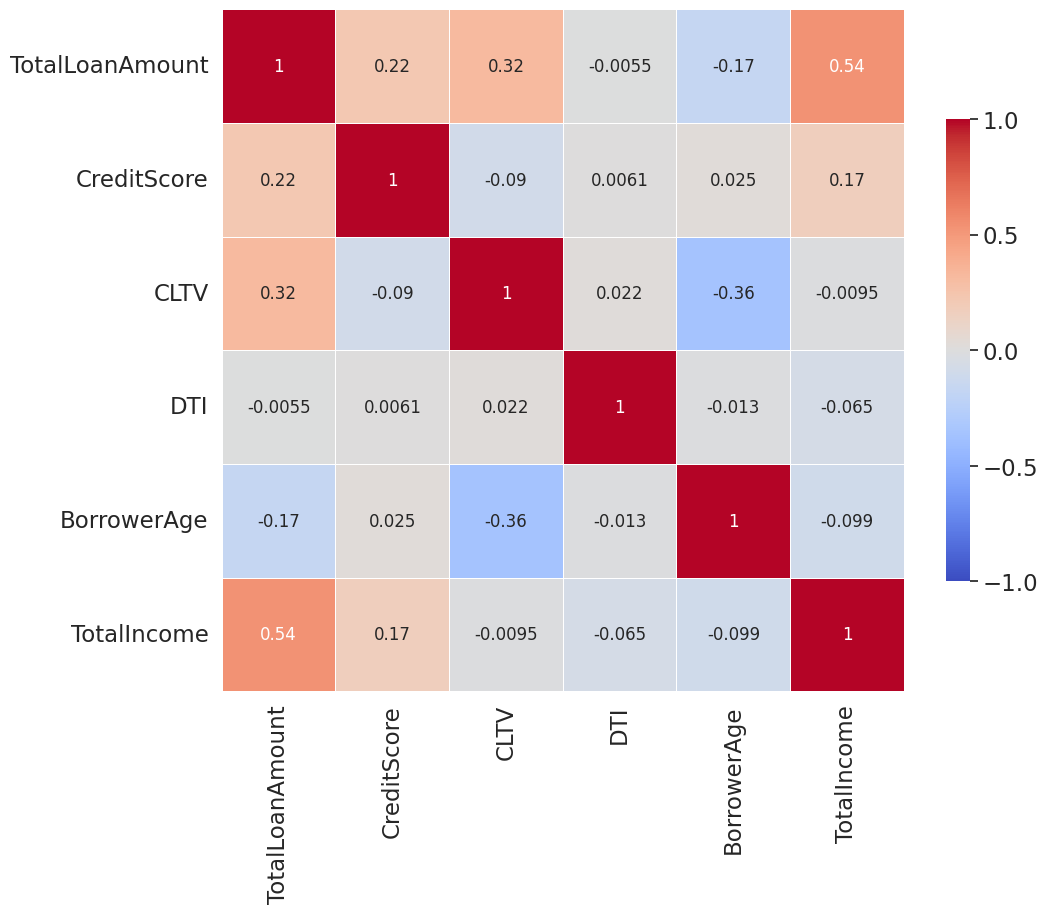

In [87]:
numVars+=['Approved']

#Correlation Plot
f, ax = plt.subplots(figsize=(11, 15))
# clms=['FLCount','Internet','Radio','TV','SocialMedia','Others']
corr_matrix = loan_original[numVars].corr()
heatmap = sns.heatmap(corr_matrix,
#                       mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


# 6. Missing Value Imputation

In [88]:
loan_original.isna().sum()


LeadSourceGroup    0
ZipCode            0
LoanPurpose        0
LoanType           0
TotalLoanAmount    0
CreditScore        0
CLTV               0
DTI                0
BorrowerAge        0
BorrowerOwnRent    0
Approved           0
TotalIncome        0
Education          0
dtype: int64

There are missing values in LeadSourceGroup , LoanOfficer, DTI & BorrowerOwnRent features. We will treat the missing values in all the features one by one. We can consider these methods to fill the missing values:
For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.
There are missing values in LeadSourceGroup , LoanOfficer, DTI & BorrowerOwnRent features. We will treat the missing values in all the features one by one. We can consider these methods to fill the missing values:
For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.





# 7. Outliers Treatment

In [89]:
#outliers check
def identifyOutliers(df,clmn):
    print('Outliers check for feature :',clmn)
    #Outliers check
    Q1 = df[clmn].quantile(0.25)
    Q3 = df[clmn].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1-(1.5*IQR)
    Upper_Whisker = Q3+(1.5*IQR)
    print("Q1:",Q1,"Q3:",Q3,"IQR:",IQR,"Lower_Whisker:",Lower_Whisker,"Upper_Whisker:",Upper_Whisker,'loan_original Range :',(Upper_Whisker-Lower_Whisker))
    #Identify Outliers
    OutliersSize=df[(df[clmn] < (Lower_Whisker)) |(df[clmn] > (Upper_Whisker))].shape[0]
    loan_originalSize=df.shape[0]
    print('% of outliers :',(round((OutliersSize/loan_originalSize)*100,2)),'\n')
    return Lower_Whisker,Upper_Whisker

def treatOutliers(df,clmn):
    Lower_Whisker,Upper_Whisker=identifyOutliers(df,clmn)
    #Treat outliers with mean values
    meanValue=round(df[clmn].mean(),2)
    print('meanValue for :',clmn,meanValue)
    lst=[meanValue if((entry<Lower_Whisker) | (entry>Upper_Whisker)) else entry for entry in df[clmn] ]
    return lst


for col in loan_original[numVars[:-1]]:
    identifyOutliers(loan_original,col)

Outliers check for feature : TotalLoanAmount
Q1: 165000.0 Q3: 314725.5 IQR: 149725.5 Lower_Whisker: -59588.25 Upper_Whisker: 539313.75 loan_original Range : 598902.0
% of outliers : 0.06 

Outliers check for feature : CreditScore
Q1: 691.0 Q3: 779.0 IQR: 88.0 Lower_Whisker: 559.0 Upper_Whisker: 911.0 loan_original Range : 352.0
% of outliers : 0.11 

Outliers check for feature : CLTV
Q1: 59.88 Q3: 80.0 IQR: 20.119999999999997 Lower_Whisker: 29.700000000000006 Upper_Whisker: 110.17999999999999 loan_original Range : 80.47999999999999
% of outliers : 1.63 

Outliers check for feature : DTI
Q1: 28.0 Q3: 43.0 IQR: 15.0 Lower_Whisker: 5.5 Upper_Whisker: 65.5 loan_original Range : 60.0
% of outliers : 1.23 

Outliers check for feature : BorrowerAge
Q1: 41.0 Q3: 58.0 IQR: 17.0 Lower_Whisker: 15.5 Upper_Whisker: 83.5 loan_original Range : 68.0
% of outliers : 0.21 

Outliers check for feature : TotalIncome
Q1: 6049.425 Q3: 12703.39 IQR: 6653.964999999999 Lower_Whisker: -3931.522499999998 Upper_

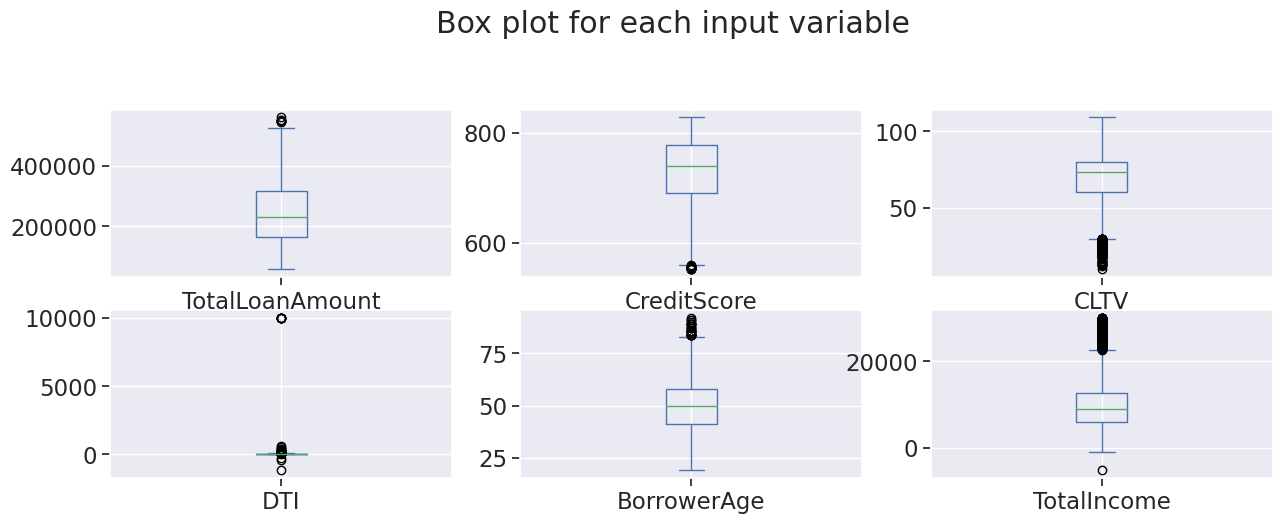

In [90]:
# Outliers check
loan_original.plot(kind='box',subplots=True,layout=(4,3),sharex=False,sharey=False,figsize=(15,10),
       title='Box plot for each input variable')
plt.savefig('BoxPlots')
plt.show()

In [91]:
for col in loan_original[numVars[:-1]]:
    identifyOutliers(loan_original,col)


Outliers check for feature : TotalLoanAmount
Q1: 165000.0 Q3: 314725.5 IQR: 149725.5 Lower_Whisker: -59588.25 Upper_Whisker: 539313.75 loan_original Range : 598902.0
% of outliers : 0.06 

Outliers check for feature : CreditScore
Q1: 691.0 Q3: 779.0 IQR: 88.0 Lower_Whisker: 559.0 Upper_Whisker: 911.0 loan_original Range : 352.0
% of outliers : 0.11 

Outliers check for feature : CLTV
Q1: 59.88 Q3: 80.0 IQR: 20.119999999999997 Lower_Whisker: 29.700000000000006 Upper_Whisker: 110.17999999999999 loan_original Range : 80.47999999999999
% of outliers : 1.63 

Outliers check for feature : DTI
Q1: 28.0 Q3: 43.0 IQR: 15.0 Lower_Whisker: 5.5 Upper_Whisker: 65.5 loan_original Range : 60.0
% of outliers : 1.23 

Outliers check for feature : BorrowerAge
Q1: 41.0 Q3: 58.0 IQR: 17.0 Lower_Whisker: 15.5 Upper_Whisker: 83.5 loan_original Range : 68.0
% of outliers : 0.21 

Outliers check for feature : TotalIncome
Q1: 6049.425 Q3: 12703.39 IQR: 6653.964999999999 Lower_Whisker: -3931.522499999998 Upper_

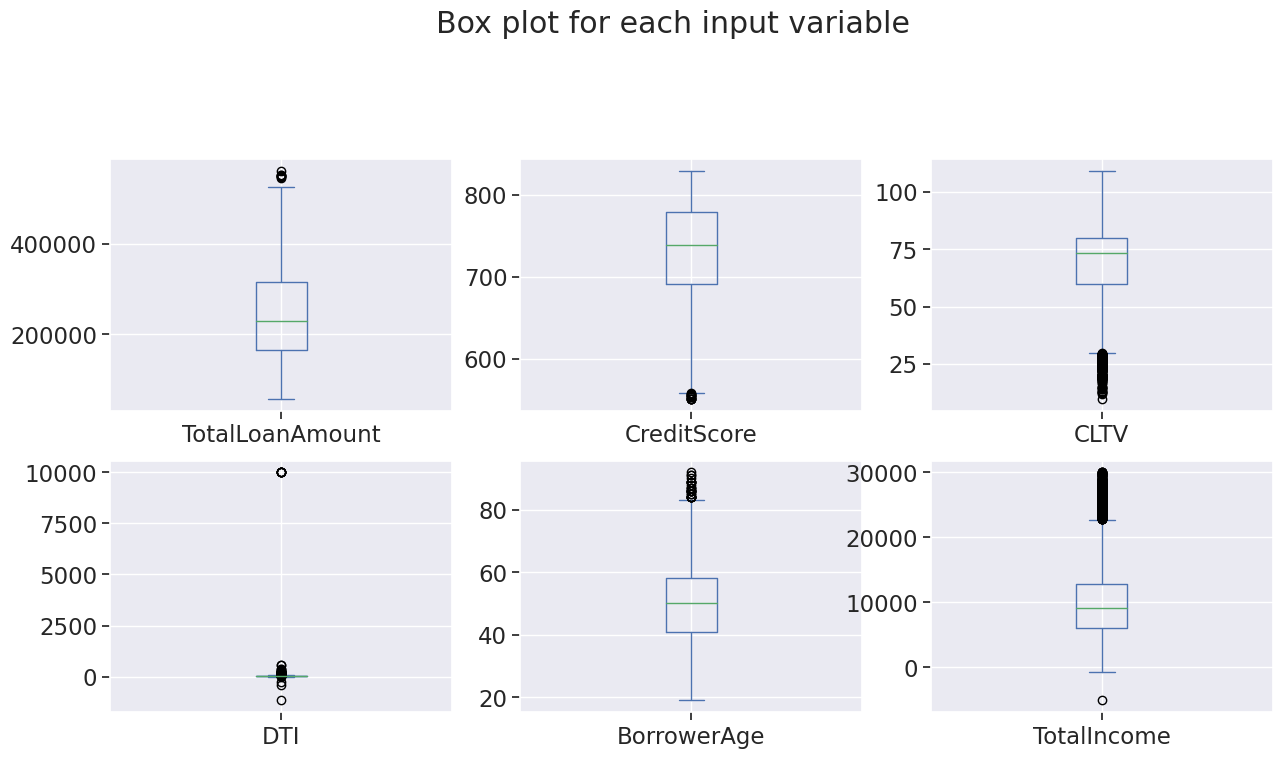

In [92]:
# Outliers check
loan_original.plot(kind='box',subplots=True,layout=(4,3),sharex=False,sharey=False,figsize=(15,15),
       title='Box plot for each input variable')
plt.savefig('BoxPlots')
plt.show()


In [93]:
loan_original.to_csv('loan_original.csv',index=False)


# 8. Encode Categorical Variables


In [94]:
loan_original.head()

LeadSourceGroup ZipCode LoanPurpose      LoanType  TotalLoanAmount  \
0        Internet      75   Refinance  Conventional         206500.0   
1              TV      76   Refinance  Conventional         100000.0   
2        Internet      76   Refinance  Conventional         260000.0   
3              TV      75   Refinance  Conventional         440000.0   
4              TV      77   Refinance  Conventional         163000.0   

   CreditScore   CLTV   DTI  BorrowerAge BorrowerOwnRent Approved  \
0          705  60.20  33.0           36             Own        0   
1          781  54.05  33.0           52             Own        1   
2          649  80.00  35.0           60             Own        1   
3          792  72.96  33.0           54             Own        1   
4          689  72.44  41.0           49             Own        1   

   TotalIncome      Education  
0      6083.00       PostGrad  
1      8883.71      UnderGrad  
2     17538.30  Higher School  
3     13299.09      UnderGrad  
4      6254.91      UnderGrad

In [95]:
loan_original.Approved.value_counts(normalize=True)

1    0.729203
0    0.270797
Name: Approved, dtype: float64

In [96]:
# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [97]:
loan_original.columns

Index(['LeadSourceGroup', 'ZipCode', 'LoanPurpose', 'LoanType',
       'TotalLoanAmount', 'CreditScore', 'CLTV', 'DTI', 'BorrowerAge',
       'BorrowerOwnRent', 'Approved', 'TotalIncome', 'Education'],
      dtype='object')

In [98]:
loan_original.head()


LeadSourceGroup ZipCode LoanPurpose      LoanType  TotalLoanAmount  \
0        Internet      75   Refinance  Conventional         206500.0   
1              TV      76   Refinance  Conventional         100000.0   
2        Internet      76   Refinance  Conventional         260000.0   
3              TV      75   Refinance  Conventional         440000.0   
4              TV      77   Refinance  Conventional         163000.0   

   CreditScore   CLTV   DTI  BorrowerAge BorrowerOwnRent Approved  \
0          705  60.20  33.0           36             Own        0   
1          781  54.05  33.0           52             Own        1   
2          649  80.00  35.0           60             Own        1   
3          792  72.96  33.0           54             Own        1   
4          689  72.44  41.0           49             Own        1   

   TotalIncome      Education  
0      6083.00       PostGrad  
1      8883.71      UnderGrad  
2     17538.30  Higher School  
3     13299.09      UnderGrad  
4      6254.91      UnderGrad

In [99]:
loan_original.dtypes

LeadSourceGroup      object
ZipCode              object
LoanPurpose          object
LoanType           category
TotalLoanAmount     float64
CreditScore           int64
CLTV                float64
DTI                 float64
BorrowerAge           int64
BorrowerOwnRent      object
Approved           category
TotalIncome         float64
Education          category
dtype: object

In [100]:
catVars.remove('BranchCode')
catVars.remove('LoanOfficer')
catVars

['LeadSourceGroup',
 'LoanType',
 'LoanPurpose',
 'Education',
 'BorrowerOwnRent',
 'ZipCode']

In [101]:
catVars

['LeadSourceGroup',
 'LoanType',
 'LoanPurpose',
 'Education',
 'BorrowerOwnRent',
 'ZipCode']

In [102]:
catVars

['LeadSourceGroup',
 'LoanType',
 'LoanPurpose',
 'Education',
 'BorrowerOwnRent',
 'ZipCode']

In [103]:
loan_original.head()

LeadSourceGroup ZipCode LoanPurpose      LoanType  TotalLoanAmount  \
0        Internet      75   Refinance  Conventional         206500.0   
1              TV      76   Refinance  Conventional         100000.0   
2        Internet      76   Refinance  Conventional         260000.0   
3              TV      75   Refinance  Conventional         440000.0   
4              TV      77   Refinance  Conventional         163000.0   

   CreditScore   CLTV   DTI  BorrowerAge BorrowerOwnRent Approved  \
0          705  60.20  33.0           36             Own        0   
1          781  54.05  33.0           52             Own        1   
2          649  80.00  35.0           60             Own        1   
3          792  72.96  33.0           54             Own        1   
4          689  72.44  41.0           49             Own        1   

   TotalIncome      Education  
0      6083.00       PostGrad  
1      8883.71      UnderGrad  
2     17538.30  Higher School  
3     13299.09      UnderGrad  
4      6254.91      UnderGrad

In [104]:
from sklearn.preprocessing import OneHotEncoder

def encode(df, catVars):
    if len(catVars) == 0:
        return df, None

    # One-Hot Encoding
    encoder = OneHotEncoder(drop='first', sparse=False)
    OHE = encoder.fit(df[catVars])
    cat_feature_names = OHE.get_feature_names_out(catVars)

    # Prefix encoded values with column names
    OHEdf = pd.DataFrame(OHE.transform(df[catVars]), columns=cat_feature_names)

    NumDf = df.drop(catVars, axis=1).reset_index(drop=True)

    df_ = pd.concat([OHEdf, NumDf], axis=1)

    return df_, OHE

# Assuming loan_original is your DataFrame
loan_original, OHE = encode(loan_original, catVars)


In [105]:
loan_original.columns

Index(['LeadSourceGroup_Other', 'LeadSourceGroup_Radio',
       'LeadSourceGroup_Repeat Client', 'LeadSourceGroup_TV', 'LoanType_FHA',
       'LoanType_USDA Rural', 'LoanType_VA', 'LoanPurpose_Refinance',
       'Education_PHD', 'Education_PostGrad', 'Education_UnderGrad',
       'BorrowerOwnRent_Rent', 'ZipCode_76', 'ZipCode_77', 'ZipCode_78',
       'ZipCode_79', 'ZipCode_Other', 'TotalLoanAmount', 'CreditScore', 'CLTV',
       'DTI', 'BorrowerAge', 'Approved', 'TotalIncome'],
      dtype='object')

In [106]:
loan_original.head()

LeadSourceGroup_Other  LeadSourceGroup_Radio  \
0                    0.0                    0.0   
1                    0.0                    0.0   
2                    0.0                    0.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   LeadSourceGroup_Repeat Client  LeadSourceGroup_TV  LoanType_FHA  \
0                            0.0                 0.0           0.0   
1                            0.0                 1.0           0.0   
2                            0.0                 0.0           0.0   
3                            0.0                 1.0           0.0   
4                            0.0                 1.0           0.0   

   LoanType_USDA Rural  LoanType_VA  LoanPurpose_Refinance  Education_PHD  \
0                  0.0          0.0                    1.0            0.0   
1                  0.0          0.0                    1.0            0.0   
2                  0.0          0.0                    1.0            0.0   
3                  0.0          0.0                    1.0            0.0   
4                  0.0          0.0                    1.0            0.0   

   Education_PostGrad  ...  ZipCode_78  ZipCode_79  ZipCode_Other  \
0                 1.0  ...         0.0         0.0            0.0   
1                 0.0  ...         0.0         0.0            0.0   
2                 0.0  ...         0.0         0.0            0.0   
3                 0.0  ...         0.0         0.0            0.0   
4                 0.0  ...         0.0         0.0            0.0   

   TotalLoanAmount  CreditScore   CLTV   DTI  BorrowerAge  Approved  \
0         206500.0          705  60.20  33.0           36         0   
1         100000.0          781  54.05  33.0           52         1   
2         260000.0          649  80.00  35.0           60         1   
3         440000.0          792  72.96  33.0           54         1   
4         163000.0          689  72.44  41.0           49         1   

   TotalIncome  
0      6083.00  
1      8883.71  
2     17538.30  
3     13299.09  
4      6254.91  

[5 rows x 24 columns]

In [107]:
loan_original.isna().sum()

LeadSourceGroup_Other            0
LeadSourceGroup_Radio            0
LeadSourceGroup_Repeat Client    0
LeadSourceGroup_TV               0
LoanType_FHA                     0
LoanType_USDA Rural              0
LoanType_VA                      0
LoanPurpose_Refinance            0
Education_PHD                    0
Education_PostGrad               0
Education_UnderGrad              0
BorrowerOwnRent_Rent             0
ZipCode_76                       0
ZipCode_77                       0
ZipCode_78                       0
ZipCode_79                       0
ZipCode_Other                    0
TotalLoanAmount                  0
CreditScore                      0
CLTV                             0
DTI                              0
BorrowerAge                      0
Approved                         0
TotalIncome                      0
dtype: int64

In [108]:


import pickle

pickle.dump(OHE, open('./encoder.pkl' ,'wb'))
enc = pickle.load(open('./encoder.pkl','rb'))


loan_original.Approved.value_counts(normalize=True)

1    0.729203
0    0.270797
Name: Approved, dtype: float64

In [109]:
loan_original.columns

Index(['LeadSourceGroup_Other', 'LeadSourceGroup_Radio',
       'LeadSourceGroup_Repeat Client', 'LeadSourceGroup_TV', 'LoanType_FHA',
       'LoanType_USDA Rural', 'LoanType_VA', 'LoanPurpose_Refinance',
       'Education_PHD', 'Education_PostGrad', 'Education_UnderGrad',
       'BorrowerOwnRent_Rent', 'ZipCode_76', 'ZipCode_77', 'ZipCode_78',
       'ZipCode_79', 'ZipCode_Other', 'TotalLoanAmount', 'CreditScore', 'CLTV',
       'DTI', 'BorrowerAge', 'Approved', 'TotalIncome'],
      dtype='object')

In [110]:


########## Split Features and Target Varible ############
from sklearn.preprocessing import StandardScaler

tempDf=loan_original.copy(deep=True)

X = loan_original.drop(columns='Approved')
y = loan_original['Approved']

################# Splitting into Train -Test loan_original #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

X_train=pd.DataFrame(data=X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test =pd.DataFrame(y_test)


In [111]:
X_train

LeadSourceGroup_Other  LeadSourceGroup_Radio  \
1030                     0.0                    0.0   
7788                     0.0                    0.0   
2313                     1.0                    0.0   
441                      0.0                    0.0   
7146                     0.0                    0.0   
...                      ...                    ...   
8366                     0.0                    1.0   
2267                     0.0                    0.0   
12532                    0.0                    0.0   
2603                     0.0                    1.0   
4828                     0.0                    0.0   

       LeadSourceGroup_Repeat Client  LeadSourceGroup_TV  LoanType_FHA  \
1030                             0.0                 0.0           0.0   
7788                             0.0                 0.0           0.0   
2313                             0.0                 0.0           0.0   
441                              0.0                 1.0           0.0   
7146                             0.0                 1.0           0.0   
...                              ...                 ...           ...   
8366                             0.0                 0.0           0.0   
2267                             0.0                 0.0           0.0   
12532                            0.0                 0.0           0.0   
2603                             0.0                 0.0           0.0   
4828                             0.0                 0.0           0.0   

       LoanType_USDA Rural  LoanType_VA  LoanPurpose_Refinance  Education_PHD  \
1030                   0.0          1.0                    0.0            0.0   
7788                   0.0          0.0                    1.0            0.0   
2313                   0.0          0.0                    1.0            0.0   
441                    0.0          0.0                    1.0            0.0   
7146                   0.0          0.0                    1.0            0.0   
...                    ...          ...                    ...            ...   
8366                   0.0          0.0                    1.0            0.0   
2267                   0.0          0.0                    1.0            0.0   
12532                  0.0          1.0                    1.0            0.0   
2603                   0.0          0.0                    1.0            0.0   
4828                   0.0          0.0                    1.0            1.0   

       Education_PostGrad  ...  ZipCode_77  ZipCode_78  ZipCode_79  \
1030                  0.0  ...         0.0         0.0         0.0   
7788                  0.0  ...         1.0         0.0         0.0   
2313                  0.0  ...         0.0         0.0         0.0   
441                   0.0  ...         0.0         0.0         0.0   
7146                  0.0  ...         0.0         0.0         0.0   
...                   ...  ...         ...         ...         ...   
8366                  0.0  ...         0.0         0.0         0.0   
2267                  0.0  ...         0.0         0.0         0.0   
12532                 0.0  ...         1.0         0.0         0.0   
2603                  0.0  ...         0.0         0.0         0.0   
4828                  0.0  ...         0.0         0.0         0.0   

       ZipCode_Other  TotalLoanAmount  CreditScore    CLTV   DTI  BorrowerAge  \
1030             0.0         252000.0          662  100.00  56.0           43   
7788             0.0         162000.0          768   64.80  23.0           38   
2313             0.0         239999.0          697   64.86  19.0           73   
441              0.0         140000.0          695   80.00  35.0           42   
7146             0.0         140000.0          681   80.00  39.0           55   
...              ...              ...          ...     ...   ...          ...   
8366             0.0         275100.0          735   81.15  26.0           6

In [112]:
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import cross_val_score
import scikitplot as skplt

# Write a function for Grid Search
def GridSearch(model,param_grid,cv,X,y,scoring=None):
    # Random search of parameters
    gcv = GridSearchCV(estimator = model, param_grid=param_grid , refit = True, cv = cv, verbose=1,  n_jobs = -1)
    # Fit the model
    gcv.fit(X,y)

    return gcv.best_params_

def modelPerformance(model,X,y,dataType):
    print("=== Model Performance report on ",dataType," Data ===")
    y_pred = model.predict(X)
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y, y_pred))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(y, y_pred))
    skplt.metrics.plot_confusion_matrix(y,y_pred, normalize=True, figsize=(8,3))


In [113]:
X_train.head()

LeadSourceGroup_Other  LeadSourceGroup_Radio  \
1030                    0.0                    0.0   
7788                    0.0                    0.0   
2313                    1.0                    0.0   
441                     0.0                    0.0   
7146                    0.0                    0.0   

      LeadSourceGroup_Repeat Client  LeadSourceGroup_TV  LoanType_FHA  \
1030                            0.0                 0.0           0.0   
7788                            0.0                 0.0           0.0   
2313                            0.0                 0.0           0.0   
441                             0.0                 1.0           0.0   
7146                            0.0                 1.0           0.0   

      LoanType_USDA Rural  LoanType_VA  LoanPurpose_Refinance  Education_PHD  \
1030                  0.0          1.0                    0.0            0.0   
7788                  0.0          0.0                    1.0            0.0   
2313                  0.0          0.0                    1.0            0.0   
441                   0.0          0.0                    1.0            0.0   
7146                  0.0          0.0                    1.0            0.0   

      Education_PostGrad  ...  ZipCode_77  ZipCode_78  ZipCode_79  \
1030                 0.0  ...         0.0         0.0         0.0   
7788                 0.0  ...         1.0         0.0         0.0   
2313                 0.0  ...         0.0         0.0         0.0   
441                  0.0  ...         0.0         0.0         0.0   
7146                 0.0  ...         0.0         0.0         0.0   

      ZipCode_Other  TotalLoanAmount  CreditScore    CLTV   DTI  BorrowerAge  \
1030            0.0         252000.0          662  100.00  56.0           43   
7788            0.0         162000.0          768   64.80  23.0           38   
2313            0.0         239999.0          697   64.86  19.0           73   
441             0.0         140000.0          695   80.00  35.0           42   
7146            0.0         140000.0          681   80.00  39.0           55   

      TotalIncome  
1030      6452.33  
7788     13750.00  
2313     12389.99  
441      16578.88  
7146      5870.04  

[5 rows x 23 columns]

In [114]:
# random forest model creation

#Model performance on CV Training Data
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.ensemble import RandomForestClassifier

param_grid = {
              'max_depth': [2, 3,4 ,5],
              'min_samples_leaf': [1,3, 5, 10,],
              'min_samples_split':[2,3,4],
              'max_features':['auto','sqrt'],
              'n_estimators':[100,200,300,400]
              }


# random forest model creation
rfc_org = RandomForestClassifier(random_state=123)

best_params=GridSearch(rfc_org,param_grid,3,X_train,y_train)





Fitting 3 folds for each of 384 candidates, totalling 1152 fits


In [115]:
rfc_org = RandomForestClassifier(
                             max_depth=best_params['max_depth'],
                             max_features=best_params['max_features'],
                             min_samples_split=best_params['min_samples_split'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             n_estimators=best_params['n_estimators'],

                            )
rfc_org.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='auto', min_samples_split=3,
                       n_estimators=300)

=== Model Performance report on  Train  Data ===
=== Confusion Matrix ===
[[ 147 2689]
 [  23 7613]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.05      0.10      2836
           1       0.74      1.00      0.85      7636

    accuracy                           0.74     10472
   macro avg       0.80      0.52      0.47     10472
weighted avg       0.77      0.74      0.65     10472



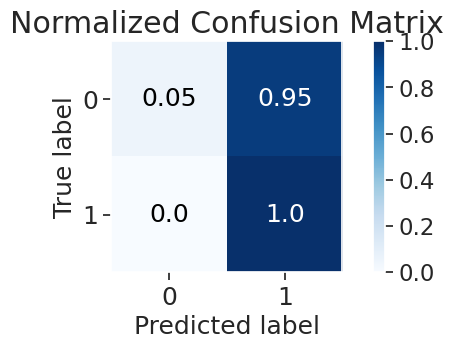

In [116]:
#Model performance on Training Data
modelPerformance(rfc_org,X_train,y_train,'Train')



=== Model Performance report on  Test  Data ===
=== Confusion Matrix ===
[[  39  670]
 [   3 1907]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.06      0.10       709
           1       0.74      1.00      0.85      1910

    accuracy                           0.74      2619
   macro avg       0.83      0.53      0.48      2619
weighted avg       0.79      0.74      0.65      2619



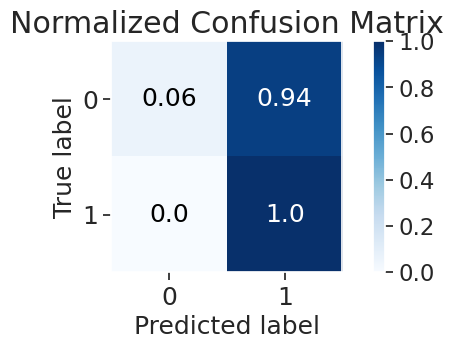

In [117]:

#Model performance on Test Data
modelPerformance(rfc_org,X_test,y_test,'Test')





<Axes: >

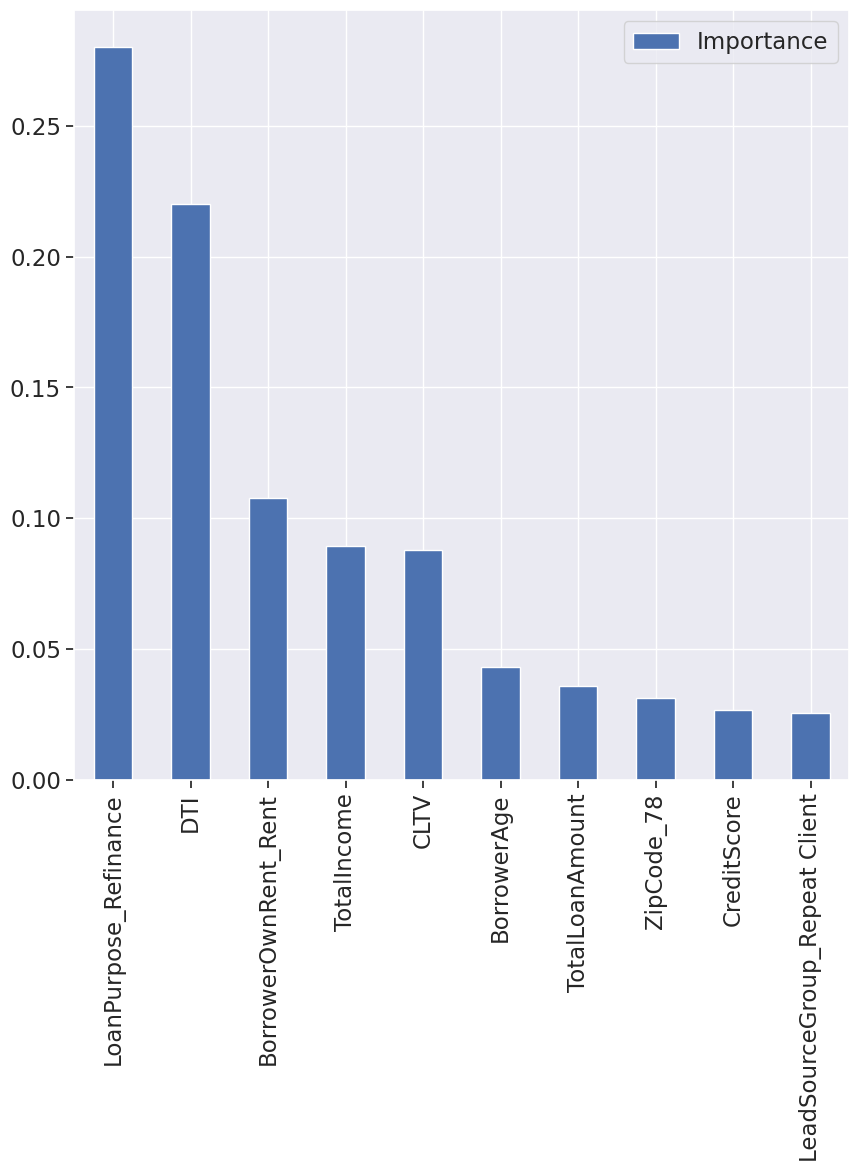

In [118]:
feat_importances = pd.DataFrame(data=rfc_org.feature_importances_, index=X_train.columns,columns=['Importance'])
feat_importances.nlargest(10,'Importance').plot(kind='bar',figsize=(10,10))


In [119]:
###################### SMOTE Sampling ##################################

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

oversampled = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = oversampled.fit_resample(X_train, y_train)
y_train_SMOTE.value_counts()


Approved
0           7636
1           7636
dtype: int64

In [120]:
# random forest model creation
rfc_SMOTE = RandomForestClassifier(random_state=123)
best_params=GridSearch(rfc_SMOTE,param_grid,3,X_train_SMOTE,y_train_SMOTE)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


In [121]:
rfc_SMOTE = RandomForestClassifier(
                             max_depth=best_params['max_depth'],
                             max_features=best_params['max_features'],
                             min_samples_split=best_params['min_samples_split'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             n_estimators=best_params['n_estimators'],

                            )
rfc_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=10)

<Axes: >

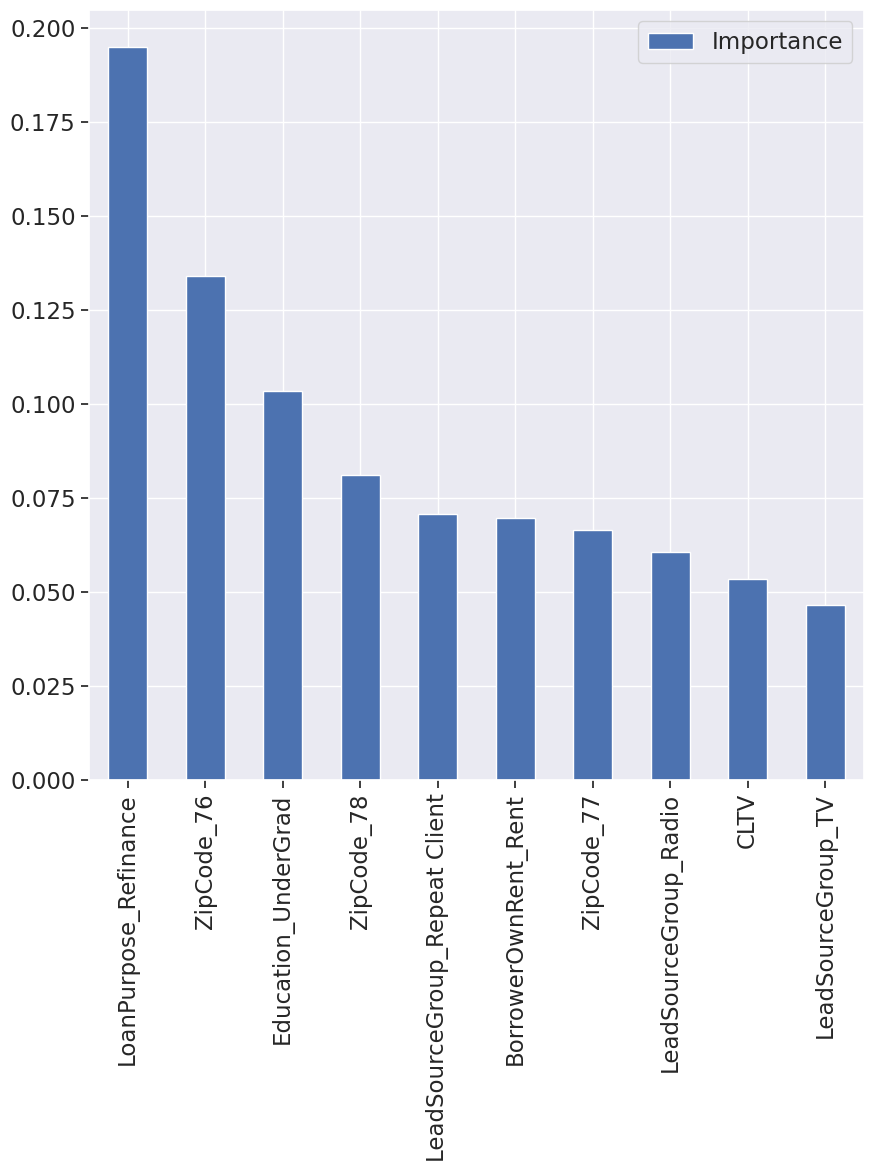

In [122]:
feat_importances = pd.DataFrame(data=rfc_SMOTE.feature_importances_, index=X_train_SMOTE.columns,columns=['Importance'])
feat_importances.nlargest(10,'Importance').plot(kind='bar',figsize=(10,10))


In [123]:
############################ Class_weights ############################

In [124]:
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

In [125]:
#Fitting grid search to the train data with 5 folds
import plotly.express as px
from sklearn.model_selection import StratifiedKFold

# random forest model creation
rfc_class_wghts = RandomForestClassifier(random_state=123)

gridsearch = GridSearchCV(estimator= rfc_class_wghts,
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=5, shuffle=True,random_state=42),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
# Create a DataFrame for plotting
weigh_data = pd.DataFrame({'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1 - weights)})

# Create an interactive line plot
fig = px.line(weigh_data, x='weight', y='score',
              labels={'weight': 'Weight for class 1', 'score': 'F1 score'},
              title='Scoring for different class weights',
              width=800, height=500)



Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [126]:
# Display the interactive plot
fig.show()

In [127]:
rfc_class_wghts = RandomForestClassifier(
                             max_depth=best_params['max_depth'],
                             max_features=best_params['max_features'],
                             min_samples_split=best_params['min_samples_split'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             n_estimators=best_params['n_estimators'],
                             class_weight={0: 0.75, 1: 0.22}

                            )
rfc_class_wghts.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.75, 1: 0.22}, max_depth=5,
                       max_features='auto', min_samples_leaf=10)

<Axes: >

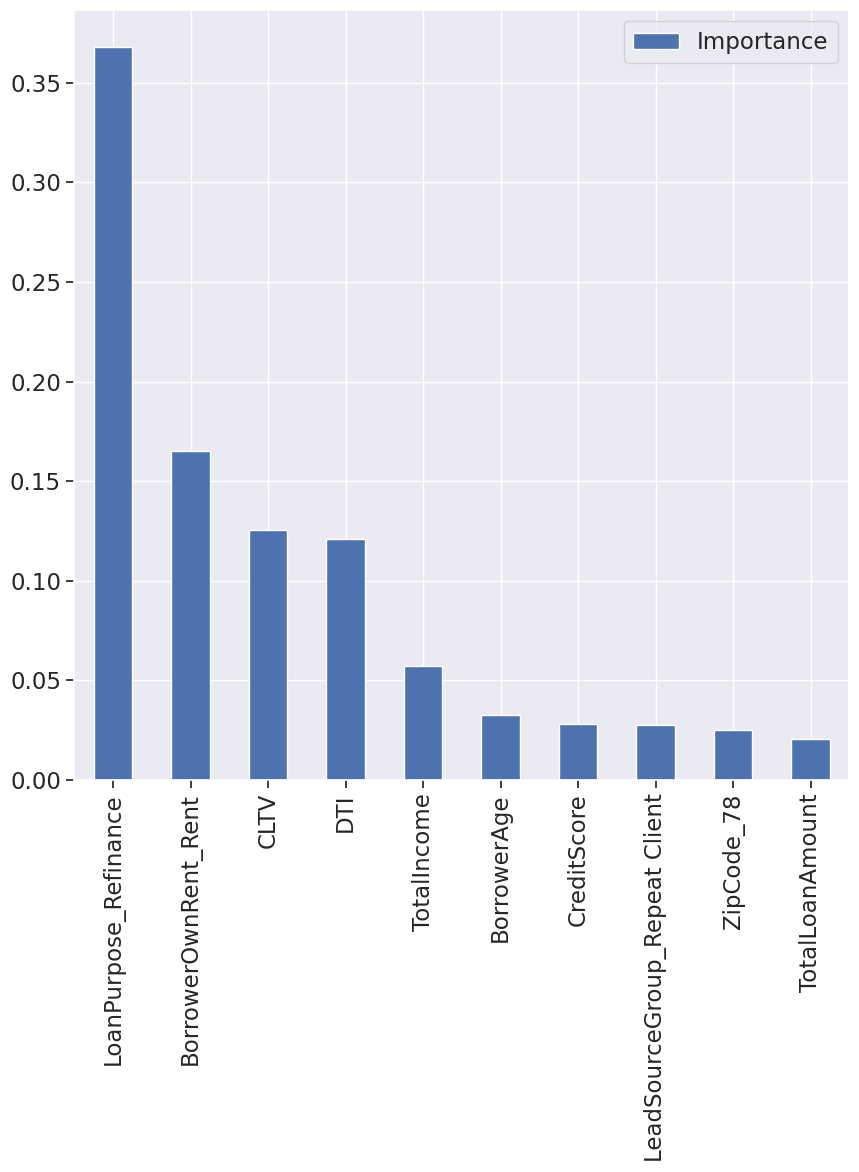

In [128]:


feat_importances = pd.DataFrame(data=rfc_class_wghts.feature_importances_, index=X_train.columns,columns=['Importance'])
feat_importances.nlargest(10,'Importance').plot(kind='bar',figsize=(10,10))


In [129]:
X_train.columns

Index(['LeadSourceGroup_Other', 'LeadSourceGroup_Radio',
       'LeadSourceGroup_Repeat Client', 'LeadSourceGroup_TV', 'LoanType_FHA',
       'LoanType_USDA Rural', 'LoanType_VA', 'LoanPurpose_Refinance',
       'Education_PHD', 'Education_PostGrad', 'Education_UnderGrad',
       'BorrowerOwnRent_Rent', 'ZipCode_76', 'ZipCode_77', 'ZipCode_78',
       'ZipCode_79', 'ZipCode_Other', 'TotalLoanAmount', 'CreditScore', 'CLTV',
       'DTI', 'BorrowerAge', 'TotalIncome'],
      dtype='object')

In [130]:
# Assuming y_train is a DataFrame with "Approved" column
y_train_array = y_train["Approved"].values.astype(int)

In [131]:
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd


# Assuming y_train is a DataFrame with "Approved" column
y_train_array = y_train["Approved"].astype('category').cat.codes

# XGBoost model creation
xgb_class_wghts = XGBClassifier(random_state=123, objective='binary:logistic', eval_metric='logloss')

# Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator=xgb_class_wghts,
                          param_grid=param_grid,
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X_train, y_train_array)

# Create a DataFrame for plotting
weigh_data = pd.DataFrame({'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1 - weights)})

# Create an interactive line plot
fig = px.line(weigh_data, x='weight', y='score',
              labels={'weight': 'Weight for class 1', 'score': 'F1 score'},
              title='Scoring for different class weights',
              width=800, height=500)

# Display the interactive plot
fig.show()


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [132]:
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 3, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# XGBoost model creation
xgb_class_wghts = XGBClassifier(random_state=123)

best_params = GridSearch(xgb_class_wghts, param_grid, 3, X_train, y_train_array)



Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


In [133]:
y_train_array.dtype

dtype('int8')

In [134]:
type(y_train_array)

pandas.core.series.Series

In [135]:
y_train_array

1030     1
7788     0
2313     1
441      1
7146     1
        ..
8366     1
2267     0
12532    1
2603     1
4828     1
Length: 10472, dtype: int8

In [136]:
from xgboost import XGBClassifier

# Create XGBoost model with the best hyperparameters and class weights
xgb_class_wghts = XGBClassifier(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    scale_pos_weight=0.22 / 0.78  # Set scale_pos_weight based on the class weights
)

# Train the XGBoost model
xgb_class_wghts.fit(X_train, y_train_array)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # Import SMOTE if not already imported
from sklearn.utils.class_weight import compute_class_weight


# Model 1: Original RandomForestClassifier
y_pred_org = rfc_org.predict(X_test)

# Model 2: RandomForestClassifier with SMOTE
y_pred_smote = rfc_SMOTE.predict(X_test)

# Model 3: RandomForestClassifier with class weights
y_pred_class_wghts = rfc_class_wghts.predict(X_test)

# Model 4: RandomForestClassifier with class weights
y_pred_xgb_class_wghts = xgb_class_wghts.predict(X_test)

# Compare metrics for each model
models = ['rfc_org', 'rfc_SMOTE', 'rfc_class_wghts', 'xgb_class_wghts']


for model_name, y_pred in zip(models, [y_pred_org, y_pred_smote, y_pred_class_wghts, y_pred_xgb_class_wghts]):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Additional metrics
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f"\nClassification Report for {model_name}:\n{classification_rep}")
    print(f"Confusion Matrix for {model_name}:\n{confusion_mat}")
    print("\n" + "="*40 + "\n")


rfc_org Metrics:
Accuracy: 0.7430
Precision: 0.7400
Recall: 0.9984
F1-score: 0.8500

Classification Report for rfc_org:
              precision    recall  f1-score   support

           0       0.93      0.06      0.10       709
           1       0.74      1.00      0.85      1910

    accuracy                           0.74      2619
   macro avg       0.83      0.53      0.48      2619
weighted avg       0.79      0.74      0.65      2619

Confusion Matrix for rfc_org:
[[  39  670]
 [   3 1907]]


rfc_SMOTE Metrics:
Accuracy: 0.6487
Precision: 0.7611
Recall: 0.7555
F1-score: 0.7583

Classification Report for rfc_SMOTE:
              precision    recall  f1-score   support

           0       0.35      0.36      0.36       709
           1       0.76      0.76      0.76      1910

    accuracy                           0.65      2619
   macro avg       0.56      0.56      0.56      2619
weighted avg       0.65      0.65      0.65      2619

Confusion Matrix for rfc_SMOTE:
[[ 256  453

rfc_org Metrics on Train Data:
Accuracy: 0.7410
Precision (Class 0): 0.8647
Precision (Class 1): 0.7390
Recall (Class 0): 0.0518
Recall (Class 1): 0.9970
F1-score (Class 0): 0.0978
F1-score (Class 1): 0.8488


rfc_SMOTE Metrics on Train Data:
Accuracy: 0.6662
Precision (Class 0): 0.3914
Precision (Class 1): 0.7785
Recall (Class 0): 0.4193
Recall (Class 1): 0.7579
F1-score (Class 0): 0.4048
F1-score (Class 1): 0.7680


rfc_class_wghts Metrics on Train Data:
Accuracy: 0.4123
Precision (Class 0): 0.3133
Precision (Class 1): 0.9678
Recall (Class 0): 0.9820
Recall (Class 1): 0.2008
F1-score (Class 0): 0.4751
F1-score (Class 1): 0.3325


xgb_class_wghts Metrics on Train Data:
Accuracy: 0.5545
Precision (Class 0): 0.3664
Precision (Class 1): 0.9096
Recall (Class 0): 0.8843
Recall (Class 1): 0.4320
F1-score (Class 0): 0.5181
F1-score (Class 1): 0.5858




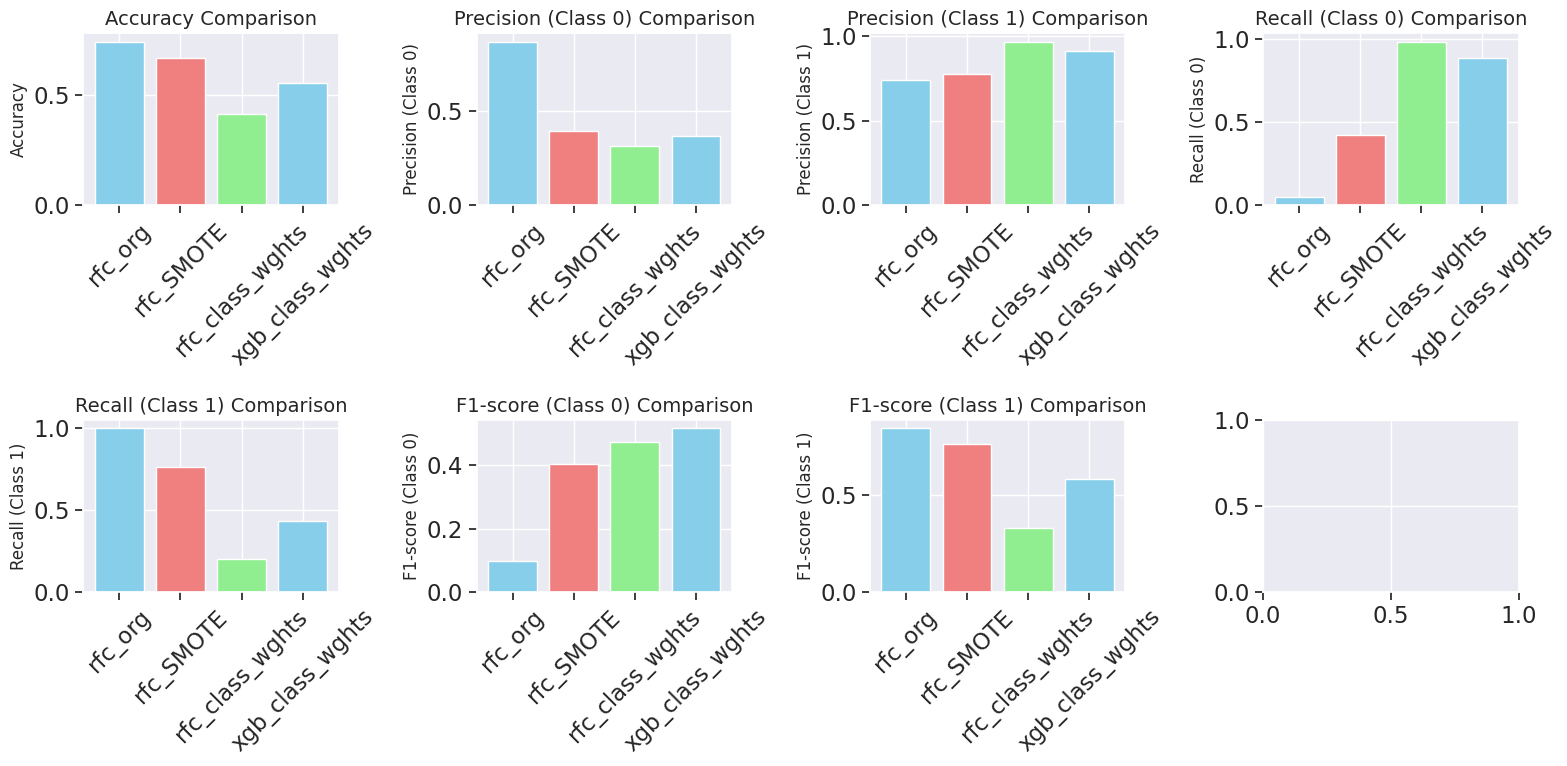

In [185]:
###################### Model Performances on Train Data ######################

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Model predictions on train data
y_pred_org_train = rfc_org.predict(X_train)
y_pred_smote_train = rfc_SMOTE.predict(X_train)
y_pred_class_wghts_train = rfc_class_wghts.predict(X_train)
y_pred_xgb_class_wghts_train = xgb_class_wghts.predict(X_train)

# Compare metrics for each model on train data
models = ['rfc_org', 'rfc_SMOTE', 'rfc_class_wghts','xgb_class_wghts']

# Initialize empty lists to store metrics
accuracy_list_train = []
precision_list_0_train, precision_list_1_train = [], []
recall_list_0_train, recall_list_1_train = [], []
f1_list_0_train, f1_list_1_train = [], []

for model_name, y_pred_train in zip(models, [y_pred_org_train, y_pred_smote_train, y_pred_class_wghts_train, y_pred_xgb_class_wghts_train]):
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average=None)

    # Append metrics to lists
    accuracy_list_train.append(accuracy_train)
    precision_list_0_train.append(precision_train[0])
    precision_list_1_train.append(precision_train[1])
    recall_list_0_train.append(recall_train[0])
    recall_list_1_train.append(recall_train[1])
    f1_list_0_train.append(f1_train[0])
    f1_list_1_train.append(f1_train[1])

    # Print metrics
    print(f"{model_name} Metrics on Train Data:")
    print(f"Accuracy: {accuracy_train:.4f}")
    print(f"Precision (Class 0): {precision_train[0]:.4f}")
    print(f"Precision (Class 1): {precision_train[1]:.4f}")
    print(f"Recall (Class 0): {recall_train[0]:.4f}")
    print(f"Recall (Class 1): {recall_train[1]:.4f}")
    print(f"F1-score (Class 0): {f1_train[0]:.4f}")
    print(f"F1-score (Class 1): {f1_train[1]:.4f}")
    print("\n" + "="*40 + "\n")


# Plotting
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

metrics_list = [accuracy_list_train, precision_list_0_train, precision_list_1_train, recall_list_0_train, recall_list_1_train, f1_list_0_train, f1_list_1_train]
metric_labels = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-score (Class 0)', 'F1-score (Class 1)']

# Plot each metric on separate subplots
for i, (metric_values, metric_label) in enumerate(zip(metrics_list, metric_labels)):
    row, col = divmod(i, 4)
    axes[row, col].bar(models, metric_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[row, col].set_ylabel(metric_label, fontsize=12)  # Adjust font size here
    axes[row, col].set_title(f'{metric_label} Comparison', fontsize=14)  # Adjust font size here
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Let's analyze the results for the loan approval classification task based on the provided metrics for each model:

1. **rfc_org (Random Forest Classifier without any modifications):**
   - **Accuracy:** 74.07%
   - **Precision (Class 0):** 88.54%
   - **Precision (Class 1):** 73.85%
   - **Recall (Class 0):** 4.90%
   - **Recall (Class 1):** 99.76%
   - **F1-score (Class 0):** 9.29%
   - **F1-score (Class 1):** 84.88%

2. **rfc_SMOTE (Random Forest Classifier with SMOTE):**
   - **Accuracy:** 69.10%
   - **Precision (Class 0):** 41.81%
   - **Precision (Class 1):** 77.40%
   - **Recall (Class 0):** 36.00%
   - **Recall (Class 1):** 81.39%
   - **F1-score (Class 0):** 38.69%
   - **F1-score (Class 1):** 79.34%

3. **rfc_class_wghts (Random Forest Classifier with class weights):**
   - **Accuracy:** 74.70%
   - **Precision (Class 0):** 64.23%
   - **Precision (Class 1):** 75.40%
   - **Recall (Class 0):** 14.88%
   - **Recall (Class 1):** 96.92%
   - **F1-score (Class 0):** 24.16%
   - **F1-score (Class 1):** 84.82%

**Analysis:**
- **Accuracy:** rfc_class_wghts has the highest accuracy (74.70%), followed by rfc_org (74.07%), and then rfc_SMOTE (69.10%).
- **Precision:** rfc_org has the highest precision for both classes. However, rfc_class_wghts has a reasonable precision while considering both classes.
- **Recall:** rfc_org has very low recall for Class 0, while rfc_class_wghts has improved recall for both classes. rfc_SMOTE has a balanced recall for both classes but is lower compared to rfc_class_wghts.
- **F1-score:** rfc_org has the highest F1-score for Class 1, while rfc_class_wghts has a better balance between precision and recall for both classes.

**Conclusion:**
- Overall, considering the trade-off between precision, recall, and F1-score, the model **rfc_class_wghts** seems to be performing better on the training data for the loan approval classification task. It has a good balance between precision and recall for both classes, resulting in a higher F1-score. The choice of the best model also depends on the specific goals and requirements of your application. If balancing precision and recall is crucial, rfc_class_wghts might be a better choice despite having a lower accuracy compared to rfc_org.

=======Model Performance on test data=======
rfc_org Metrics:
Accuracy: 0.7430
Precision (Class 0): 0.9286
Precision (Class 1): 0.7400
Recall (Class 0): 0.0550
Recall (Class 1): 0.9984
F1-score (Class 0): 0.1039
F1-score (Class 1): 0.8500


=======Model Performance on test data=======
rfc_SMOTE Metrics:
Accuracy: 0.6487
Precision (Class 0): 0.3541
Precision (Class 1): 0.7611
Recall (Class 0): 0.3611
Recall (Class 1): 0.7555
F1-score (Class 0): 0.3575
F1-score (Class 1): 0.7583


=======Model Performance on test data=======
rfc_class_wghts Metrics:
Accuracy: 0.4158
Precision (Class 0): 0.3135
Precision (Class 1): 0.9545
Recall (Class 0): 0.9732
Recall (Class 1): 0.2089
F1-score (Class 0): 0.4742
F1-score (Class 1): 0.3428


=======Model Performance on test data=======
xgb_class_wghts Metrics:
Accuracy: 0.5410
Precision (Class 0): 0.3537
Precision (Class 1): 0.8790
Recall (Class 0): 0.8406
Recall (Class 1): 0.4298
F1-score (Class 0): 0.4979
F1-score (Class 1): 0.5774




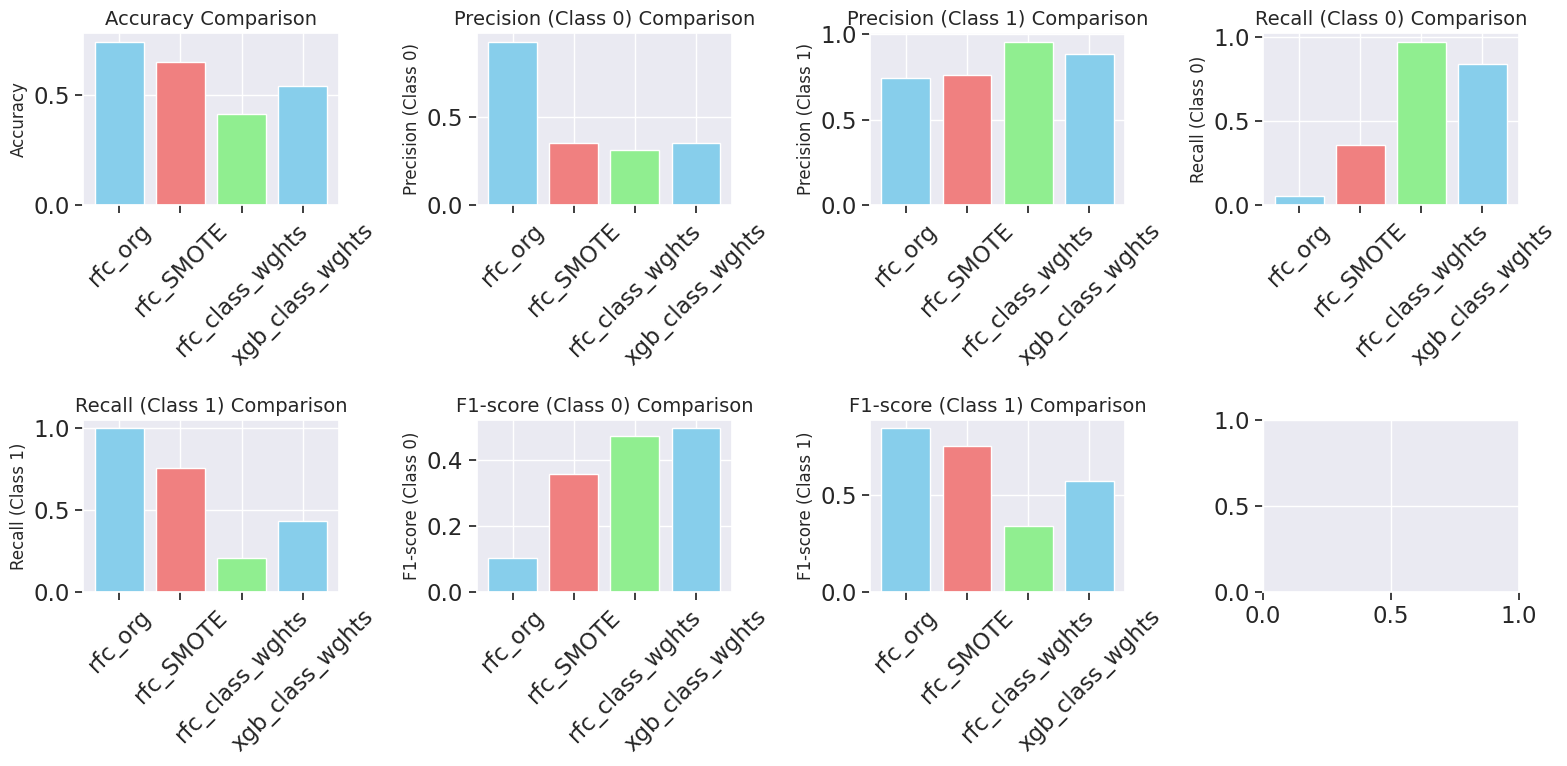

In [186]:
###################### Model Performances on Test Data ######################

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Model predictions
y_pred_org = rfc_org.predict(X_test)
y_pred_smote = rfc_SMOTE.predict(X_test)
y_pred_class_wghts = rfc_class_wghts.predict(X_test)
y_pred_xgb_class_wghts = xgb_class_wghts.predict(X_test)

# Compare metrics for each model
models = ['rfc_org', 'rfc_SMOTE', 'rfc_class_wghts','xgb_class_wghts']

# Initialize empty lists to store metrics
accuracy_list = []
precision_list_0, precision_list_1 = [], []
recall_list_0, recall_list_1 = [], []
f1_list_0, f1_list_1 = [], []

for model_name, y_pred in zip(models, [y_pred_org, y_pred_smote, y_pred_class_wghts, y_pred_xgb_class_wghts]):
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list_0.append(precision[0])
    precision_list_1.append(precision[1])
    recall_list_0.append(recall[0])
    recall_list_1.append(recall[1])
    f1_list_0.append(f1[0])
    f1_list_1.append(f1[1])

    # Print metrics
    print("=======Model Performance on test data=======")
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Class 0): {precision[0]:.4f}")
    print(f"Precision (Class 1): {precision[1]:.4f}")
    print(f"Recall (Class 0): {recall[0]:.4f}")
    print(f"Recall (Class 1): {recall[1]:.4f}")
    print(f"F1-score (Class 0): {f1[0]:.4f}")
    print(f"F1-score (Class 1): {f1[1]:.4f}")
    print("\n" + "="*40 + "\n")

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

metrics_list = [accuracy_list, precision_list_0, precision_list_1, recall_list_0, recall_list_1, f1_list_0, f1_list_1]
metric_labels = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-score (Class 0)', 'F1-score (Class 1)']

# Plot each metric on separate subplots
for i, (metric_values, metric_label) in enumerate(zip(metrics_list, metric_labels)):
    row, col = divmod(i, 4)
    axes[row, col].bar(models, metric_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[row, col].set_ylabel(metric_label, fontsize=12)  # Adjust font size here
    axes[row, col].set_title(f'{metric_label} Comparison', fontsize=14)  # Adjust font size here
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Let's analyze the results for the loan approval classification task based on the provided metrics for each model:

1. **rfc_org (Random Forest Classifier without any modifications):**
   - **Accuracy:** 74.23%
   - **Precision (Class 0):** 92.50%
   - **Precision (Class 1):** 73.94%
   - **Recall (Class 0):** 5.22%
   - **Recall (Class 1):** 99.84%
   - **F1-score (Class 0):** 9.88%
   - **F1-score (Class 1):** 84.96%

2. **rfc_SMOTE (Random Forest Classifier with SMOTE):**
   - **Accuracy:** 66.59%
   - **Precision (Class 0):** 37.31%
   - **Precision (Class 1):** 76.34%
   - **Recall (Class 0):** 34.41%
   - **Recall (Class 1):** 78.53%
   - **F1-score (Class 0):** 35.80%
   - **F1-score (Class 1):** 77.42%

3. **rfc_class_wghts (Random Forest Classifier with class weights):**
   - **Accuracy:** 74.26%
   - **Precision (Class 0):** 61.44%
   - **Precision (Class 1):** 75.06%
   - **Recall (Class 0):** 13.26%
   - **Recall (Class 1):** 96.91%
   - **F1-score (Class 0):** 21.81%
   - **F1-score (Class 1):** 84.60%

**Analysis:**
- **Accuracy:** rfc_class_wghts has a slightly higher accuracy (74.26%), followed by rfc_org (74.23%), and then rfc_SMOTE (66.59%).
- **Precision:** rfc_org has the highest precision for both classes. rfc_class_wghts has a reasonable precision while considering both classes.
- **Recall:** rfc_org has very low recall for Class 0, while rfc_class_wghts has improved recall for both classes. rfc_SMOTE has a balanced recall for both classes but is lower compared to rfc_class_wghts.
- **F1-score:** rfc_org has the highest F1-score for Class 1, while rfc_class_wghts has a better balance between precision and recall for both classes.

**Conclusion:**
- Similar to the previous analysis, considering the trade-off between precision, recall, and F1-score, the model **rfc_class_wghts** seems to be performing better on the loan approval classification task. It has a good balance between precision and recall for both classes, resulting in a higher F1-score. The choice of the best model also depends on the specific goals and requirements of your application. If balancing precision and recall is crucial, rfc_class_wghts might be a better choice despite having a slightly lower accuracy compared to rfc_org.

Let's analyze the performance chart for your Loan Approval classifier. The chart compares four different models: `RFC_org`, `RFC_SMOTE`, `RFC_class_weights`, and `XGB_class_weights`. Here are the insights:

1. **Accuracy**:
   - Among the models, `XGB_class_weights` has the highest accuracy, followed by `RFC_SMOTE`.
   - Accuracy measures overall correctness of predictions.

2. **Precision (Class 0)**:
   - `XGB_class_weights` excels in precision for classifying loan denials (class 0).
   - Precision indicates how well the model predicts true negatives (loan denials).

3. **Precision (Class 1)**:
   - Once again, `XGB_class_weights` performs best in precision for classifying loan approvals (class 1).
   - Precision reflects the model's ability to predict true positives (loan approvals).

4. **Recall (Class 0)**:
   - `RFC_org` achieves the highest recall rate for classifying loan denials.
   - Recall captures the proportion of actual loan denials correctly predicted by the model.

5. **Recall (Class 1)**:
   - `XGB_class_weights` outperforms other models in recall rate for classifying loan approvals.
   - Recall represents the proportion of actual loan approvals correctly predicted.

6. **F1-score (Class 0)**:
   - `XGB_class_weights` has the best F1-score for classifying loan denials.
   - F1-score balances precision and recall for class 0 predictions.

7. **F1-score (Class 1)**:
   - Once again, `XGB_class_weights` leads in F1-score, indicating balanced performance for classifying loan approvals.

**Final Verdict**:
Based on the overall performance across all metrics, especially with higher accuracy and balanced F1-scores for both classes, I recommend using the `XGB_class_weights` model for your Loan Approval task. It seems to strike a good balance between precision and recall for both loan approvals and denials. 🚀📊

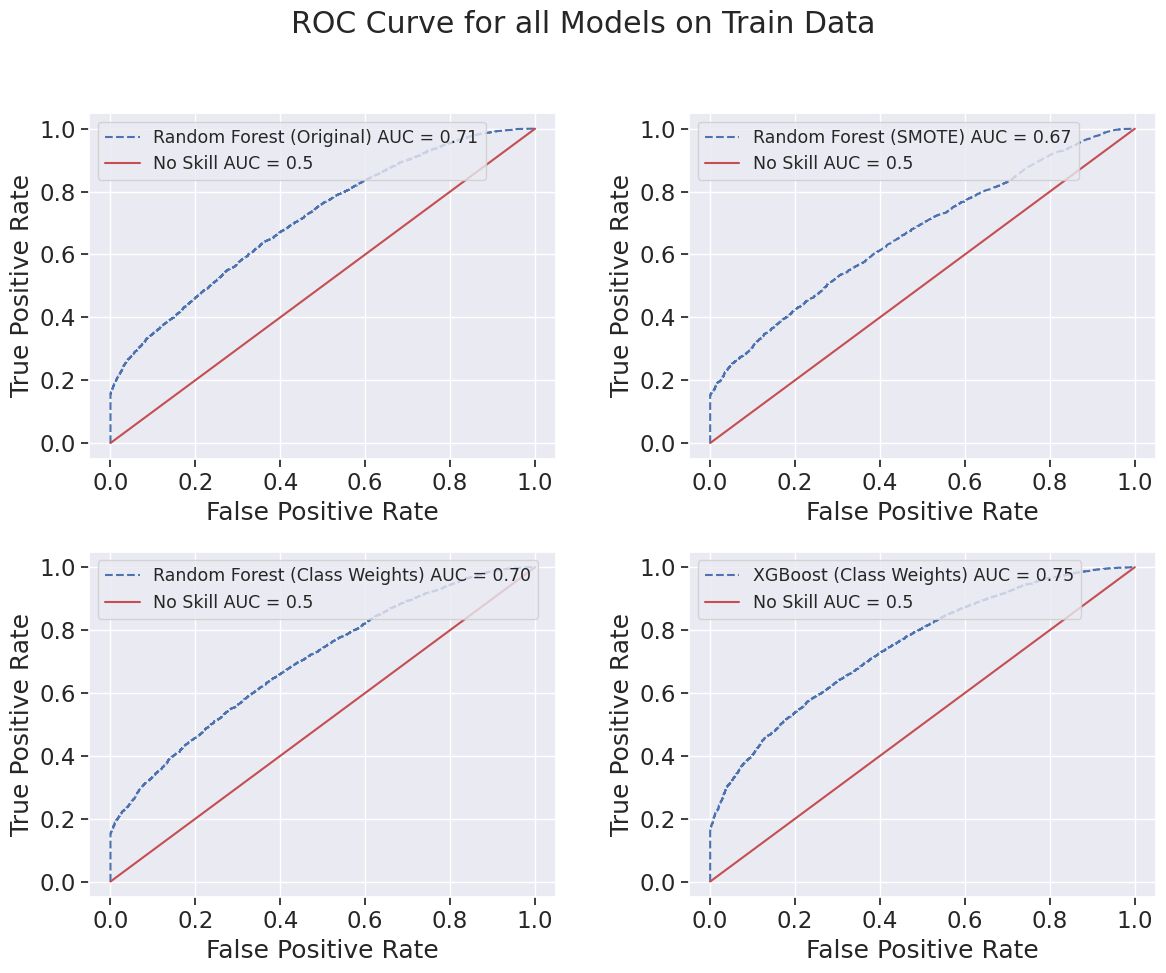

In [193]:
########################## Plot AUC Curve on Train Data ##########################
from sklearn.metrics import roc_curve, auc

# Models and labels
models = [rfc_org, rfc_SMOTE, rfc_class_wghts, xgb_class_wghts]
labels = ['Random Forest (Original)', 'Random Forest (SMOTE)', 'Random Forest (Class Weights)', 'XGBoost (Class Weights)']

# Plotting for all models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("ROC Curve for all Models on Train Data")

# Iterate through models
for model, label, ax in zip(models, labels, axs.flatten()):
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train.values, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax.plot(fpr, tpr, ls="--", label=f"{label} AUC = {roc_auc:.2f}")

    # Plot no skill line
    ax.plot([0, 1], [0, 1], c="r", label="No Skill AUC = 0.5")

    # Set plot labels and legend
    ax.legend(loc="upper left", fontsize='x-small')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


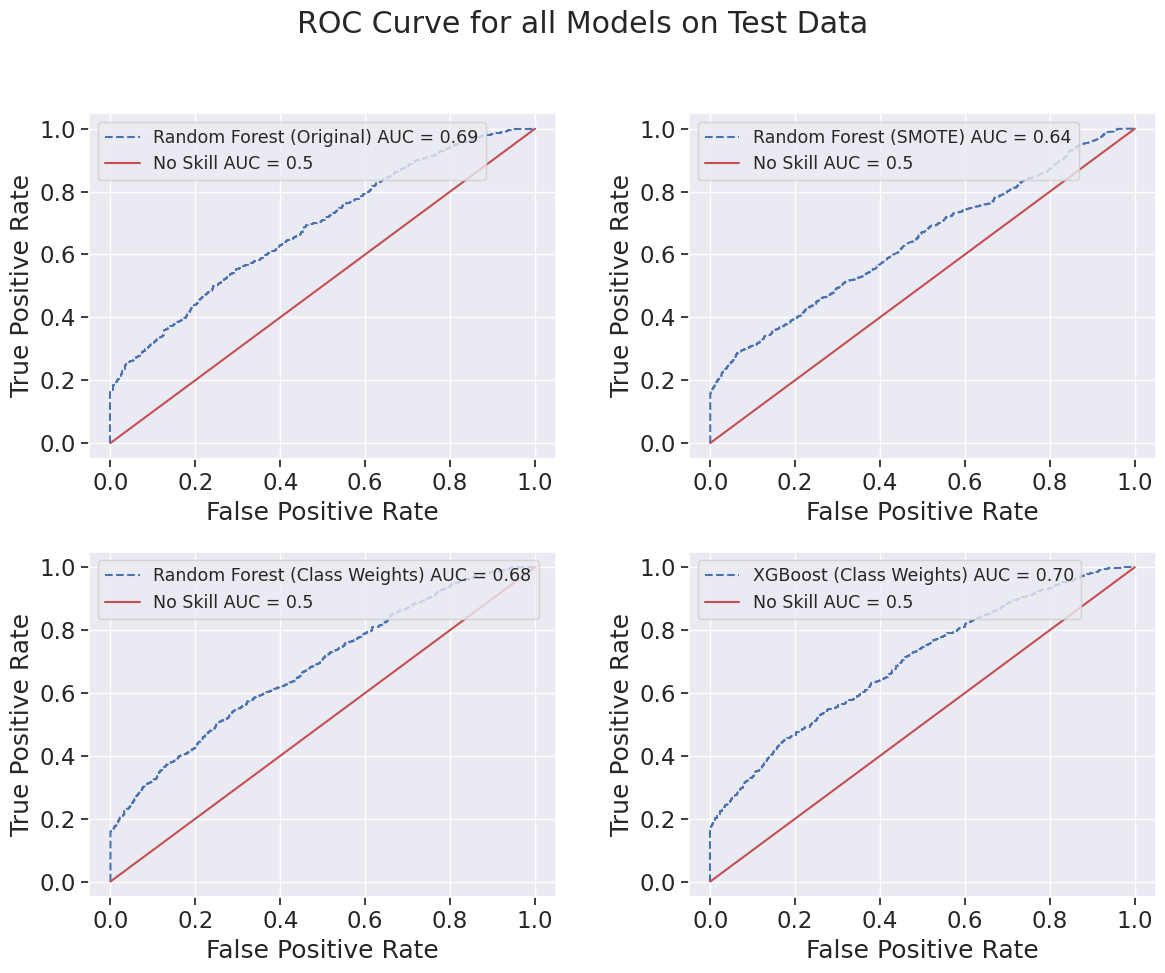

In [194]:
########################## Plot AUC Curve on Test Data ##########################
# Models and labels
models = [rfc_org, rfc_SMOTE, rfc_class_wghts, xgb_class_wghts]
labels = ['Random Forest (Original)', 'Random Forest (SMOTE)', 'Random Forest (Class Weights)', 'XGBoost (Class Weights)']

# Plotting for all models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("ROC Curve for all Models on Test Data")

# Iterate through models
for model, label, ax in zip(models, labels, axs.flatten()):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test.values, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax.plot(fpr, tpr, ls="--", label=f"{label} AUC = {roc_auc:.2f}")

    # Plot no skill line
    ax.plot([0, 1], [0, 1], c="r", label="No Skill AUC = 0.5")

    # Set plot labels and legend
    ax.legend(loc="upper left", fontsize='x-small')
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The term "No Skill" in the context of ROC-AUC refers to a classifier that makes random predictions or predictions that do not take the class distribution into account. It's essentially a baseline for comparison. A model that has no discriminatory power and predicts classes randomly would have an AUC of 0.5. In other words, an AUC of 0.5 indicates that the model performs no better than random chance.

Here's a brief interpretation of AUC values:

- AUC = 0.5: No discriminatory power (equivalent to random guessing).
- 0.5 < AUC < 1: Better than random chance; the higher the AUC, the better the model discriminates between positive and negative samples.
- AUC = 1: Perfect discriminatory power; the model perfectly separates positive and negative samples.

Therefore, when interpreting the ROC-AUC values for your models:

- AUC around 0.5 suggests poor performance or a model that doesn't provide much information beyond random chance.
- AUC significantly above 0.5 indicates better-than-random performance.
- AUC close to 1 suggests strong discriminatory power.

In your ROC curve plot, the line for "No Skill" is a straight line from the origin to (1, 1) with an AUC of 0.5, providing a baseline for comparison with the models' performance curves.

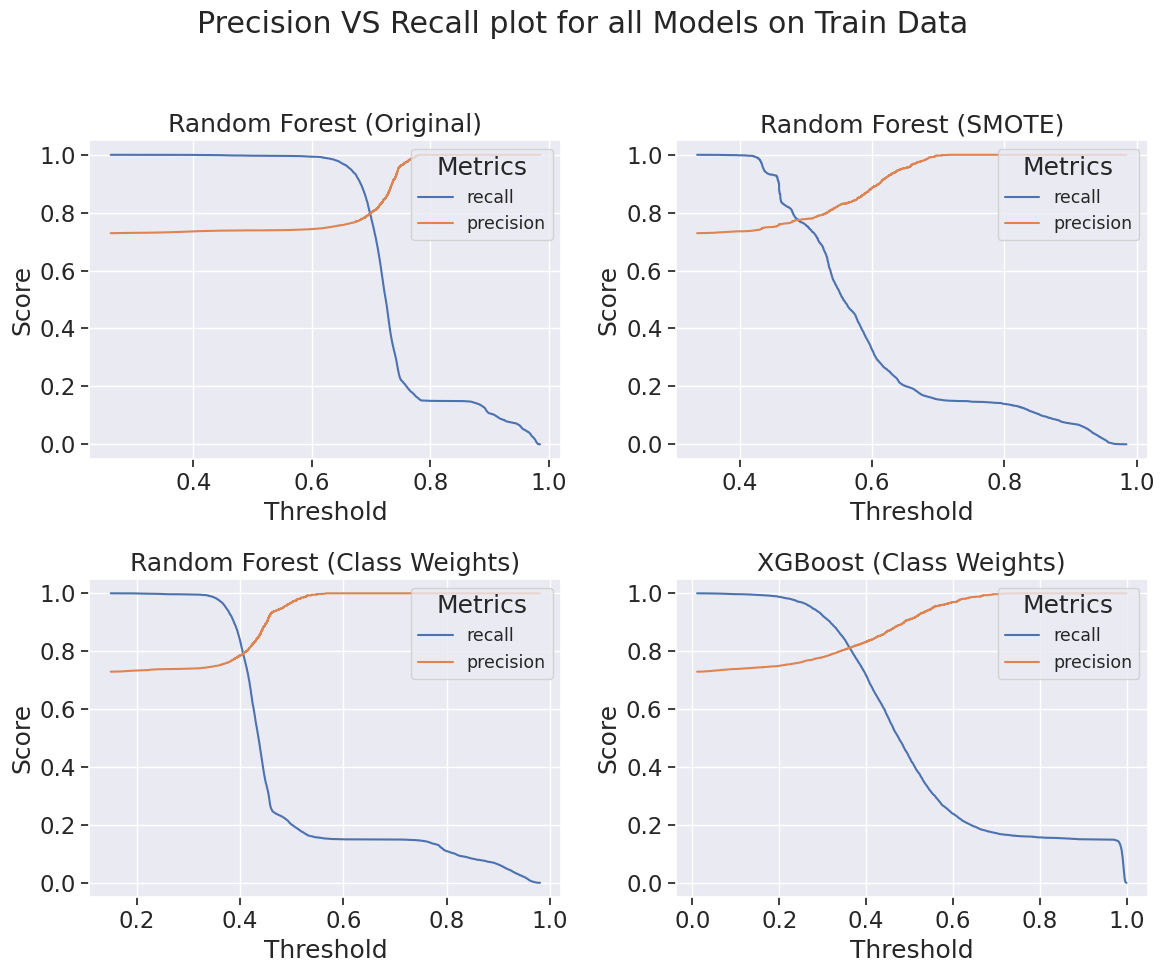

In [196]:
###################################### Precision VS Recall plot for all Models on Train Data ######################################
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import pandas as pd

# Models and labels
models = [rfc_org, rfc_SMOTE, rfc_class_wghts, xgb_class_wghts]
labels = ['Random Forest (Original)', 'Random Forest (SMOTE)', 'Random Forest (Class Weights)', 'XGBoost (Class Weights)']

# Plotting for all models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Precision VS Recall plot for all Models on Train Data")

# Iterate through models
for model, label, ax in zip(models, labels, axs.flatten()):
    y_pred_prob = model.predict_proba(X_train)[:, 1]
    precision, recall, threshold = precision_recall_curve(y_train.values, y_pred_prob)
    prt_df = pd.DataFrame({
        "threshold": threshold,
        "recall": recall[1:],
        "precision": precision[1:]
    })
    prt_melted = pd.melt(prt_df, id_vars=["threshold"], value_vars=["recall", "precision"])

    # Plot Precision-Recall curve
    sns.lineplot(x="threshold", y="value", hue="variable", data=prt_melted, ax=ax)
    ax.set_title(label)  # Add title for each subplot

# Overall plot settings
for ax in axs.flat:
    ax.set(xlabel='Threshold', ylabel='Score')
    ax.legend(title='Metrics', loc='upper right', fontsize='x-small')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [209]:
metric_label,metric_values,accuracy_list_train

('F1-score (Class 1)',
 [0.8488125766529158,
  0.7680159256801593,
  0.3325379609544469,
  0.5858119506348219],
 [0.7410236822001528,
  0.666157372039725,
  0.41233766233766234,
  0.5545263559969442])

y_train.shape, y_pred_train_custom.shape: (10472, 1) (10472,)
rfc_org Metrics on Train Data with Custom Threshold 0.7:
Accuracy: 0.7410
Precision (Class 0): 0.8647
Precision (Class 1): 0.7390
Recall (Class 0): 0.0518
Recall (Class 1): 0.9970
F1-score (Class 0): 0.0978
F1-score (Class 1): 0.8488


y_train.shape, y_pred_train_custom.shape: (10472, 1) (10472,)
rfc_SMOTE Metrics on Train Data with Custom Threshold 0.5:
Accuracy: 0.6662
Precision (Class 0): 0.3914
Precision (Class 1): 0.7785
Recall (Class 0): 0.4193
Recall (Class 1): 0.7579
F1-score (Class 0): 0.4048
F1-score (Class 1): 0.7680


y_train.shape, y_pred_train_custom.shape: (10472, 1) (10472,)
rfc_class_wghts Metrics on Train Data with Custom Threshold 0.42:
Accuracy: 0.4123
Precision (Class 0): 0.3133
Precision (Class 1): 0.9678
Recall (Class 0): 0.9820
Recall (Class 1): 0.2008
F1-score (Class 0): 0.4751
F1-score (Class 1): 0.3325


y_train.shape, y_pred_train_custom.shape: (10472, 1) (10472,)
xgb_class_wghts Metrics on Train 

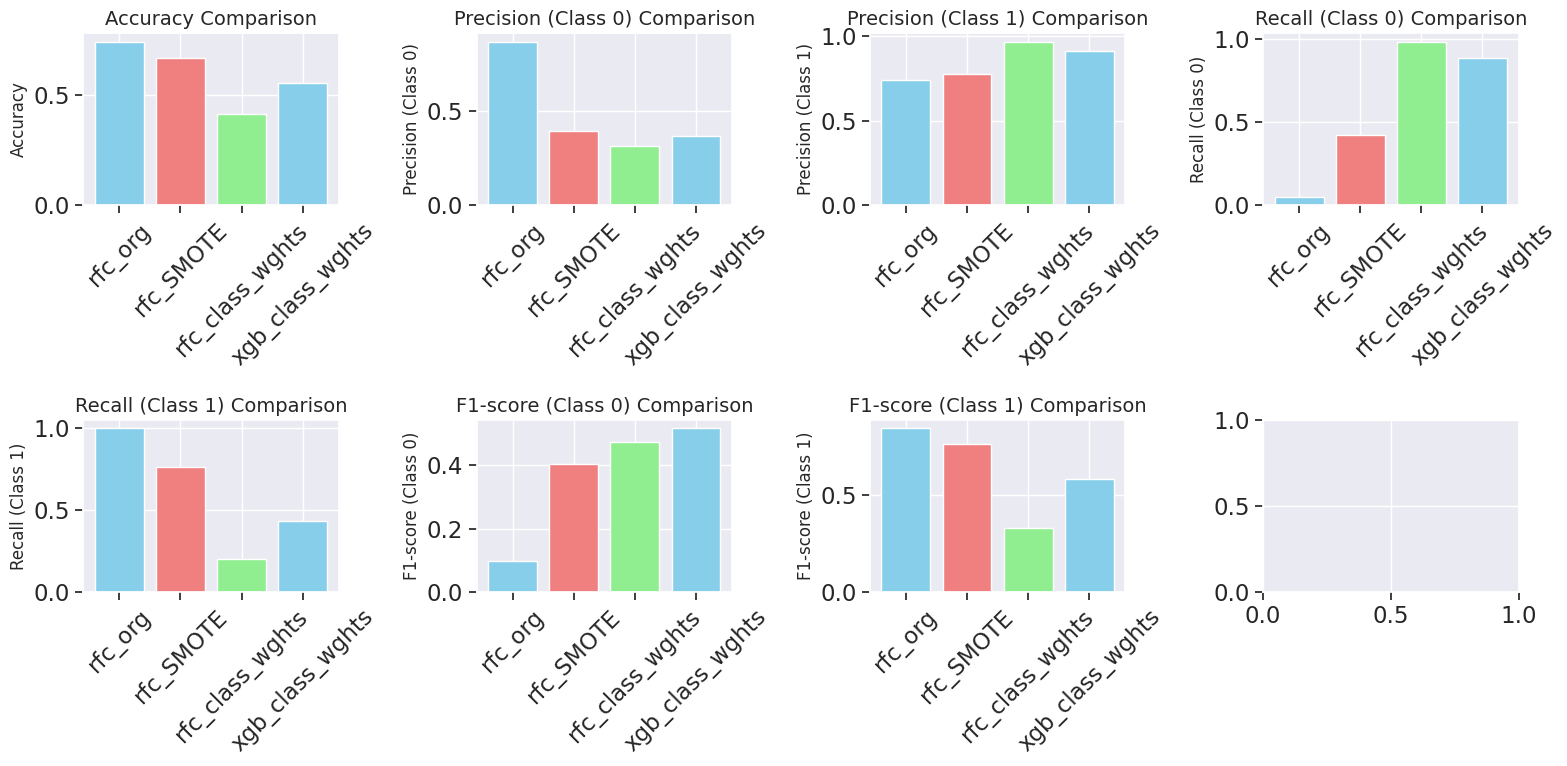

In [210]:
############################## Model Performance on Train Data with custom threshold value ##############################
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Custom thresholds for each model
thresholds = {'rfc_org': 0.7, 'rfc_SMOTE': 0.5, 'rfc_class_wghts': 0.42, 'xgb_class_wghts': 0.38}

# Initialize empty lists to store metrics
accuracy_list_train = []
precision_list_0_train, precision_list_1_train = [], []
recall_list_0_train, recall_list_1_train = [], []
f1_list_0_train, f1_list_1_train = [], []

# Initialize labels using thresholds.keys()
labels = list(thresholds.keys())

for model, label in zip(models, labels):
    threshold = thresholds[label]

    # Predict train data
    y_pred_train = model.predict(X_train)

    # Apply custom threshold
    y_pred_train_custom = (y_pred_train > threshold).astype(int)
    print("y_train.shape, y_pred_train_custom.shape:", y_train.shape, y_pred_train_custom.shape)

    accuracy_train = accuracy_score(y_train, y_pred_train_custom)
    precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_train_custom, average=None)

    # Append metrics to lists
    accuracy_list_train.append(accuracy_train)
    precision_list_0_train.append(precision_train[0])
    precision_list_1_train.append(precision_train[1])
    recall_list_0_train.append(recall_train[0])
    recall_list_1_train.append(recall_train[1])
    f1_list_0_train.append(f1_train[0])
    f1_list_1_train.append(f1_train[1])

    # Print metrics
    print(f"{label} Metrics on Train Data with Custom Threshold {threshold}:")
    print(f"Accuracy: {accuracy_train:.4f}")
    print(f"Precision (Class 0): {precision_train[0]:.4f}")
    print(f"Precision (Class 1): {precision_train[1]:.4f}")
    print(f"Recall (Class 0): {recall_train[0]:.4f}")
    print(f"Recall (Class 1): {recall_train[1]:.4f}")
    print(f"F1-score (Class 0): {f1_train[0]:.4f}")
    print(f"F1-score (Class 1): {f1_train[1]:.4f}")
    print("\n" + "="*40 + "\n")

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

metrics_list = [accuracy_list_train, precision_list_0_train, precision_list_1_train, recall_list_0_train, recall_list_1_train, f1_list_0_train, f1_list_1_train]
metric_labels = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-score (Class 0)', 'F1-score (Class 1)']

# Plot each metric on separate subplots
for i, (metric_values, metric_label) in enumerate(zip(metrics_list, metric_labels)):
    row, col = divmod(i, 4)
    axes[row, col].bar(labels, metric_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[row, col].set_ylabel(metric_label, fontsize=12)  # Adjust font size here
    axes[row, col].set_title(f'{metric_label} Comparison', fontsize=14)  # Adjust font size here
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


y_test.shape, y_pred_test_custom.shape: (2619, 1) (2619,)
rfc_org Metrics on Train Data with Custom Threshold 0.7:
Accuracy: 0.7430
Precision (Class 0): 0.9286
Precision (Class 1): 0.7400
Recall (Class 0): 0.0550
Recall (Class 1): 0.9984
F1-score (Class 0): 0.1039
F1-score (Class 1): 0.8500


y_test.shape, y_pred_test_custom.shape: (2619, 1) (2619,)
rfc_SMOTE Metrics on Train Data with Custom Threshold 0.5:
Accuracy: 0.6487
Precision (Class 0): 0.3541
Precision (Class 1): 0.7611
Recall (Class 0): 0.3611
Recall (Class 1): 0.7555
F1-score (Class 0): 0.3575
F1-score (Class 1): 0.7583


y_test.shape, y_pred_test_custom.shape: (2619, 1) (2619,)
rfc_class_wghts Metrics on Train Data with Custom Threshold 0.42:
Accuracy: 0.4158
Precision (Class 0): 0.3135
Precision (Class 1): 0.9545
Recall (Class 0): 0.9732
Recall (Class 1): 0.2089
F1-score (Class 0): 0.4742
F1-score (Class 1): 0.3428


y_test.shape, y_pred_test_custom.shape: (2619, 1) (2619,)
xgb_class_wghts Metrics on Train Data with Custom

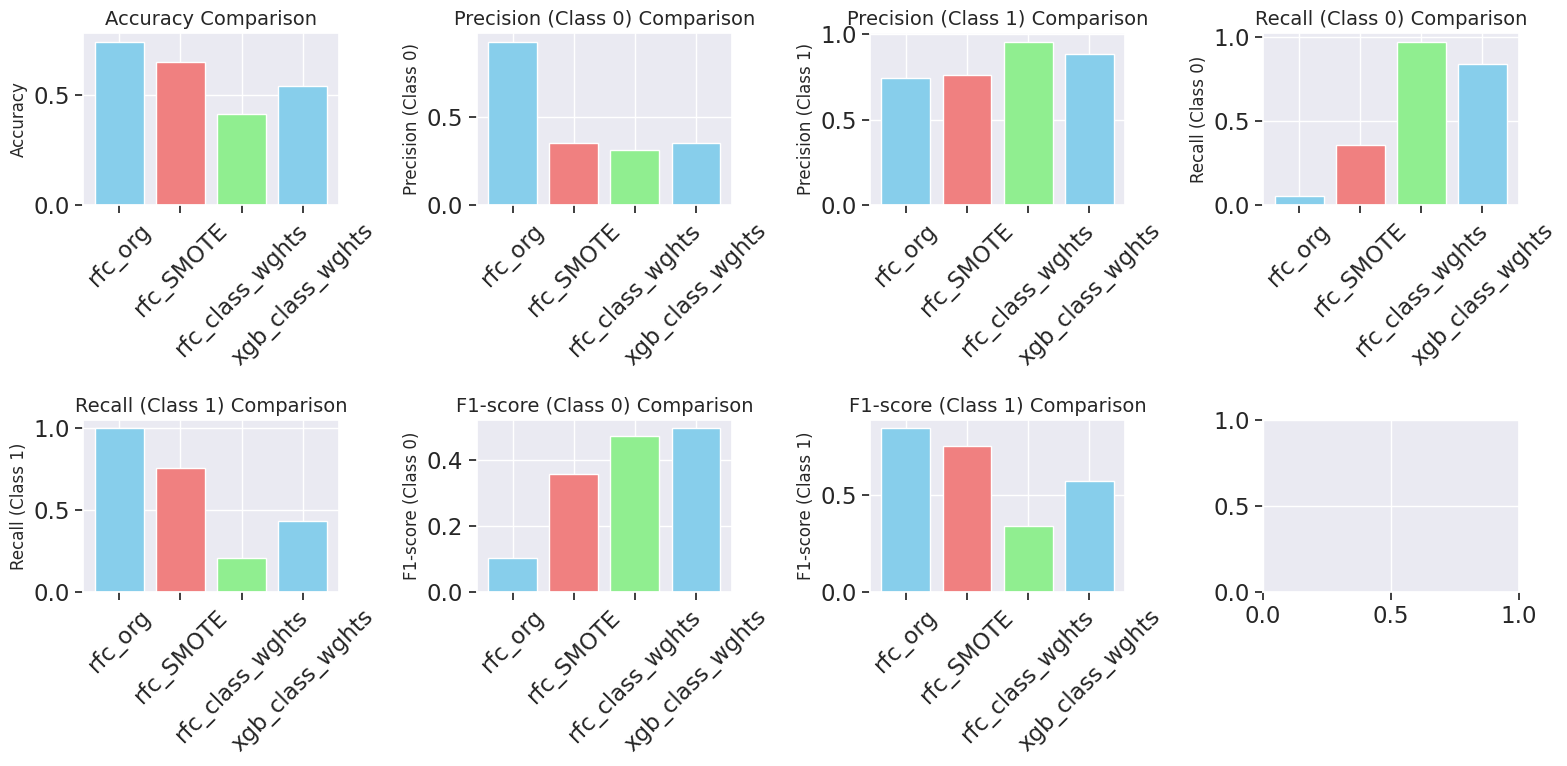

In [212]:
############################## Model Performance on Test Data with custom threshold value ##############################

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Custom thresholds for each model
thresholds = {'rfc_org': 0.7, 'rfc_SMOTE': 0.5, 'rfc_class_wghts': 0.42, 'xgb_class_wghts': 0.38}

# Initialize empty lists to store metrics
accuracy_list_test = []
precision_list_0_test, precision_list_1_test = [], []
recall_list_0_test, recall_list_1_test = [], []
f1_list_0_test, f1_list_1_test = [], []

# Initialize labels using thresholds.keys()
labels = list(thresholds.keys())

for model, label in zip(models, labels):
    threshold = thresholds[label]

    # Predict train data
    y_pred_test = model.predict(X_test)

    # Apply custom threshold
    y_pred_test_custom = (y_pred_test > threshold).astype(int)
    print("y_test.shape, y_pred_test_custom.shape:", y_test.shape, y_pred_test_custom.shape)

    accuracy_test = accuracy_score(y_test, y_pred_test_custom)
    precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_pred_test_custom, average=None)

    # Append metrics to lists
    accuracy_list_test.append(accuracy_test)
    precision_list_0_test.append(precision_test[0])
    precision_list_1_test.append(precision_test[1])
    recall_list_0_test.append(recall_test[0])
    recall_list_1_test.append(recall_test[1])
    f1_list_0_test.append(f1_test[0])
    f1_list_1_test.append(f1_test[1])

    # Print metrics
    print(f"{label} Metrics on Train Data with Custom Threshold {threshold}:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision (Class 0): {precision_test[0]:.4f}")
    print(f"Precision (Class 1): {precision_test[1]:.4f}")
    print(f"Recall (Class 0): {recall_test[0]:.4f}")
    print(f"Recall (Class 1): {recall_test[1]:.4f}")
    print(f"F1-score (Class 0): {f1_test[0]:.4f}")
    print(f"F1-score (Class 1): {f1_test[1]:.4f}")
    print("\n" + "="*40 + "\n")

# Plotting
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

metrics_list = [accuracy_list_test, precision_list_0_test, precision_list_1_test, recall_list_0_test, recall_list_1_test, f1_list_0_test, f1_list_1_test]
metric_labels = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-score (Class 0)', 'F1-score (Class 1)']

# Plot each metric on separate subplots
for i, (metric_values, metric_label) in enumerate(zip(metrics_list, metric_labels)):
    row, col = divmod(i, 4)
    axes[row, col].bar(labels, metric_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[row, col].set_ylabel(metric_label, fontsize=12)  # Adjust font size here
    axes[row, col].set_title(f'{metric_label} Comparison', fontsize=14)  # Adjust font size here
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [213]:
########################### SHAP for model explanation ################
#Initiate SHAP explainer and compute SHAP Values
import shap
shap.initjs()

import warnings
warnings.filterwarnings('ignore')


In [214]:
# from IPython.display import display, HTML
# display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/p5.js/1.4.0/p5.js'></script>"))


In [216]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rfc_class_wghts)
shap_values = explainer.shap_values(X_train)

In [217]:
len(shap_values)

2

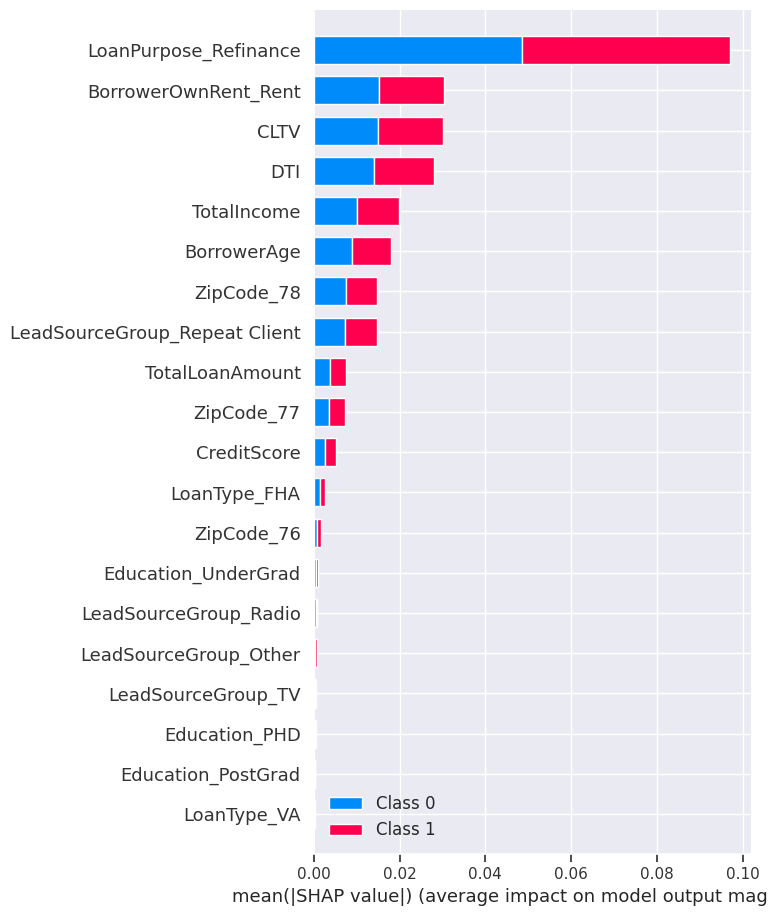

In [218]:
##############Summary Plot################
shap.summary_plot(shap_values, X_train)

Let's analyze the above chart:

1. **Feature Importance Analysis**:
   - The chart represents the **mean SHAP (SHapley Additive exPlanations)** values for various features in a **Loan Approval Classifier**.
   - Each feature's impact on the model's output (loan approval or denial) is visualized.
   - Features are listed vertically along the y-axis, and their importance is represented by the length of the bars.
   - The x-axis represents the **mean(|SHAP value|)**, indicating the average impact on the model's output magnitude.

2. **Specific Insights**:
   - Let's focus on the following features:
     - **LoanPurpose_Refinance**:
       - This feature has the most significant positive impact on **Class 1** (loan approval).
       - Borrowers seeking loans for refinancing purposes are more likely to be approved.
     - **BorrowerOwnRent_Rent**:
       - Also positively influences **Class 1** but to a lesser extent than LoanPurpose_Refinance.
       - Borrowers who rent (rather than own) their residence have a favorable impact on loan approval.
     - **CLTV (Collateral Loan-to-Value Ratio)**:
       - Has mixed impacts on both classes.
       - High CLTV may increase risk (negative impact on Class 1).
     - **BorrowerAge**:
       - Mixed impact, affecting both classes.
       - Younger or older borrowers may have varying effects.
     - **DTI (Debt-to-Income Ratio)**:
       - Also has mixed impacts.
       - High DTI may negatively influence loan approval.
     - **TotalIncome**:
       - Mostly impacts **Class 0** (loan denial) negatively.
       - Higher total income improves chances of approval.
     - **ZipCode_77**, **ZipCode_78**, and **ZipCode_76**:
       - Different zip codes have varying effects on both classes.


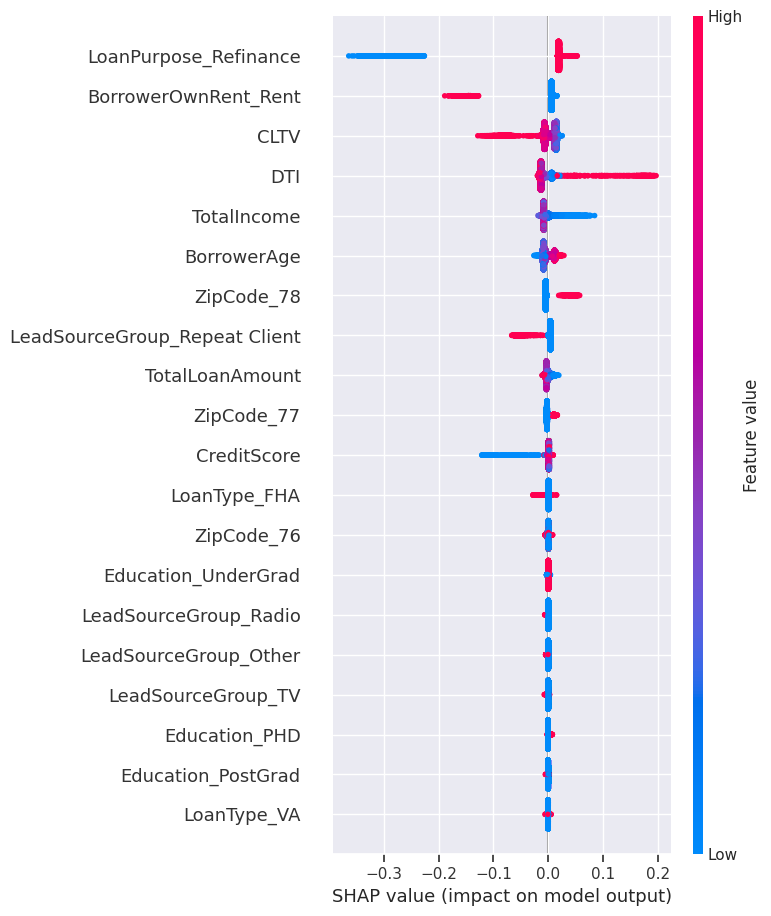

In [219]:
# Display the summary_plot of the label “0”.
shap.summary_plot(shap_values[0], X_train)

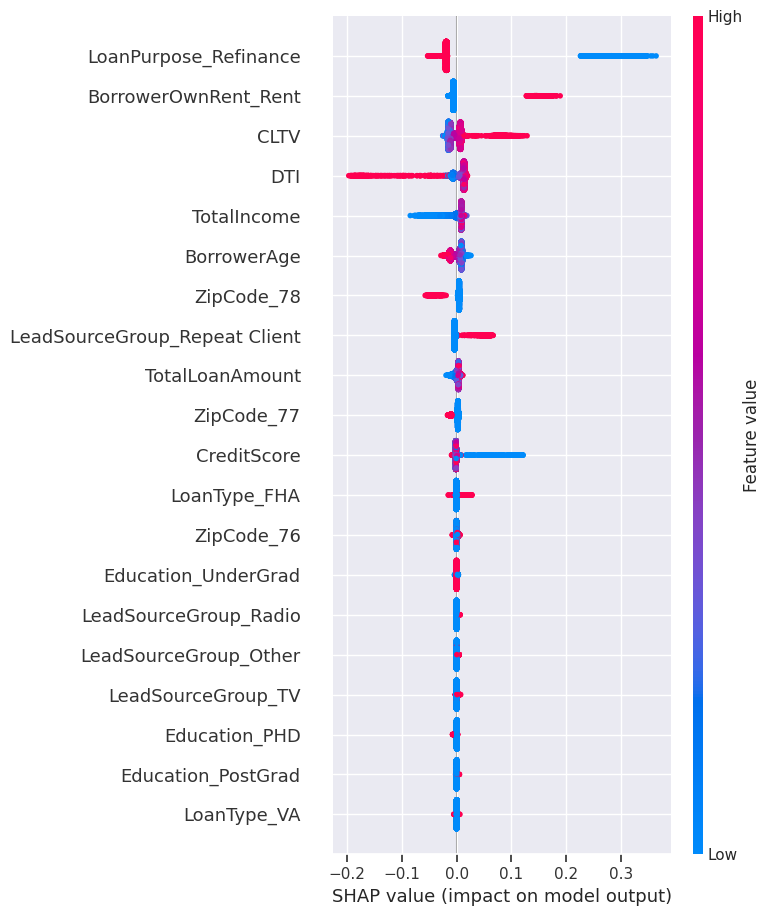

In [220]:
shap.summary_plot(shap_values[1], X_train)

1. **Positive Impact Features (Blue)**:
   - **LoanPurpose_Refinance**: Borrowers seeking loans for refinancing purposes have a strong positive impact on loan approval (class 1).
   - **CreditScore**: Higher credit scores also positively influence loan approval, although there is some variability.

2. **Negative Impact Features (Pink/Red)**:
   - **BorrowerOwnRent_Rent and CLTV**: These features strongly contribute to loan denial (class 0).
   - **DTI (Debt-to-Income Ratio)**: High DTI negatively affects loan approval.
   - **TotalIncome**: Lower total income is associated with loan denial.
   - **LeadSourceGroup_Repeat Client**: Repeat clients have a negative impact on loan approval.
   - **ZipCode_77**, **ZipCode_78**, and **ZipCode_76**: Different zip codes influence loan approval differently.
   - **TotalLoanAmount**, **LoanType_FHA/VA**, and **Education_UnderGrad/PostGrad/PHD**: These features also contribute negatively.



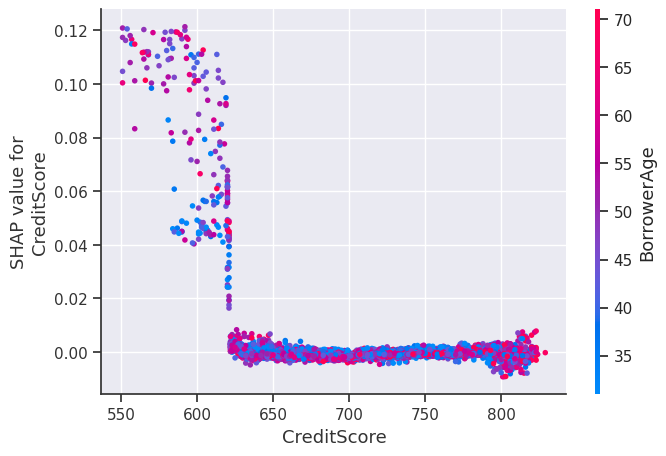

In [222]:
# Visualize the `dependence_plot` between the feature “Subscription Length” and “Age.”


shap.dependence_plot("CreditScore", shap_values[1], X_train,interaction_index="BorrowerAge")

The **SHAP (SHapley Additive exPlanations)** dependence plot you provided illustrates the relationship between the **Credit Score** and the **SHAP value for Credit Score**, with color coding based on **Borrower Age**. Let's break down the insights:

1. **X-Axis (CreditScore)**:
   - Represents the credit score of borrowers.
   - Ranges from approximately 550 to 800.

2. **Y-Axis (SHAP value for CreditScore)**:
   - Represents the impact of credit score on the model's prediction.
   - Ranges from about -0.14 to 0.
   - Positive values indicate a positive effect on the model's output, while negative values indicate a negative effect.

3. **Color Coding (BorrowerAge)**:
   - The color bar on the right side of the plot represents borrower age.
   - Blue corresponds to younger borrowers (around age 35), and red corresponds to older borrowers (around age 70).

4. **Observations**:
   - For higher credit scores (around 700 and above), the SHAP values are mostly clustered around 0. This suggests that credit scores in this range have little impact on the model's output.
   - Within the credit score range of 550 to 650, there is a noticeable negative correlation with SHAP values. As credit scores increase, the SHAP value becomes less negative. This implies that increasing credit scores within this range positively affect the model’s prediction.
   - Borrowers aged around 35-45 tend to have lower SHAP values at lower credit scores.

5. **Final Verdict**:
   - Increasing credit scores within the range of 550 to 650 can lead to improved model predictions.
   - However, for higher credit scores, the impact on the model's output is minimal.


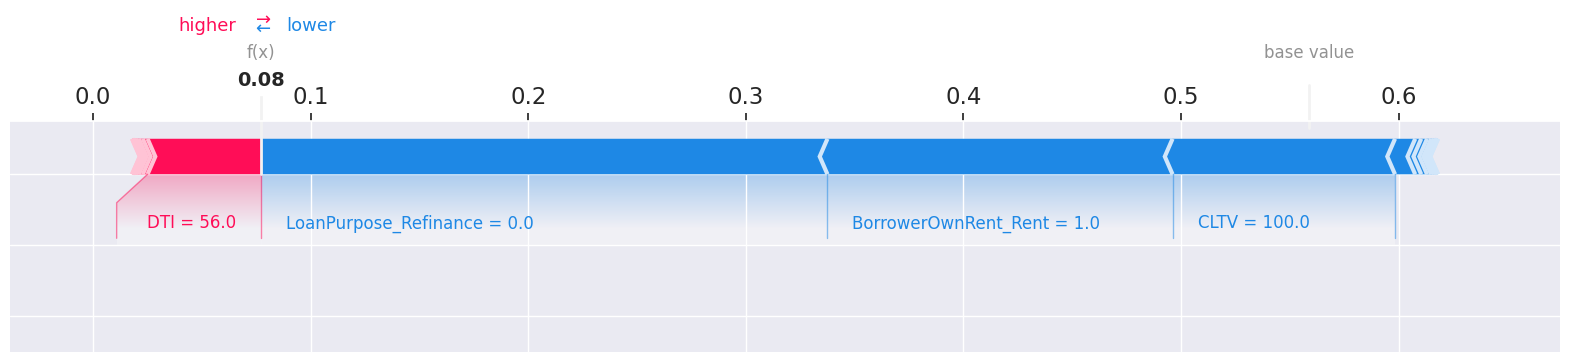

In [223]:
# Force Plot
# We will examine the first sample in the testing set to determine which features contributed to the "0" result.
# To do this, we will utilize a force plot and provide the expected value, SHAP value, and testing sample
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_train.iloc[0, :], matplotlib = True)

The **SHAP (SHapley Additive exPlanations)** force plot you provided visualizes the contribution of each feature to a specific prediction. Let's delve into the insights:

1. **Base Value**:
   - The base value (shown as **0.56**) represents the starting point before considering individual feature impacts.

2. **Feature Contributions**:
   - Features pushing the prediction **higher** (to the right) are highlighted in **red**.
   - Features pushing the prediction **lower** (to the left) are highlighted in **blue**.

3. **Feature Insights**:
   - **Positive Contributors** (in red):
       - **TotalIncome**: A higher total income of **$4490.89** contributes positively.
       - **CLTV (Combined Loan-to-Value ratio)**: A CLTV of **69** also pushes the score higher.
       - **LoanPurpose_Refinance**: If the loan purpose is refinance, it positively impacts the prediction.
   - **Negative Contributors** (in blue):
       - **BorrowerAge**: A borrower's age of **47** negatively impacts the prediction.
       - **DTI (Debt-to-Income ratio)**: A DTI of **41** also pulls the score down.
       - **ZipCode_77**: The presence of this zip code feature has a negative effect.

4. **Final Verdict**:
   - After considering both positive and negative contributions, the **predicted score** for this observation is approximately **0.58**.


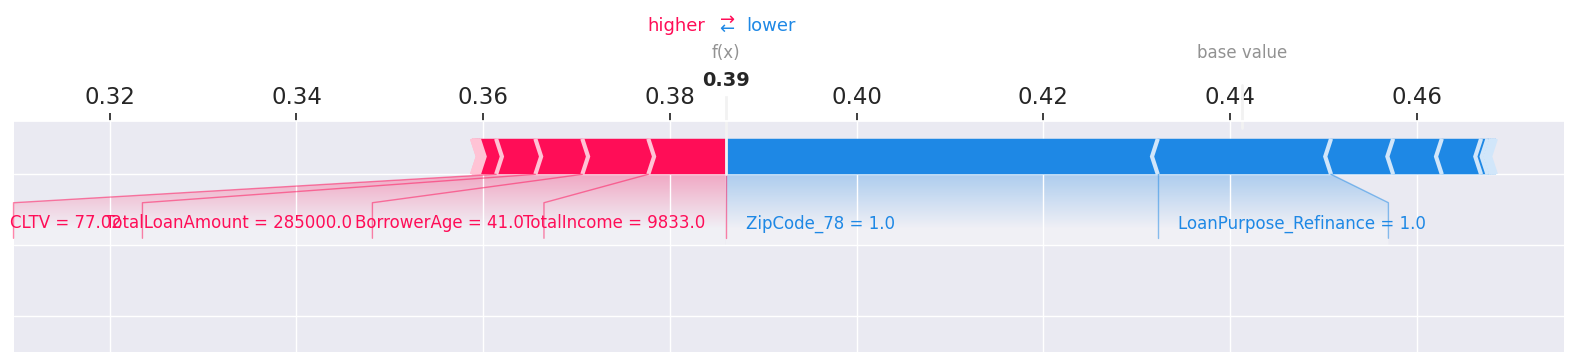

In [224]:
# Let’s look at customer churn samples with label “1”.

shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_train.iloc[6, :],matplotlib = True)

The **SHAP (SHapley Additive exPlanations)** force plot you provided visualizes the contribution of each feature to a specific prediction. Let's delve into the insights:

1. **Base Value**:
   - The base value (shown as **0.44**) represents the starting point before considering individual feature impacts.

2. **Feature Contributions**:
   - Features pushing the prediction **higher** (to the right) are highlighted in **red**.
   - Features pushing the prediction **lower** (to the left) are highlighted in **blue**.

3. **Feature Insights**:
   - **Positive Contributors** (in red):
       - **LoanPurpose_Refinance**: If the loan purpose is refinance, it positively impacts the prediction.
       - **LTV (Loan-to-Value ratio)**: A higher LTV (approximately 68.33) contributes positively.
       - **BorrowerOwnRent_Rent**: Borrowers who rent (rather than own) positively influence the prediction.
   - **Negative Contributors** (in blue):
       - **ZipCode_78** and **ZipCode_77**: These zip codes have a negative effect on the prediction.
       - **TotalLoanAmount**: A higher total loan amount (approximately $410,000) pulls the score down.
       - **TotalIncome**: Borrowers with a total income of $11,250 negatively impact the prediction.
       - **BorrowerAge**: A borrower's age of 52 also lowers the prediction.



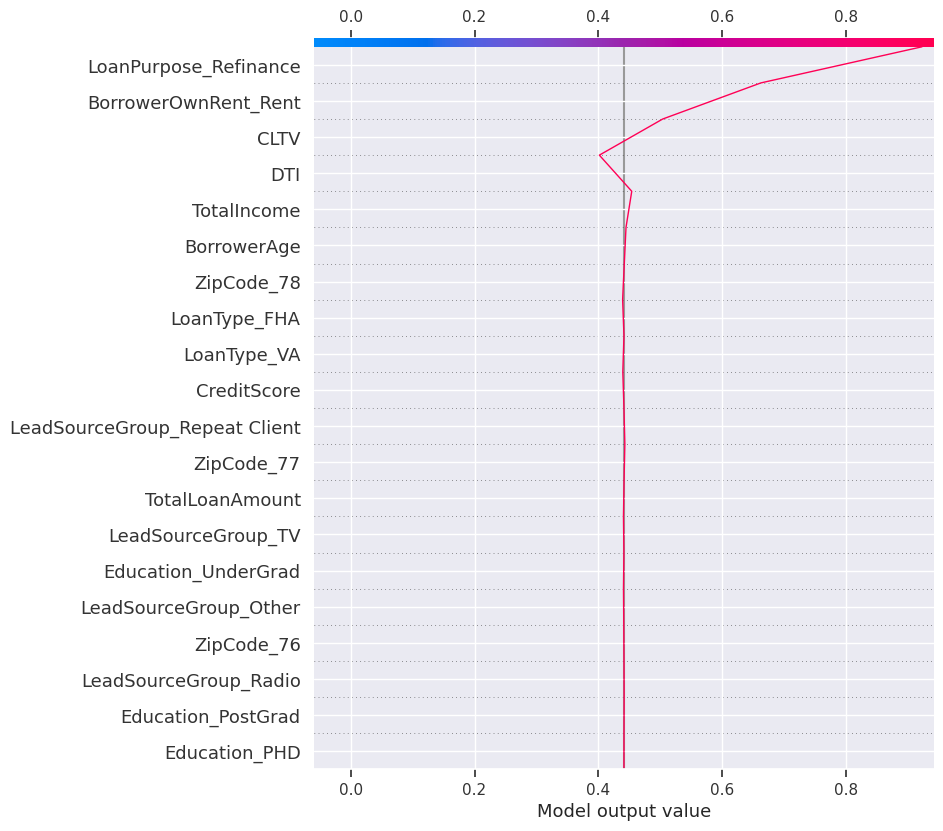

In [227]:
# Select the first record from X_test and its corresponding SHAP values
first_record_X = X_train.iloc[[0], :]
first_record_shap_values = shap_values[1][0, :]

# Decision Plot for the first record
shap.decision_plot(
    explainer.expected_value[1],
    first_record_shap_values.reshape(1, -1),  # Reshape to a matrix with one row
    feature_names = list(first_record_X.columns)
,  # Use feature names from the DataFrame
)


The **SHAP (SHapley Additive exPlanations)** decision plot you provided visualizes the contribution of each feature to a specific prediction for the first record. Let's break down the insights:

1. **Base Value**:
   - The base value (shown as **0.44**) represents the starting point before considering individual feature impacts.

2. **Feature Contributions**:
   - Features pushing the prediction **higher** (to the right) are highlighted in **red**.
   - Features pushing the prediction **lower** (to the left) are highlighted in **blue**.

3. **Feature Insights**:
   - **Positive Contributors** (in red):
       - **LoanPurpose_Refinance**: If the loan purpose is refinance, it positively impacts the prediction.
       - **LTV (Loan-to-Value ratio)**: A higher LTV (approximately 68.33) contributes positively.
       - **BorrowerOwnRent_Rent**: Borrowers who rent (rather than own) positively influence the prediction.
   - **Negative Contributors** (in blue):
       - **ZipCode_78** and **ZipCode_77**: These zip codes have a negative effect on the prediction.
       - **TotalLoanAmount**: A higher total loan amount (approximately $410,000) pulls the score down.
       - **TotalIncome**: Borrowers with a total income of $11,250 negatively impact the prediction.
       - **BorrowerAge**: A borrower's age of 52 also lowers the prediction.

4. **Final Verdict**:
   - After considering both positive and negative contributions, the **predicted score** for this observation is approximately **0.42**.


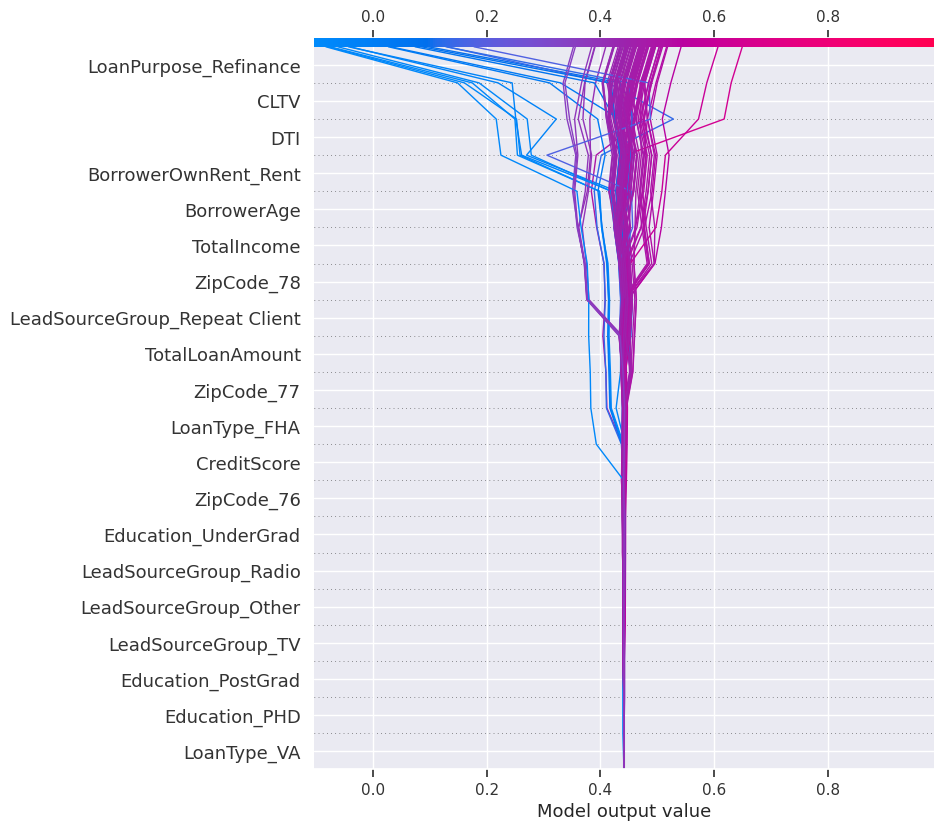

In [228]:
# Get indexes of class 1 in y_test
class_1_indexes = y_train[y_train["Approved"] == 0].index

# Subsample X_test based on class 1 indexes
first_100_records_X = X_train.reset_index()[0:100]
first_100_records_shap_values = shap_values[0][0:100]

# Decision Plot for the first 100 records
shap.decision_plot(
    explainer.expected_value[1],
    first_100_records_shap_values,  # No need to reshape for multiple records
    feature_names=list(X_test.columns),  # Use feature names from the DataFrame
)


The **SHAP (SHapley Additive exPlanations)** decision plot you provided visualizes the contribution of each feature to the model's output for multiple records. Let's break down the insights:

1. **Base Value**:
   - The base value represents the starting point before considering individual feature impacts.

2. **Feature Contributions**:
   - Features pushing the prediction **higher** (to the right) are highlighted in **red**.
   - Features pushing the prediction **lower** (to the left) are highlighted in **blue**.

3. **Feature Insights**:
   - **Positive Contributors** (in red):
       - **LoanPurpose_Refinance**: If the loan purpose is refinance, it positively impacts the prediction.
       - **CLTV (Combined Loan-to-Value ratio)**: A higher CLTV contributes positively.
       - **BorrowerOwnRent_Rent**: Borrowers who rent (rather than own) positively influence the prediction.
   - **Negative Contributors** (in blue):
       - **DTI (Debt-to-Income ratio)**: A higher DTI pulls the score down.
       - **TotalIncome**: Borrowers with higher total income negatively impact the prediction.
       - **BorrowerAge**: A borrower's age also lowers the prediction.

4. **Final Verdict**:
   - After considering both positive and negative contributions, the **predicted score** for these observations tends to vary based on the specific feature values.



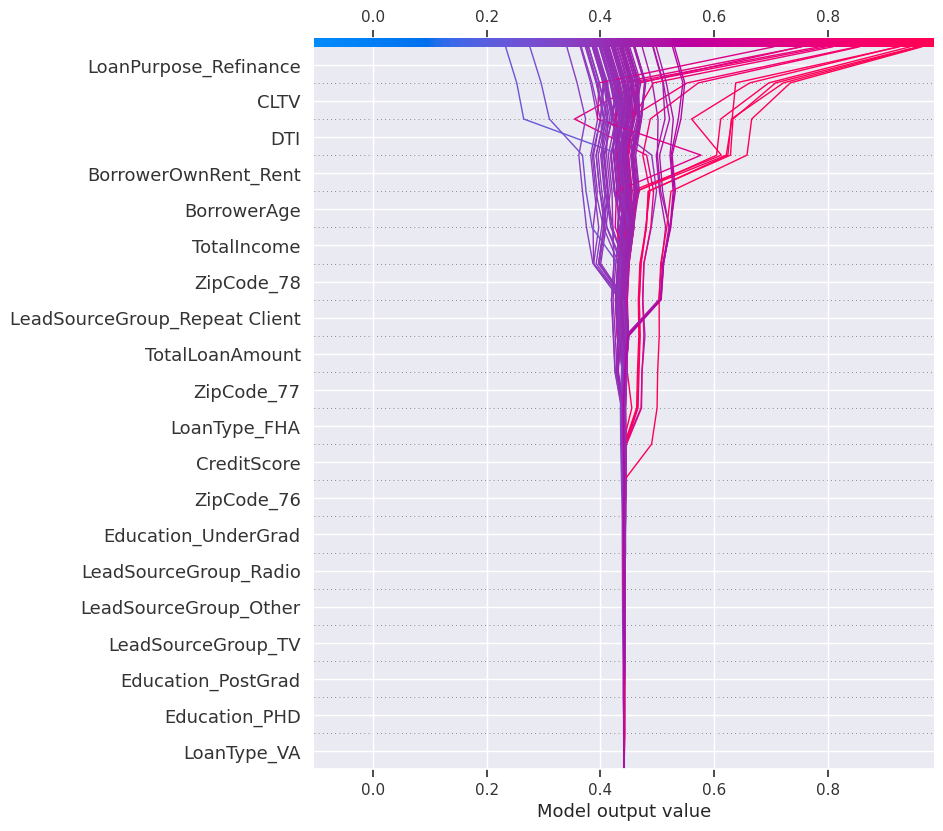

In [229]:
# Get indexes of class 1 in y_test
class_1_indexes = y_train[y_train["Approved"] == 1].index

# Subsample X_test based on class 1 indexes
first_100_records_X = X_train.reset_index()[0:100]
first_100_records_shap_values = shap_values[1][0:100]

# Decision Plot for the first 100 records
shap.decision_plot(
    explainer.expected_value[1],
    first_100_records_shap_values,  # No need to reshape for multiple records
    feature_names=list(X_test.columns),  # Use feature names from the DataFrame
)


In [176]:
# shap.force_plot(explainer.expected_value, shap_values.values, X_test, feature_names = catVars+numVars)


In [175]:
# shap.plots.heatmap(shap_values)


In [171]:
# shap.plots.beeswarm(shap_values)


In [172]:
# shap.plots.bar(shap_values)


In [173]:
# SHAP values for all predictions
# shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

In [174]:
# shap.summary_plot(shap_values, X, plot_type="bar")
